<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>P8 Building Customer Segmentation Models using AutoEnocder and K-Means in Python</font></h2>

<div style="border-radius:10px; padding: 10px; background-color: #C1FDBC; font-size:120%; text-align:left">
<h4 align="left"><font color=black>Full Name: </font>
<font color=#ff6200>Suyash Khare</font>
</h4>
<h4 align="left"><font color=black>Internship Registraion ID: </font>
<font color=#ff6200>STU5f3c3d1751b6f1597783319</font>
</h4>

<img src="https://github.com/FarzadNekouee/Retail_Customer_Segmentation_Recommendation_System/blob/master/image.png?raw=true" width="2400">

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Problem:</font></h2>


In this project, we delve deep into the thriving sector of __online retail__ by analyzing a __transactional dataset__ from a UK-based retailer, available at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/352/online+retail). This dataset documents all transactions between 2010 and 2011. Our primary objective is to amplify the efficiency of marketing strategies and boost sales through __customer segmentation__. We aim to transform the transactional data into a customer-centric dataset by creating new features that will facilitate the segmentation of customers into distinct groups using the __K-means clustering__ algorithm. This segmentation will allow us to understand the distinct __profiles__ and preferences of different customer groups. Building upon this, we intend to develop a __recommendation system__ that will suggest top-selling products to customers within each segment who haven't purchased those items yet, ultimately enhancing marketing efficacy and fostering increased sales.


<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Table of Contents:</font></h2>
    
* [Step 1 | Setup and Initialization](#setup)
    - [Step 1.1 | Importing Necessary Libraries](#libraries)
    - [Step 1.2 | Loading the Dataset](#load_dataset)
* [Step 2 | Initial Data Analysis](#initial_analysis)
    - [Step 2.1 | Dataset Overview](#overview)
    - [Step 2.2 | Summary Statistics](#statistics)
* [Step 3 | Data Cleaning & Transformation](#data_cleaning)
    - [Step 3.1 | Handling Missing Values](#missing_values)
    - [Step 3.2 | Handling Duplicates](#duplicates)
    - [Step 3.3 | Treating Cancelled Transactions](#InvoiceNo_cleaning)
    - [Step 3.4 | Correcting StockCode Anomalies](#StockCode_cleaning)
    - [Step 3.5 | Cleaning Description Column](#Description_cleaning)
    - [Step 3.6 | Treating Zero Unit Prices](#UnitPrice_cleaning)
    - [Step 3.7 | Outlier Treatment](#outlier_cleaning)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Objectives:</font></h2>


- **Data Cleaning & Transformation**: Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective clustering.

    
- **Feature Engineering**: Develop new features based on the transactional data to create a customer-centric dataset, setting the foundation for customer segmentation.

    
- **Data Preprocessing**: Undertake feature scaling and dimensionality reduction to streamline the data, enhancing the efficiency of the clustering process.

    
- **Customer Segmentation using K-Means Clustering**: Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies.

    
- **Cluster Analysis & Evaluation**: Analyze and profile each cluster to develop targeted marketing strategies and assess the quality of the clusters formed.

    
- **Recommendation System**: Implement a system to recommend best-selling products to customers within the same cluster who haven't purchased those products, aiming to boost sales and marketing effectiveness.


<h2 align="left"><font color=#ff6200>Let's get started:</font></h2>

<a id="setup"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 1 | Setup and Initialization</p>
⬆️ [Tabel of Contents](#contents_tabel)

<a id="libraries"></a>
# <b><span style='color:#fcc36d'>Step 1.1 |</span><span style='color:#ff6200'> Importing Necessary Libraries</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
First of all, we will import all the necessary libraries that we will use throughout the project. This generally includes libraries for data manipulation, data visualization, and others based on the specific needs of the project:

In [117]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from matplotlib import style
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
import random
from tqdm import tqdm 
from sklearn.metrics.pairwise import cosine_similarity


%matplotlib inline

In [118]:
# Initialize Plotly for use in the notebook
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [119]:
# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

<a id="load_dataset"></a>
# <b><span style='color:#fcc36d'>Step 1.2 |</span><span style='color:#ff6200'> Loading the Dataset</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Next, we will load the dataset into a pandas DataFrame which will facilitate easy manipulation and analysis:

In [120]:
df = pd.read_csv('/Users/suyash9698/downloads/customer_data_internship.csv', encoding="ISO-8859-1")

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Dataset Description:</font></h2>

| __Variable__   | __Description__ |
|     :---       |       :---      |      
| __InvoiceNo__  | Code representing each unique transaction.  If this code starts with letter 'c', it indicates a cancellation. |
| __StockCode__  | Code uniquely assigned to each distinct product. |
| __Description__| Description of each product. |
| __Quantity__   | The number of units of a product in a transaction. |
| __InvoiceDate__| The date and time of the transaction. |
| __UnitPrice__  | The unit price of the product in sterling. |
| __CustomerID__ | Identifier uniquely assigned to each customer. |
| __Country__    | The country of the customer. |


<a id="initial_analysis"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 2 | Initial Data Analysis</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Afterward, we are going to gain a thorough understanding of the dataset before proceeding to the data cleaning and transformation stages.

<a id="overview"></a>
# <b><span style='color:#fcc36d'>Step 2.1 |</span><span style='color:#ff6200'> Dataset Overview</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

First we will perform a preliminary analysis to understand the structure and types of data columns:

In [121]:
df.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [123]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [124]:
num_duplicates = df[df.duplicated(keep=False)].shape[0]
num_duplicates

10147

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inferences:</font></h3>
    

Upon examining the provided sales dataset, the following observations have been made:

1. **Missing Values**: The dataset contains missing values in the "Description" and "CustomerID" columns. Specifically, there are 1,454 missing values in the "Description" column and 135,080 missing values in the "CustomerID" column. Addressing these missing values is crucial for accurate customer segmentation and behavior analysis.

2. **Duplicate Entries**: A significant number of duplicate rows were identified within the dataset, totaling 10,147 duplicates. These duplicates need to be carefully investigated to determine their cause and decide whether to retain or remove them from the analysis.

3. **Dataset Size**: The dataset comprises 541,909 rows and 8 columns, providing a substantial volume of sales data for analysis. Each row represents a unique sales transaction, capturing details such as the invoice number, stock code, description of the item, quantity sold, unit price, customer ID, and country.

These observations highlight the importance of data cleaning and preprocessing steps before conducting customer segmentation and behavior analysis. By addressing missing values, handling duplicates appropriately, and understanding the structure of the dataset, we can ensure the reliability and accuracy of subsequent analyses and derive meaningful insights to inform business strategies.


<a id="statistics"></a>
# <b><span style='color:#fcc36d'>Step 2.2 |</span><span style='color:#ff6200'> Summary Statistics</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Now, we are going to generate summary statistics to gain initial insights into the data distribution:

In [125]:
# Summary statistics for numerical variables
df.describe().T

count          mean          std       min       25%       50%  \
Quantity    541909.0      9.552250   218.081158 -80995.00      1.00      3.00   
UnitPrice   541909.0      4.611114    96.759853 -11062.06      1.25      2.08   
CustomerID  406829.0  15287.690570  1713.600303  12346.00  13953.00  15152.00   

                 75%      max  
Quantity       10.00  80995.0  
UnitPrice       4.13  38970.0  
CustomerID  16791.00  18287.0

In [126]:
# Summary statistics for object variables
df.describe(include='object').T

count unique                                 top    freq
InvoiceNo    541909  25900                              573585    1114
StockCode    541909   4070                              85123A    2313
Description  540455   4223  WHITE HANGING HEART T-LIGHT HOLDER    2369
InvoiceDate  541909  23260                    10/31/2011 14:41    1114
Country      541909     38                      United Kingdom  495478

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inferences:</font></h3>

Based on the provided summary statistics:

- **InvoiceNo**: There are 541,909 entries in the dataset, with 25,900 unique invoice numbers. The most frequent invoice number is '573585', appearing 1,114 times. This indicates that there are multiple transactions for each invoice number, suggesting a high level of sales activity.

- **StockCode**: There are also 541,909 entries for stock codes, indicating that each transaction involves a unique stock code. There are 4,070 unique stock codes, with the most frequent code being '85123A', occurring 2,313 times. This suggests that some products are more popular or sold in larger quantities than others.

- **Description**: There are 540,455 descriptions provided for the items sold. Among these descriptions, there are 4,223 unique items. The most frequently occurring description is 'WHITE HANGING HEART T-LIGHT HOLDER', which appears 2,369 times. This indicates that certain items are sold more frequently than others.

- **InvoiceDate**: The dataset covers transactions over multiple dates, with 23,260 unique dates recorded. The most frequent date recorded in the dataset is '10/31/2011 14:41', appearing 1,114 times. This suggests that there are certain peak times or days for sales activity.

- **Country**: Transactions in the dataset involve customers from 38 different countries. The majority of transactions (495,478) are from the United Kingdom. This indicates that the dataset primarily represents sales activity in the UK market, with a smaller proportion of sales from other countries.

- **Quantity**:
    - The dataset contains 541,909 entries for the 'Quantity' column.
    - The mean quantity sold per transaction is approximately 9.55, with a standard deviation of 218.08. This indicates a wide variation in the quantity of items sold.
    - The minimum quantity sold is -80,995, which seems unusual and may require further investigation.
    - The majority of transactions have a quantity between 1 and 10, as indicated by the 25th, 50th (median), and 75th percentiles.
    - The maximum quantity sold is 80,995.

- **UnitPrice**:
    - The dataset contains 541,909 entries for the 'UnitPrice' column.
    - The mean unit price of items is approximately $4.61, with a standard deviation of $96.76. This suggests a wide range of unit prices.
    - There are some negative unit prices, such as -11,062.06, which may require further investigation.
    - The majority of items have unit prices between $1.25 and $4.13, as indicated by the 25th, 50th (median), and 75th percentiles.
    - The maximum unit price is $38,970.00.

- **CustomerID**:
    - The dataset contains 406,829 entries for the 'CustomerID' column, indicating that not all transactions have customer IDs recorded.
    - The mean customer ID is approximately 15,287.69, with a standard deviation of 1,713.60.
    - The minimum and maximum customer IDs are 12,346 and 18,287, respectively.
    - The majority of customer IDs fall between 13,953 and 16,791, as indicated by the 25th and 75th percentiles.

The summary statistics provide insights into the distribution of quantities sold, unit prices, and customer IDs in the dataset. The wide variations and unusual values in the 'Quantity' and 'UnitPrice' columns may require data cleaning and further investigation to ensure data integrity. Additionally, the presence of missing customer IDs indicates potential limitations in customer-level analysis. Understanding the distribution of these key variables is essential for conducting accurate and meaningful analysis of sales transactions and customer behavior.



<a id="data_cleaning"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 3 |  Data Cleaning & Transformation</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

This step encompasses a comprehensive cleaning and transformation process to refine the dataset. It includes addressing missing values, eliminating duplicate entries, correcting anomalies in product codes and descriptions, and other necessary adjustments to prepare the data for in-depth analysis and modeling.

<a id="missing_values"></a>
# <b><span style='color:#fcc36d'>Step 3.1 |</span><span style='color:#ff6200'> Handling Missing Values</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Initially, we will determine the percentage of missing values present in each column, followed by selecting the most effective strategy to address them:

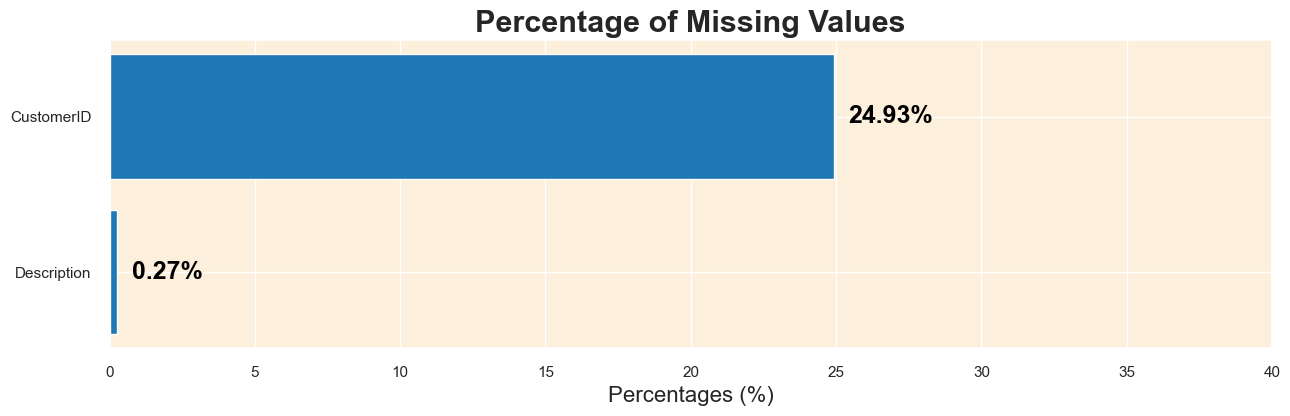

In [127]:
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100
# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#1f77b4')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

# **Visualizing the percentage of missing values present in each column**

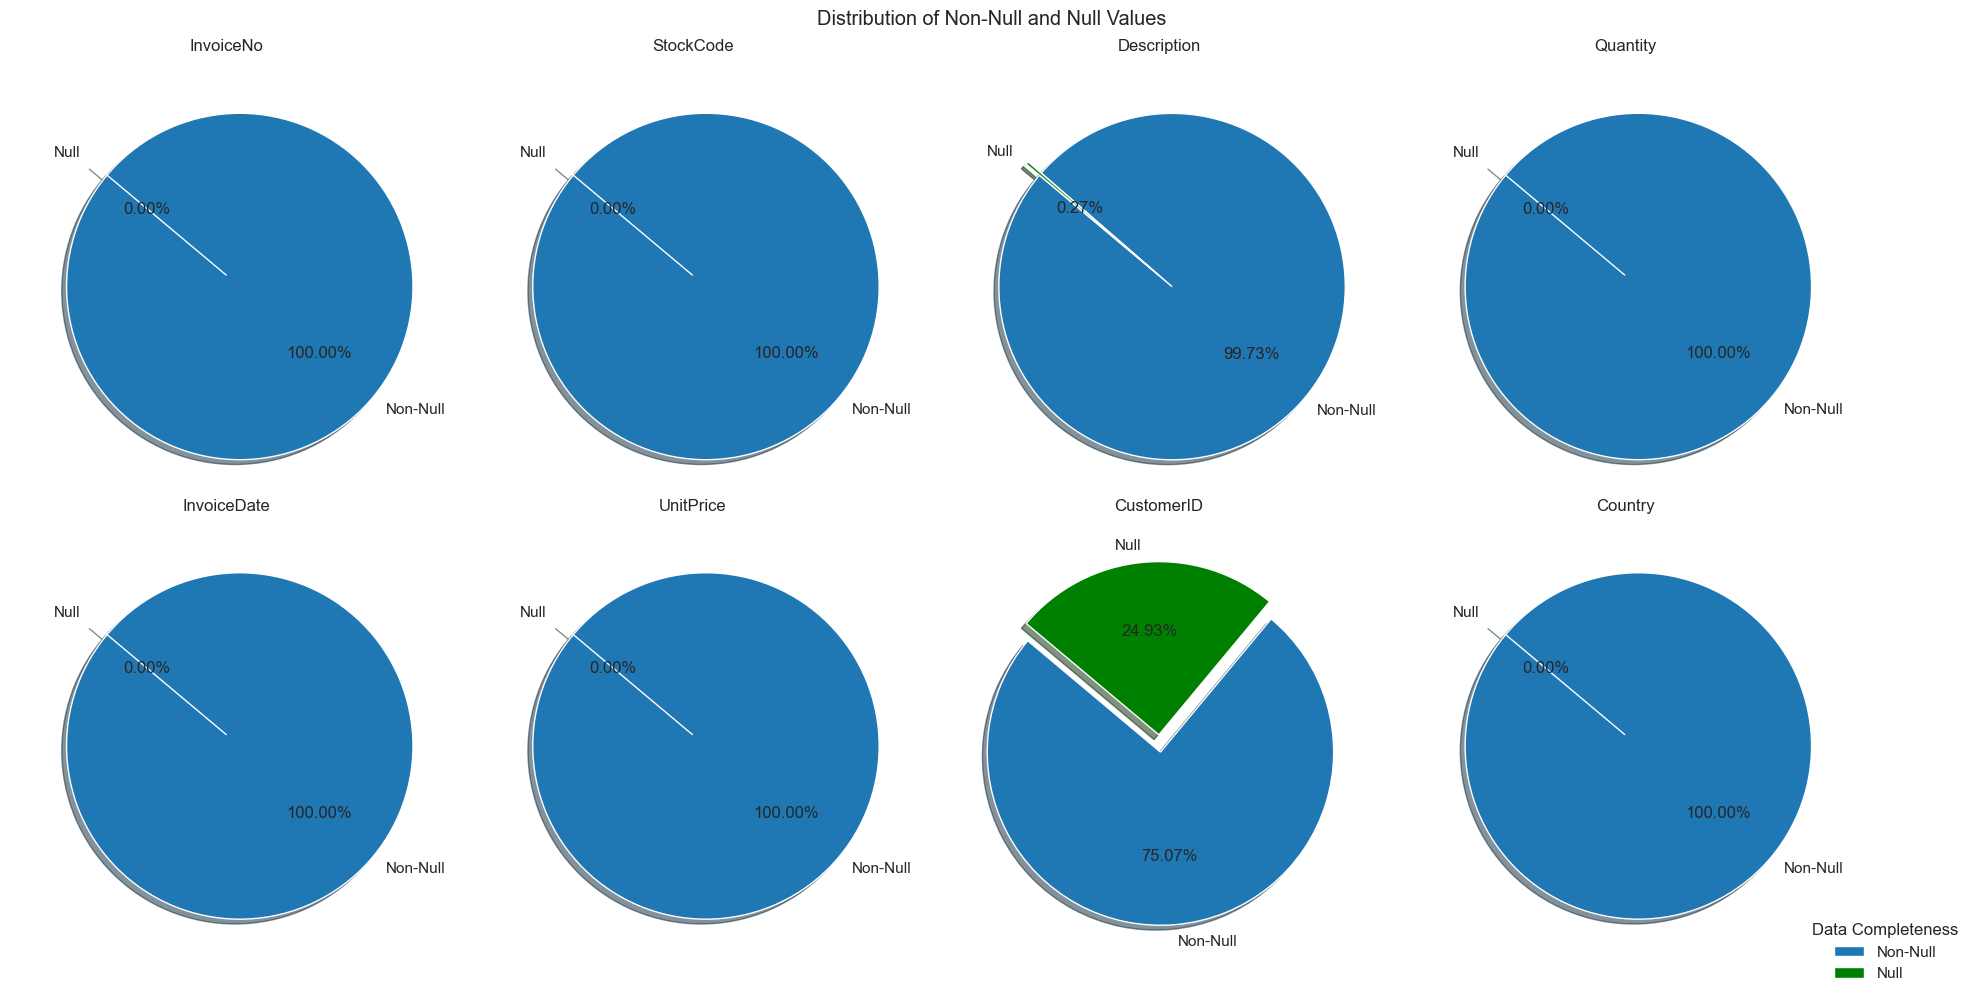

In [128]:
non_null_counts = []
null_counts = []

for col in df.columns:
    non_null_count = df[col].notnull().sum()
    null_count = df[col].isnull().sum()
    non_null_counts.append(non_null_count)
    null_counts.append(null_count)

# Creating a pie chart
labels = df.columns
colors = ['#1f77b4', 'green']
explode = (0.1, 0)

fig, axs = plt.subplots(2, len(df.columns) // 2, figsize=(20, 10))
fig.suptitle('Distribution of Non-Null and Null Values')

for i, ax in enumerate(axs.flat):
    ax.pie([non_null_counts[i], null_counts[i]], explode=explode, labels=['Non-Null', 'Null'],
           colors=colors, autopct='%1.2f%%', shadow=True, startangle=140)
    ax.set_title(labels[i])

# Adding legend outside the subplots
plt.legend(title="Data Completeness", loc="lower left", bbox_to_anchor=(0.9, -0.1))


plt.tight_layout()
plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff6200>Handling Missing Values Strategy:</font></h3>

- __`CustomerID` (24.93% missing values)__
   - The `CustomerID` column contains nearly a quarter of missing data. This column is essential for clustering customers and creating a recommendation system. Imputing such a large percentage of missing values might introduce significant bias or noise into the analysis.
    
   - Moreover, since the clustering is based on customer behavior and preferences, it's crucial to have accurate data on customer identifiers. Therefore, removing the rows with missing `CustomerID`s seems to be the most reasonable approach to maintain the integrity of the clusters and the analysis.

    
- __`Description` (0.27% missing values)__
   - The `Description` column has a minor percentage of missing values. However, it has been noticed that there are inconsistencies in the data where the same `StockCode` does not always have the same `Description`. This indicates data quality issues and potential errors in the product descriptions.
    
   - Given these inconsistencies, imputing the missing descriptions based on `StockCode` might not be reliable. Moreover, since the missing percentage is quite low, it would be prudent to remove the rows with missing `Description`s to avoid propagating errors and inconsistencies into the subsequent analyses.
   
By removing rows with missing values in the `CustomerID` and `Description` columns, we aim to construct a cleaner and more reliable dataset, which is essential for achieving accurate clustering and creating an effective recommendation system.


In [129]:
# Extracting rows with missing values in 'CustomerID' or 'Description' columns
missing_values = df[df['CustomerID'].isna() | df['Description'].isna() ]
missing_values.head(5)

InvoiceNo StockCode                      Description  Quantity  \
622     536414     22139                              NaN        56   
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   

          InvoiceDate  UnitPrice  CustomerID         Country  
622   12/1/2010 11:52       0.00         NaN  United Kingdom  
1443  12/1/2010 14:32       2.51         NaN  United Kingdom  
1444  12/1/2010 14:32       2.51         NaN  United Kingdom  
1445  12/1/2010 14:32       0.85         NaN  United Kingdom  
1446  12/1/2010 14:32       1.66         NaN  United Kingdom

In [130]:
# Removing rows with missing values in 'CustomerID' and 'Description' columns
df=df.dropna(subset=['CustomerID','Description'])

In [131]:
df.sample(5)

InvoiceNo StockCode                      Description  Quantity  \
424295    573248     23318   BOX OF 6 MINI VINTAGE CRACKERS        10   
412234    572283     23298                   SPOTTY BUNTING         2   
7362      537034     21724  PANDA AND BUNNIES STICKER SHEET        12   
119548    546549    47504K    ENGLISH ROSE GARDEN SECATEURS         1   
194325    553572     22549                 PICTURE DOMINOES        12   

             InvoiceDate  UnitPrice  CustomerID         Country  
424295  10/28/2011 12:09       2.49     14498.0  United Kingdom  
412234  10/23/2011 11:42       4.95     15000.0  United Kingdom  
7362     12/3/2010 17:20       0.85     13081.0  United Kingdom  
119548   3/14/2011 16:46       1.95     17799.0  United Kingdom  
194325    5/18/2011 9:37       1.45     18223.0  United Kingdom

In [132]:
# Verifying the removal of missing values
df.isnull().sum().sum()

0

<a id="duplicates"></a>
# <b><span style='color:#fcc36d'>Step 3.2 |</span><span style='color:#ff6200'> Handling Duplicates</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Next, we are going to recognize duplicate rows in the dataset:

In [133]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

# Displaying the first 10 records
duplicate_rows_sorted.head(10)

InvoiceNo StockCode                       Description  Quantity  \
494    536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
517    536409     21866       UNION JACK FLAG LUGGAGE TAG         1   
485    536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
539    536409     22111      SCOTTIE DOG HOT WATER BOTTLE         1   
489    536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
527    536409     22866     HAND WARMER SCOTTY DOG DESIGN         1   
521    536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
537    536409     22900   SET 2 TEA TOWELS I LOVE LONDON          1   
578    536412     21448         12 DAISY PEGS IN WOOD BOX         1   
598    536412     21448         12 DAISY PEGS IN WOOD BOX         1   

         InvoiceDate  UnitPrice  CustomerID         Country  
494  12/1/2010 11:45       1.25     17908.0  United Kingdom  
517  12/1/2010 11:45       1.25     17908.0  United Kingdom  
485  12/1/2010 11:45       4.95     17908.0  United Kingdom  
539  12/1/2010 11:45       4.95     17908.0  United Kingdom  
489  12/1/2010 11:45       2.10     17908.0  United Kingdom  
527  12/1/2010 11:45       2.10     17908.0  United Kingdom  
521  12/1/2010 11:45       2.95     17908.0  United Kingdom  
537  12/1/2010 11:45       2.95     17908.0  United Kingdom  
578  12/1/2010 11:49       1.65     17920.0  United Kingdom  
598  12/1/2010 11:49       1.65     17920.0  United Kingdom

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff6200>Handling Duplicates Strategy:</font></h3>
    
In the context of this project, the presence of completely identical rows, including identical transaction times, suggests that these might be data recording errors rather than genuine repeated transactions. Keeping these duplicate rows can introduce noise and potential inaccuracies in the clustering and recommendation system.

Therefore, I am going to remove these completely identical duplicate rows from the dataset. Removing these rows will help in achieving a cleaner dataset, which in turn would aid in building more accurate customer clusters based on their unique purchasing behaviors. Moreover, it would help in creating a more precise recommendation system by correctly identifying the products with the most purchases.

In [134]:
# Displaying the number of duplicate rows
print(f"The dataset contains {df.duplicated().sum()} duplicate rows that need to be removed.")

# Removing duplicate rows
df.drop_duplicates(inplace=True)

The dataset contains 5225 duplicate rows that need to be removed.


In [135]:
# Getting the number of rows in the dataframe
df.shape[0]

401604

<a id="InvoiceNo_cleaning"></a>
# <b><span style='color:#fcc36d'>Step 3.3 |</span><span style='color:#ff6200'> Treating Cancelled Transactions</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

To refine our understanding of customer behavior and preferences, we need to take into account the transactions that were cancelled. Initially, we will identify these transactions by filtering the rows where the `InvoiceNo` starts with "C". Subsequently, we will analyze these rows to understand their common characteristics or patterns:

In [136]:
# Filter out the rows with InvoiceNo starting with "C" and create a new column indicating the transaction status
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')
'''
C14245345  Cancelled
35365563   Completed
'''
# Analyze the characteristics of these rows (considering the new column)
cancelled_transactions = df[df['Transaction_Status'] == "Cancelled"]
completed_transactions = df[df['Transaction_Status'] == "Completed"]

#Summary statistics for these cancelled transactions
summary_cancelled = cancelled_transactions.describe()

#Summary statistics for these completed transactions
summary_completed = completed_transactions.describe()

# Print the summary statistics
print("Summary Statistics for Cancelled Transactions:")
print()
print(summary_cancelled)
print("\nSummary Statistics for Completed Transactions:")
print()
print(summary_completed)



Summary Statistics for Cancelled Transactions:

           Quantity     UnitPrice    CustomerID
count   8872.000000   8872.000000   8872.000000
mean     -30.774910     18.899512  14990.152953
std     1172.249902    445.190864   1708.230387
min   -80995.000000      0.010000  12346.000000
25%       -6.000000      1.450000  13505.000000
50%       -2.000000      2.950000  14868.000000
75%       -1.000000      4.950000  16393.000000
max       -1.000000  38970.000000  18282.000000

Summary Statistics for Completed Transactions:

            Quantity      UnitPrice     CustomerID
count  392732.000000  392732.000000  392732.000000
mean       13.153718       3.125596   15287.734822
std       181.588420      22.240725    1713.567773
min         1.000000       0.000000   12346.000000
25%         2.000000       1.250000   13955.000000
50%         6.000000       1.950000   15150.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000    8142.750000   18287.000000


# **Analyzing the distribution of cancelled and completed transactions.**

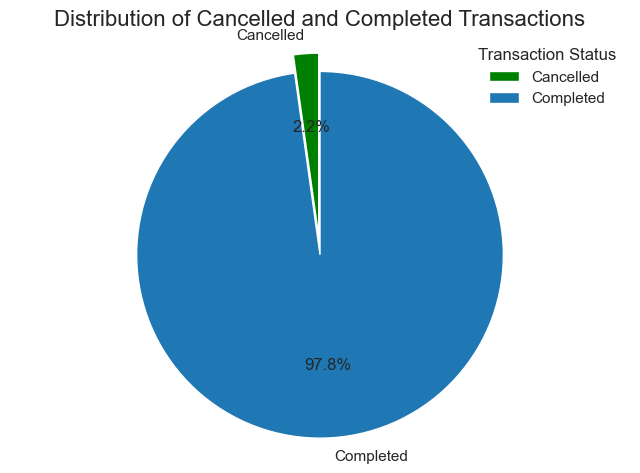

In [137]:
# Counting the number of cancelled and completed transactions
cancelled_count = cancelled_transactions.shape[0]
completed_count = completed_transactions.shape[0]

# Plotting the pie chart
labels = ['Cancelled', 'Completed']
sizes = [cancelled_count, completed_count]
colors = ['green', '#1f77b4']
explode = (0.1, 0)

plt.figure()
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Cancelled and Completed Transactions', fontsize=16)
plt.axis('equal')

# Adding legend
plt.legend(title="Transaction Status", loc="upper right")


plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inferences from the Cancelled Transactions Data:</font></h3>

**Inference:**

- **Cancelled Transactions:** The mean quantity for cancelled transactions is negative (-30.77), indicating a substantial reduction in the quantity of items purchased. The mean unit price is relatively high (18.90), suggesting higher-priced products may be involved. There's variability in customer IDs, with some potentially being regular customers.

- **Completed Transactions:** The mean quantity for completed transactions is positive (13.15), suggesting moderate item purchases. The mean unit price is lower (3.13), indicating lower-priced items. There's also variability in customer IDs, similar to cancelled transactions.

Overall, cancelled transactions involve larger reductions in quantity and potentially higher-priced items compared to completed transactions. Both types of transactions exhibit variability in customer IDs, suggesting involvement from different customer types.


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Strategy for Handling Cancelled Transactions:</font></h3>
    
Considering the project's objective to cluster customers based on their purchasing behavior and preferences and to eventually create a recommendation system, it's imperative to understand the cancellation patterns of customers. Therefore, the strategy is to retain these cancelled transactions in the dataset, marking them distinctly to facilitate further analysis. This approach will:

- Enhance the clustering process by incorporating patterns and trends observed in cancellation data, which might represent certain customer behaviors or preferences.
    
    
- Allow the recommendation system to possibly prevent suggesting products that have a high likelihood of being cancelled, thereby improving the quality of recommendations.



In [138]:
# Finding the percentage of cancelled transactions
cancelled_percentage = (cancelled_transactions.shape[0] / df.shape[0]) * 100

# Printing the percentage of cancelled transactions
print(f"The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%")

The percentage of cancelled transactions in the dataset is: 2.21%


<a id="StockCode_cleaning"></a>
# <b><span style='color:#fcc36d'>Step 3.4 |</span><span style='color:#ff6200'> Correcting StockCode Anomalies</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

First of all, lets find the number of unique stock codes and to plot the top 10 most frequent stock codes along with their percentage frequency:

In [139]:
# Finding the number of unique stock codes
unique_stock_codes = df['StockCode'].nunique()

# Printing the number of unique stock codes
print(f"The number of unique stock codes in the dataset is: {unique_stock_codes}")

The number of unique stock codes in the dataset is: 3684


StockCode
85123A    0.514188
22423     0.471609
85099B    0.413093
47566     0.350843
84879     0.349847
20725     0.335156
22720     0.304778
POST      0.297806
22197     0.276392
23203     0.275894
Name: proportion, dtype: float64


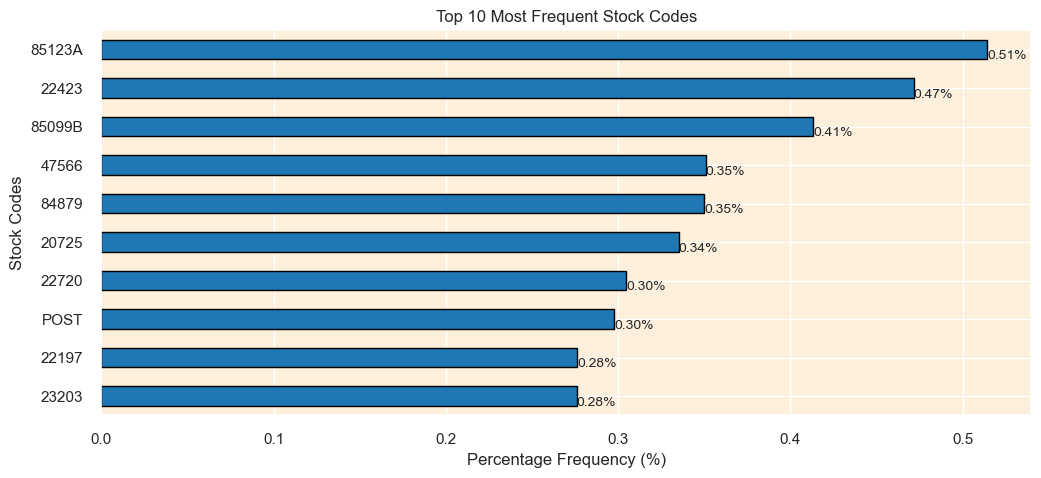

In [140]:
# Finding the top 10 most frequent stock codes
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10) * 100
print(top_10_stock_codes)
# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh', color='#1f77b4', edgecolor='black')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_stock_codes):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inferences on Stock Codes:</font></h3>

- **85123A**: This stock code contains alphanumeric characters, including letters ("A"). It represents approximately 0.51% of the total occurrences.

- **22423**: This particular stock code represents approximately 0.47% of the total occurrences.

- **85099B**: This stock code contains alphanumeric characters ("B"). It represents approximately 0.41% of the total occurrences.

- **47566**: This particular stock code represents approximately 0.35% of the total occurrences.

- **84879**: It represents approximately 0.35% of the total occurrences.

- **20725**: This particular stock code represents approximately 0.34% of the total occurrences.

- **22720**: This particular stock code represents approximately 0.30% of the total occurrences.

- **POST**: This stock code contains alphabetic characters. It represents approximately 0.29% of the total occurrences.

- **22197**: This particular stock code represents approximately 0.28% of the total occurrences.

- **23203**: This particular stock code represents approximately 0.28% of the total occurrences.

In summary, while most stock codes appear to follow a consistent format, some contain alphanumeric characters, indicating variations in how products are categorized or identified within the dataset. The percentage of occurrences provides insight into the relative frequency of each stock code.


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
To delve deeper into identifying these anomalies, let's explore the frequency of the number of numeric characters in the stock codes, which can provide insights into the nature of these unusual entries:

In [141]:
# Finding the number of numeric characters in each unique stock code
unique_stock_codes = df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

# Printing the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique stock codes:")
print("-"*70)
print(numeric_char_counts_in_unique_codes)

Value counts of numeric character frequencies in unique stock codes:
----------------------------------------------------------------------
5    3676
0       7
1       1
Name: count, dtype: int64


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inference:</font></h3>

Based on the value counts of numeric character frequencies in unique stock codes:

- The majority of unique stock codes (3676 out of the total) consist of 5 numeric characters. This suggests that a significant portion of the stock codes follow a consistent format, likely representing product identifiers or categories with a standardized length.

- There are a few occurrences of unique stock codes with numeric characters other than 5. This could indicate anomalies or variations in the stock code format, potentially representing specific product categories or identifiers that deviate from the norm.

In summary, we can generalize that apart from length 5 stock codes, all others are likely invalid and contain noise. The distribution of numeric character frequencies provides insight into the structure and consistency of stock codes within the dataset.


In [142]:
# Finding and printing the stock codes with 0 and 1 numeric characters
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

# Printing each stock code on a new line
print("Anomalous stock codes:")
print("-"*22)
for anomalous_stock_code in anomalous_stock_codes:
  print(anomalous_stock_code)

Anomalous stock codes:
----------------------
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Let's calculate the percentage of records with these anomalous stock codes:    

In [143]:
# Calculating the percentage of records with these stock codes
percentage_anomalous = (df['StockCode'].isin(anomalous_stock_codes).sum() / len(df)) * 100

# Printing the percentage
print(f"The percentage of records with anomalous stock codes in the dataset is: {percentage_anomalous:.2f}%")

The percentage of records with anomalous stock codes in the dataset is: 0.48%


# **Visualizing the anomalous stock codes**

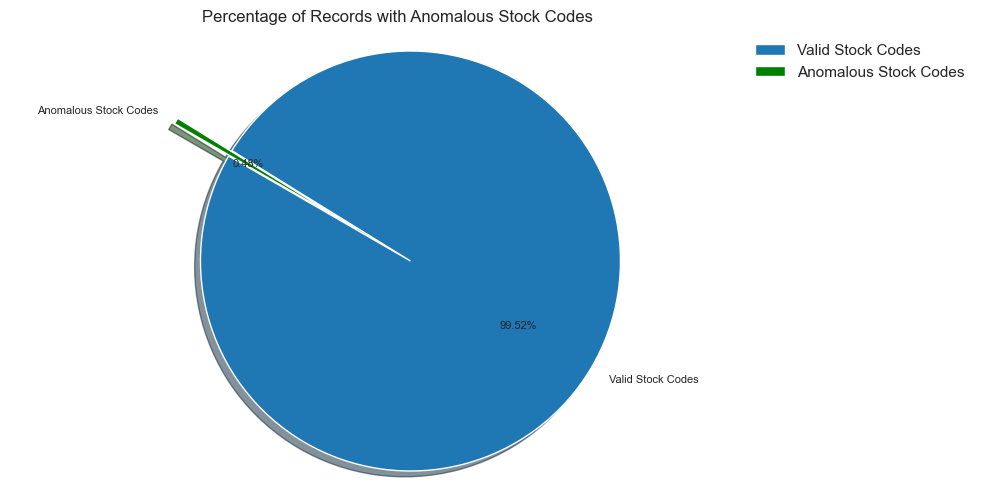

In [144]:
labels = ['Valid Stock Codes', 'Anomalous Stock Codes']
sizes = [100 - percentage_anomalous, percentage_anomalous]
colors = ['#1f77b4', 'green']
explode = (0.3, 0)

plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True,
        startangle=150, textprops={'fontsize':8})
plt.title('Percentage of Records with Anomalous Stock Codes')
plt.axis('equal')

plt.legend(labels=labels,loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff6200>Inference:</font></h3>

Based on the identified anomalous stock codes, which include "POST," "D," "C2," "M," "BANK CHARGES," "PADS," "DOT," and "CRUK," it is evident that these codes deviate from the expected format of typical stock codes. These anomalies represent approximately 0.48% of the total records in the dataset. It's important to investigate and address these anomalies, as they may indicate errors in data entry or categorization. Proper handling of anomalous data ensures the integrity and reliability of subsequent analyses and interpretations.


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Strategy:</font></h3>

Given the context of the project, where the aim is to cluster customers based on their product purchasing behaviors and develop a product recommendation system, it would be prudent to exclude these records with anomalous stock codes from the dataset. This way, the focus remains strictly on genuine product transactions, which would lead to a more accurate and meaningful analysis.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Thus, the strategy would be to filter out and remove rows with these anomalous stock codes from the dataset before proceeding with further analysis and model development:

In [145]:
# Removing rows with anomalous stock codes from the dataset
df=df[~df['StockCode'].isin(anomalous_stock_codes)]

In [146]:
# Getting the number of rows in the dataframe
df.shape[0]

399689

# **Verification of Anomalous Stock Code Removal from DataFrame**

In [147]:
# Finding the unique stock codes in the DataFrame after removal
remaining_stock_codes = df['StockCode'].unique()

# Checking if any of the previously identified anomalous stock codes still exist
anomalous_stock_codes_exist = any(code in remaining_stock_codes for code in anomalous_stock_codes)

# Verifying if all anomalous stock codes have been removed
if not anomalous_stock_codes_exist:
    print("All anomalous stock codes have been successfully removed.")
else:
    print("Anomalous stock codes still exist in the DataFrame.")


All anomalous stock codes have been successfully removed.


<a id="Description_cleaning"></a>
# <b><span style='color:#fcc36d'>Step 3.5 |</span><span style='color:#ff6200'> Cleaning Description Column</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
First, we will calculate the occurrence count of each unique description in the dataset. Then, we will plot the top 30 descriptions. This visualization will give a clear view of the highest occurring descriptions in the dataset:

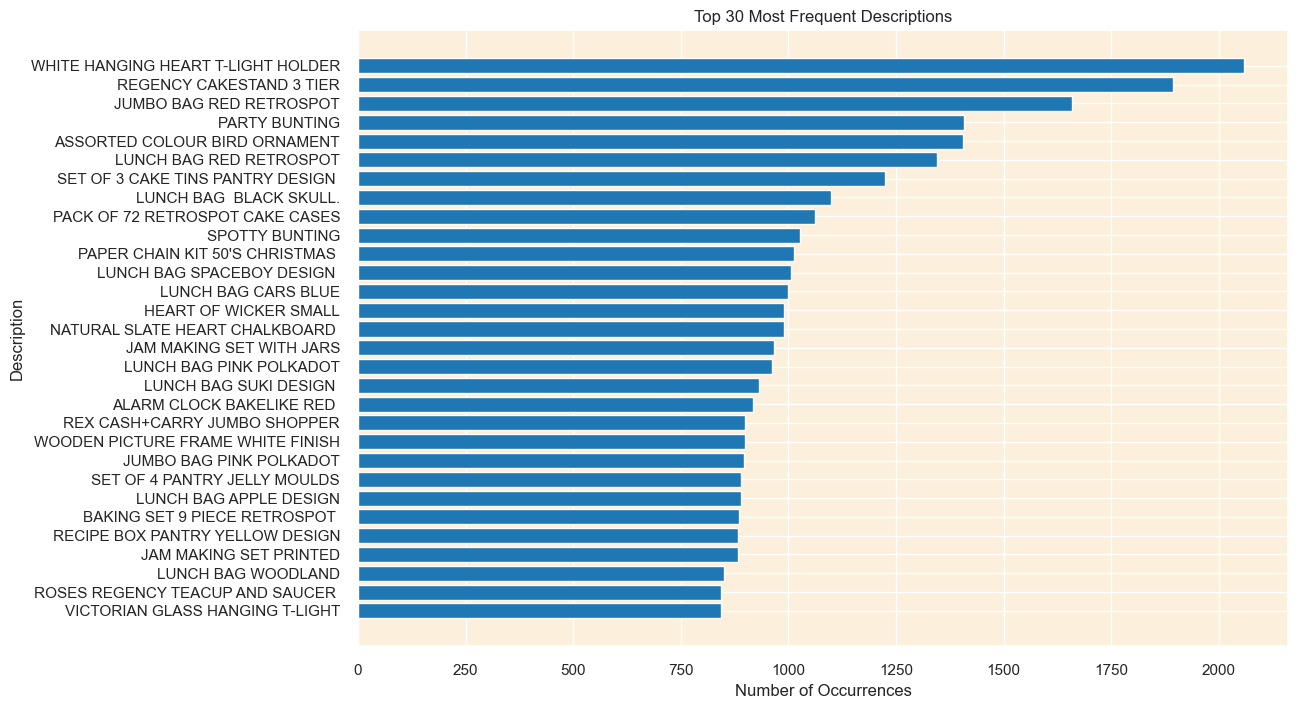

In [148]:
# Calculate the occurrence of each unique description and sort them
description_counts = df['Description'].value_counts()#value-count
# Get the top 30 descriptions
top_30_descriptions = description_counts[:30]

# Plotting
plt.figure(figsize=(12,8))
plt.barh(top_30_descriptions.index[::-1], top_30_descriptions.values[::-1], color='#1f77b4')

# Adding labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 30 Most Frequent Descriptions')

# Show the plot
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inferences on Descriptions:</font></h3>

- The most frequent descriptions are generally household items, particularly those associated with kitchenware, lunch bags, and decorative items.
       
    
- Interestingly, all the descriptions are in uppercase, which might be a standardized format for entering product descriptions in the database. However, considering the inconsistencies and anomalies encountered in the dataset so far, it would be prudent to check if there are descriptions entered in lowercase or a mix of case styles.

In [149]:
# Find unique descriptions containing lowercase characters
lowercase_descriptions = df['Description'].unique()
print(lowercase_descriptions)
lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]

# Print the unique descriptions containing lowercase characters
print("The unique descriptions containing lowercase characters are:")
print("-"*60)
for desc in lowercase_descriptions:
    print(desc)

['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'PINK CRYSTAL SKULL PHONE CHARM'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
The unique descriptions containing lowercase characters are:
------------------------------------------------------------
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inference:</font></h3>
    
- Upon reviewing the descriptions that contain lowercase characters, it is evident that some entries are not product descriptions, such as "__Next Day Carriage__" and "__High Resolution Image__". These entries seem to be unrelated to the actual products and might represent other types of information or service details.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Strategy:</font></h3>

- __Step 1__: Remove the rows where the descriptions contain service-related information like "__Next Day Carriage__" and "__High Resolution Image__", as these do not represent actual products and would not contribute to the clustering and recommendation system we aim to build.

    
- __Step 2__: For the remaining descriptions with mixed case, standardize the text to uppercase to maintain uniformity across the dataset. This will also assist in reducing the chances of having duplicate entries with different case styles.

By implementing the above strategy, we can enhance the quality of our dataset, making it more suitable for the analysis and modeling phases of our project.

In [150]:
service_related_descriptions = ["Next Day Carriage", "High Resolution Image"]

# Calculating the percentage of records with service-related descriptions
service_related_percentage = df[df['Description'].isin(service_related_descriptions)].shape[0] / df.shape[0] * 100

# Printing the percentage of records with service-related descriptions
print(f"The percentage of records with service-related descriptions in the dataset is: {service_related_percentage:.2f}%")


The percentage of records with service-related descriptions in the dataset is: 0.02%


# **Visualizing the percentage of Records with Service-Related Descriptions**

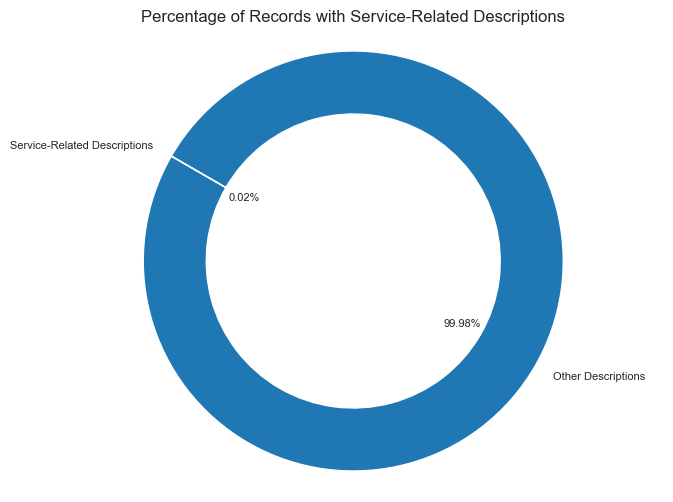

In [151]:
labels = ["Service-Related Descriptions", "Other Descriptions"]
percentages = [service_related_percentage, 100 - service_related_percentage]

colors = ['red', '#1f77b4']

# Plotting the donut chart
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=labels, colors=colors, autopct='%1.2f%%', startangle=150, wedgeprops=dict(width=0.3),
        textprops={'fontsize':8})

centre_circle = plt.Circle((0,0),0.1,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Percentage of Records with Service-Related Descriptions')

plt.axis('equal')

plt.show()


In [152]:
# Removing rows with service-related information in the description
df = df[~df['Description'].isin(service_related_descriptions)]
# Standardizing the text to uppercase to maintain uniformity across the dataset
df['Description'] = df['Description'].str.upper()
# Getting the number of rows in the dataframe
df.shape[0]

399606

<a id="UnitPrice_cleaning"></a>
# <b><span style='color:#fcc36d'>Step 3.6 |</span><span style='color:#ff6200'> Treating Zero Unit Prices</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
In this step, first I am going to take a look at the statistical description of the `UnitPrice` column:

In [153]:
df['UnitPrice'].describe()

count    399606.000000
mean          2.904957
std           4.448796
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inference:</font></h3>
    
- The transactions with zero unit prices, although few in number (33 transactions), exhibit a wide range of quantities involved, with a mean quantity of 420.52 and a substantial standard deviation of 2176.71. This variability is evident in the minimum quantity of 1 and the maximum quantity of 12,540. The distribution of quantities is skewed, as indicated by the median (50th percentile) quantity of 11, which is significantly lower than the mean.

- The presence of transactions with such large quantities suggests that these may be bulk or wholesale purchases rather than typical retail transactions. Therefore, including these transactions in certain analyses, such as clustering or segmentation based on purchasing behavior, could potentially skew the results and lead to inaccurate insights. It's essential to consider the nature of these transactions and their potential impact on the analysis objectives before proceeding with further analysis.

In [154]:
df[df['UnitPrice']==0].describe()['Quantity']

count       33.000000
mean       420.515152
std       2176.713608
min          1.000000
25%          2.000000
50%         11.000000
75%         36.000000
max      12540.000000
Name: Quantity, dtype: float64

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inferences on UnitPrice: </font></h3>

- The transactions with a unit price of zero are relatively few in number (33 transactions).
    
    
- These transactions have a large variability in the quantity of items involved, ranging from 1 to 12540, with a substantial standard deviation.
    
    
- Including these transactions in the clustering analysis might introduce noise and could potentially distort the customer behavior patterns identified by the clustering algorithm.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Strategy: </font></h3>

Given the small number of these transactions and their potential to introduce noise in the data analysis, the strategy should be to remove these transactions from the dataset. This would help in maintaining a cleaner and more consistent dataset, which is essential for building an accurate and reliable clustering model and recommendation system.

In [155]:
# Removing records with a unit price of zero to avoid potential data entry errors
df=df[df['UnitPrice'] != 0]

<a id="outlier_cleaning"></a>
# <b><span style='color:#fcc36d'>Step 3.7 |</span><span style='color:#ff6200'> Outlier Treatment</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
In K-means clustering, the algorithm is sensitive to both the scale of data and the presence of outliers, as they can significantly influence the position of centroids, potentially leading to incorrect cluster assignments. However, considering the context of this project where the final goal is to understand customer behavior and preferences through K-means clustering, it would be more prudent to address the issue of outliers __after the feature engineering phase__ where we create a customer-centric dataset. At this stage, the data is transactional, and removing outliers might eliminate valuable information that could play a crucial role in segmenting customers later on. Therefore, we will postpone the outlier treatment and proceed to the next stage for now.

In [156]:
# Resetting the index of the cleaned dataset
df.reset_index(drop=True, inplace=True)

In [157]:
# Getting the number of rows in the dataframe
df.shape[0]

399573

<a id="feature_engineering"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 4 | Feature Engineering</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

In order to create a comprehensive customer-centric dataset for clustering and recommendation, the following features can be engineered from the available data:

<a id="rfm_features"></a>
# <b><span style='color:#fcc36d'>Step 4.1 |</span><span style='color:#ff6200'> RFM Features</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

RFM is a method used for analyzing customer value and segmenting the customer base. It is an acronym that stands for:

- __Recency (R):__ This metric indicates how recently a customer has made a purchase. A lower recency value means the customer has purchased more recently, indicating higher engagement with the brand.

    
- __Frequency (F):__ This metric signifies how often a customer makes a purchase within a certain period. A higher frequency value indicates a customer who interacts with the business more often, suggesting higher loyalty or satisfaction.

    
- __Monetary (M):__ This metric represents the total amount of money a customer has spent over a certain period. Customers who have a higher monetary value have contributed more to the business, indicating their potential high lifetime value.

    
Together, these metrics help in understanding a customer's buying behavior and preferences, which is pivotal in personalizing marketing strategies and creating a recommendation system.

<a id="recency"></a>
## <b><span style='color:#fcc36d'>Step 4.1.1 |</span><span style='color:#ff6200'> Recency (R)</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
In this step, we focus on understanding how recently a customer has made a purchase. This is a crucial aspect of customer segmentation as it helps in identifying the engagement level of customers. Here, I am going to define the following feature:

- __Days Since Last Purchase__: This feature represents the number of days that have passed since the customer's last purchase. A lower value indicates that the customer has purchased recently, implying a higher engagement level with the business, whereas a higher value may indicate a lapse or decreased engagement. By understanding the recency of purchases, businesses can tailor their marketing strategies to re-engage customers who have not made purchases in a while, potentially increasing customer retention and fostering loyalty.

In [158]:
# Convert InvoiceDate to datetime type
#extract date

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert InvoiceDate to datetime and extract only the date
df['InvoiceDay'] = df['InvoiceDate'].dt.date

# Find the most recent purchase date for each customer
customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()

# Find the most recent date in the entire dataset
most_recent_date = df['InvoiceDay'].max()

# Convert InvoiceDay to datetime type before subtraction
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the number of days since the last purchase for each customer
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days

# Remove the InvoiceDay column
customer_data.drop(columns=['InvoiceDay'],inplace=True)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Now, __customer_data__ dataframe contains the __`Days_Since_Last_Purchase`__ feature:

In [159]:
customer_data.head()

CustomerID  Days_Since_Last_Purchase
0     12346.0                       325
1     12347.0                         2
2     12348.0                        75
3     12349.0                        18
4     12350.0                       310

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Note: </font></h3>
    
- We've named the customer-centric dataframe as __customer_data__, which will eventually contain all the customer-based features we plan to create.

<a id="frequency"></a>
## <b><span style='color:#fcc36d'>Step 4.1.2 |</span><span style='color:#ff6200'> Frequency (F)</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

In this step, I am going to create two features that quantify the frequency of a customer's engagement with the retailer:

- __Total Transactions__: This feature represents the total number of transactions made by a customer. It helps in understanding the engagement level of a customer with the retailer.

    

- __Total Products Purchased__: This feature indicates the total number of products (sum of quantities) purchased by a customer across all transactions. It gives an insight into the customer's buying behavior in terms of the volume of products purchased.

    
These features will be crucial in segmenting customers based on their buying frequency, which is a key aspect in determining customer segments for targeted marketing and personalized recommendations.

In [160]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

# Calculate the total number of products purchased by each customer
total_products_purchased = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = customer_data.merge(total_transactions,on='CustomerID')

customer_data = customer_data.merge(total_products_purchased,on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.sample(10)

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
1953     15010.0                        35                   1   
1032     13735.0                        24                   8   
253      12654.0                        10                   5   
2599     15860.0                        40                   8   
3659     17334.0                       301                   3   
3171     16652.0                        53                  11   
1255     14040.0                        40                  14   
3269     16776.0                        60                   1   
734      13317.0                        64                   9   
3389     16940.0                        52                   3   

      Total_Products_Purchased  
1953                       184  
1032                      1081  
253                        260  
2599                       437  
3659                       314  
3171                      3267  
1255                      1515  
3269                       254  
734                       1003  
3389                      2169

<a id="monetary"></a>
## <b><span style='color:#fcc36d'>Step 4.1.3 |</span><span style='color:#ff6200'> Monetary (M)</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

In this step, I am going to create two features that represent the monetary aspect of customer's transactions:

- __Total Spend__: This feature represents the total amount of money spent by each customer. It is calculated as the sum of the product of `UnitPrice` and `Quantity` for all transactions made by a customer. This feature is crucial as it helps in identifying the total revenue generated by each customer, which is a direct indicator of a customer's value to the business.

    
- __Average Transaction Value__: This feature is calculated as the __Total Spend__ divided by the __Total Transactions__ for each customer. It indicates the average value of a transaction carried out by a customer. This metric is useful in understanding the spending behavior of customers per transaction, which can assist in tailoring marketing strategies and offers to different customer segments based on their average spending patterns.

In [161]:
# Calculate the total spend by each customer
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

# Calculate the average transaction value for each customer
average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.sample(15)

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
2006     15074.0                       105                   1   
1896     14918.0                       115                   2   
403      12854.0                        78                   5   
1044     13750.0                        53                   5   
4113     17947.0                        37                   1   
2630     15906.0                        19                   8   
2887     16255.0                        16                  10   
2125     15227.0                        36                   5   
2263     15414.0                         9                   3   
4056     17871.0                       204                   1   
3061     16494.0                       296                   1   
1834     14834.0                        17                   8   
2354     15533.0                        19                   5   
2148     15256.0                       148                   1   
1666     14598.0                        44                   1   

      Total_Products_Purchased  Total_Spend  Average_Transaction_Value  
2006                       431       735.67                  735.67000  
1896                       675      1610.15                  805.07500  
403                        621      1280.90                  256.18000  
1044                       516      1647.26                  329.45200  
4113                       168       176.68                  176.68000  
2630                       538      1521.79                  190.22375  
2887                      1760      2609.30                  260.93000  
2125                       750      1219.40                  243.88000  
2263                       442       759.90                  253.30000  
4056                       182       155.90                  155.90000  
3061                       675       826.53                  826.53000  
1834                       731      1698.35                  212.29375  
2354                       256       746.92                  149.38400  
2148                        55        98.45                   98.45000  
1666                       189       221.97                  221.97000

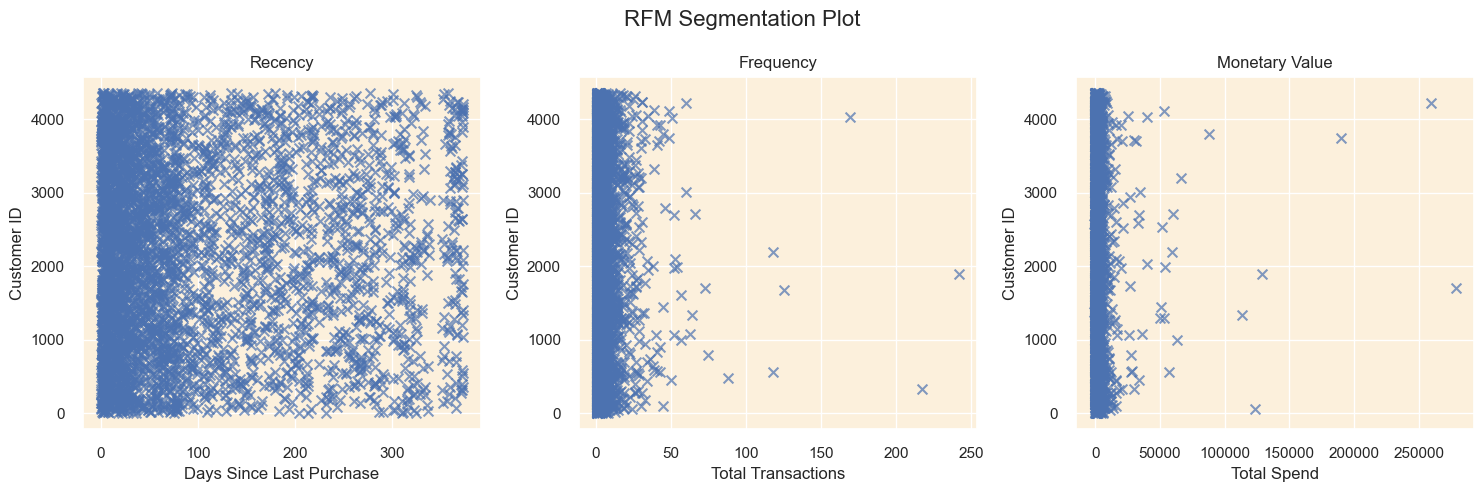

In [162]:
import matplotlib.pyplot as plt

# Create subplots with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Define custom marker styles and sizes
marker_styles = 'x'
size = 50  # Adjust size as needed

# Scatter plot: Recency
axs[0].scatter(customer_data['Days_Since_Last_Purchase'], customer_data.index, alpha=0.7, marker=marker_styles, s=size)
axs[0].set_title('Recency')
axs[0].set_xlabel('Days Since Last Purchase')
axs[0].set_ylabel('Customer ID')

# Scatter plot: Frequency
axs[1].scatter(customer_data['Total_Transactions'], customer_data.index, alpha=0.7, marker=marker_styles, s=size)
axs[1].set_title('Frequency')
axs[1].set_xlabel('Total Transactions')
axs[1].set_ylabel('Customer ID')

# Scatter plot: Monetary Value
axs[2].scatter(customer_data['Total_Spend'], customer_data.index, alpha=0.7, marker=marker_styles, s=size)
axs[2].set_title('Monetary Value')
axs[2].set_xlabel('Total Spend')
axs[2].set_ylabel('Customer ID')

# Add a title to the entire subplot
plt.suptitle('RFM Segmentation Plot', fontsize=16)

# Adjust layout
plt.tight_layout()
plt.show()


<a id="product_diversity"></a>
# <b><span style='color:#fcc36d'>Step 4.2 |</span><span style='color:#ff6200'> Product Diversity</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

In this step, we are going to understand the diversity in the product purchase behavior of customers. Understanding product diversity can help in crafting personalized marketing strategies and product recommendations. Here, I am going to define the following feature:

- __Unique Products Purchased__: This feature represents the number of distinct products bought by a customer. A higher value indicates that the customer has a diverse taste or preference, buying a wide range of products, while a lower value might indicate a focused or specific preference. Understanding the diversity in product purchases can help in segmenting customers based on their buying diversity, which can be a critical input in personalizing product recommendations.

In [163]:
# Calculate the number of unique products purchased by each customer
unique_products_purchased = df.groupby('CustomerID')['StockCode'].nunique().reset_index()

unique_products_purchased.rename(columns={'StockCode':'Unique_Products_Purchased'},inplace=True)

# Merge the new feature into the customer_data dataframe
customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12347.0                         2                   7   
2     12348.0                        75                   4   
3     12349.0                        18                   1   
4     12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0         0.00                   0.000000   
1                      2458      4310.00                 615.714286   
2                      2332      1437.24                 359.310000   
3                       630      1457.55                1457.550000   
4                       196       294.40                 294.400000   

   Unique_Products_Purchased  
0                          1  
1                        103  
2                         21  
3                         72  
4                         16

In [164]:
customer_data.sample(15)

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
3748     17449.0                         2                   8   
1556     14457.0                       310                   1   
4126     17964.0                        31                   2   
1693     14640.0                        15                   8   
4157     18008.0                        70                   9   
2607     15869.0                       277                   2   
4259     18150.0                        32                   3   
3699     17384.0                        19                   2   
114      12489.0                       336                   1   
2193     15316.0                       326                   1   
2697     16009.0                        22                   4   
2253     15399.0                         1                   3   
1707     14657.0                        17                   5   
331      12752.0                        81                   1   
1594     14504.0                        47                   4   

      Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
3748                      1113      2500.21                 312.526250   
1556                        88       113.64                 113.640000   
4126                       294       463.21                 231.605000   
1693                       823      2024.45                 253.056250   
4157                      1581      2116.19                 235.132222   
2607                       175       149.64                  74.820000   
4259                       332       566.58                 188.860000   
3699                        88       336.40                 168.200000   
114                        103       298.93                 298.930000   
2193                       100       165.00                 165.000000   
2697                       366       972.11                 243.027500   
2253                       611       815.77                 271.923333   
1707                       465       838.27                 167.654000   
331                       2262      4366.78                4366.780000   
1594                       308       673.26                 168.315000   

      Unique_Products_Purchased  
3748                        177  
1556                          4  
4126                         84  
1693                         87  
4157                         24  
2607                         13  
4259                         29  
3699                         12  
114                          14  
2193                          1  
2697                         68  
2253                         45  
1707                        103  
331                          53  
1594                         85

<a id="behaviroal_features"></a>
# <b><span style='color:#fcc36d'>Step 4.3 |</span><span style='color:#ff6200'> Behavioral Features</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

In this step, we aim to understand and capture the shopping patterns and behaviors of customers. These features will give us insights into the customers' preferences regarding when they like to shop, which can be crucial information for personalizing their shopping experience. Here are the features I am planning to introduce:

- __Average Days Between Purchases__: This feature represents the average number of days a customer waits before making another purchase. Understanding this can help in predicting when the customer is likely to make their next purchase, which can be a crucial metric for targeted marketing and personalized promotions.

    
- __Favorite Shopping Day__: This denotes the day of the week when the customer shops the most. This information can help in identifying the preferred shopping days of different customer segments, which can be used to optimize marketing strategies and promotions for different days of the week.

    
- __Favorite Shopping Hour__: This refers to the hour of the day when the customer shops the most. Identifying the favorite shopping hour can aid in optimizing the timing of marketing campaigns and promotions to align with the times when different customer segments are most active.

    
By including these behavioral features in our dataset, we can create a more rounded view of our customers, which will potentially enhance the effectiveness of the clustering algorithm, leading to more meaningful customer segments.

In [165]:
# Extract day of week and hour from InvoiceDate
df['Day_Of_Week'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

# Calculate the average number of days between consecutive purchases
days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

# Find the favorite shopping day of the week
favorite_shopping_day = df.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

# Find the favorite shopping hour of the day
favorite_shopping_hour = df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

# Merge the new features into the customer_data dataframe
customer_data=customer_data.merge(average_days_between_purchases,on=['CustomerID'])
customer_data=customer_data.merge(favorite_shopping_day,on=['CustomerID'])
customer_data=customer_data.merge(favorite_shopping_hour,on=['CustomerID'])


# Display the first few rows of the customer_data dataframe
customer_data.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0     12346.0                       325                   2   
1     12347.0                         2                   7   
2     12348.0                        75                   4   
3     12349.0                        18                   1   
4     12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0         0.00                   0.000000   
1                      2458      4310.00                 615.714286   
2                      2332      1437.24                 359.310000   
3                       630      1457.55                1457.550000   
4                       196       294.40                 294.400000   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                          1                        0.000000            1   
1                        103                        2.016575            1   
2                         21                       10.884615            3   
3                         72                        0.000000            0   
4                         16                        0.000000            2   

   Hour  
0    10  
1    14  
2    19  
3     9  
4    16

<a id="geographical_features"></a>
# <b><span style='color:#fcc36d'>Step 4.4 |</span><span style='color:#ff6200'> Geographic Features</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
In this step, we will introduce a geographic feature that reflects the geographical location of customers. Understanding the geographic distribution of customers is pivotal for several reasons:

- __Country__: This feature identifies the country where each customer is located. Including the country data can help us understand region-specific buying patterns and preferences. Different regions might have varying preferences and purchasing behaviors which can be critical in personalizing marketing strategies and inventory planning. Furthermore, it can be instrumental in logistics and supply chain optimization, particularly for an online retailer where shipping and delivery play a significant role.

In [166]:
df['Country'].value_counts(normalize=True).head()

Country
United Kingdom    0.890971
Germany           0.022722
France            0.020402
EIRE              0.018440
Spain             0.006162
Name: proportion, dtype: float64

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inference: </font></h3>
  
We have conducted an analysis of the top five countries based on the percentage of customers. Here are the findings:

1. **United Kingdom (89.10%):** The majority of customers are located in the United Kingdom, indicating a strong presence or customer base in the UK. Tailoring marketing strategies and inventory planning to UK preferences and behaviors is crucial.

2. **Germany (2.27%):** Germany represents a significant portion of the customer base, suggesting potential for growth or expansion in the German market.

3. **France (2.04%):** While smaller than the UK and Germany, France still represents a notable portion of the customer base, warranting attention for targeted marketing efforts.

4. **EIRE (1.84%):** EIRE (Ireland) presents an opportunity for growth and market penetration, with unique preferences and behaviors to be considered.

5. **Spain (0.62%):** Spain, though smaller in percentage, offers potential for expansion and targeted marketing efforts.

### Next Steps

The analysis of geographic features provides valuable insights for tailoring marketing strategies, optimizing inventory planning, and expanding into new markets. Moving forward, we will incorporate these insights into our customer segmentation models to further enhance our understanding of customer behavior and preferences.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Methodology: </font></h3>

- First, we will group the data by `CustomerID` and `Country` and calculate the number of transactions per country for each customer.

- Next, we will identify the main country for each customer (the country from which they have the maximum transactions).
    
- Then, we will create a binary column indicating whether the customer is from the UK or not.
    
- Finally, we will merge this information with the `customer_data` dataframe to include the new feature in our analysis.

In [167]:
# Group by CustomerID and Country to get the number of transactions per country for each customer
customer_country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

# Get the country with the maximum number of transactions for each customer (in case a customer has transactions from multiple countries)
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

# Create a binary column indicating whether the customer is from the UK or not
customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

# Merge this data with our customer_data dataframe
customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')

# Display the first few rows of the customer_data dataframe
customer_data.sample(5)

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
1387     14245.0                       176                   5   
4051     17960.0                       171                   1   
336      12758.0                       116                   2   
1032     13755.0                         3                  10   
4271     18272.0                         2                   7   

      Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
1387                       971      1677.48                 335.496000   
4051                        41        73.78                  73.780000   
336                       2135      2791.59                1395.795000   
1032                      1219      2101.39                 210.139000   
4271                      2044      3064.78                 437.825714   

      Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
1387                        107                        0.783784            0   
4051                         26                        0.000000            1   
336                          84                        1.666667            1   
1032                        232                        0.186916            0   
4271                         99                        1.443787            3   

      Hour  Is_UK  
1387    10      1  
4051    14      1  
336     12      0  
1032    13      1  
4271    12      1

In [168]:
# Display feature distribution
customer_data['Is_UK'].value_counts()

Is_UK
1    3866
0     416
Name: count, dtype: int64

<a id="cancellation_insights"></a>
# <b><span style='color:#fcc36d'>Step 4.5 |</span><span style='color:#ff6200'> Cancellation Insights</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

In this step, We are going to delve deeper into the cancellation patterns of customers to gain insights that can enhance our customer segmentation model. The features I am planning to introduce are:

- __Cancellation Frequency__: This metric represents the total number of transactions a customer has canceled. Understanding the frequency of cancellations can help us identify customers who are more likely to cancel transactions. This could be an indicator of dissatisfaction or other issues, and understanding this can help us tailor strategies to reduce cancellations and enhance customer satisfaction.

    
- __Cancellation Rate__: This represents the proportion of transactions that a customer has canceled out of all their transactions. This metric gives a normalized view of cancellation behavior. A high cancellation rate might be indicative of an unsatisfied customer segment. By identifying these segments, we can develop targeted strategies to improve their shopping experience and potentially reduce the cancellation rate.

By incorporating these cancellation insights into our dataset, we can build a more comprehensive view of customer behavior, which could potentially aid in creating more effective and nuanced customer segmentation.


In [169]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Calculate the number of cancelled transactions for each customer
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)

#no. of cancellations per customer

# Merge the Cancellation Frequency data into the customer_data dataframe

customer_data = pd.merge(customer_data, cancellation_frequency, on='CustomerID', how='left')

# Replace NaN values with 0 (for customers who have not cancelled any transaction)
customer_data['Cancellation_Frequency'].fillna(0,inplace=True)



In [170]:
# Calculate the Cancellation Rate
customer_data['Cancellation Rate'] = customer_data['Cancellation_Frequency'] / total_transactions['InvoiceNo']
customer_data['Cancellation Rate'] = customer_data['Cancellation Rate'].apply(lambda x: '{:.6f}'.format(x))

# Display the first few rows of the customer_data dataframe
customer_data.sample(5)

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
3902     17739.0                        11                   8   
3635     17384.0                        19                   2   
1661     14628.0                        91                   2   
545      13065.0                       373                   1   
2296     15505.0                        52                   7   

      Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
3902                       856      2786.05                 348.256250   
3635                        88       336.40                 168.200000   
1661                       272       671.96                 335.980000   
545                         74       205.86                 205.860000   
2296                      2348      3497.14                 499.591429   

      Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
3902                         29                        7.425532            1   
3635                         12                       14.285714            6   
1661                         22                        6.565217            0   
545                          14                        0.000000            2   
2296                         90                        1.051020            4   

      Hour  Is_UK  Cancellation_Frequency Cancellation Rate  
3902     9      1                     1.0          0.333333  
3635    15      1                     0.0          0.000000  
1661    14      1                     0.0          0.000000  
545     16      1                     0.0          0.000000  
2296     7      1                     2.0          2.000000

<a id="seasonality_trends"></a>
# <b><span style='color:#fcc36d'>Step 4.6 |</span><span style='color:#ff6200'> Seasonality & Trends</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

In this step, we will delve into the seasonality and trends in customers' purchasing behaviors, which can offer invaluable insights for tailoring marketing strategies and enhancing customer satisfaction. Here are the features I am looking to introduce:

- __Monthly_Spending_Mean__: This is the average amount a customer spends monthly. It helps us gauge the general spending habit of each customer. A higher mean indicates a customer who spends more, potentially showing interest in premium products, whereas a lower mean might indicate a more budget-conscious customer.

    
- __Monthly_Spending_Std__: This feature indicates the variability in a customer's monthly spending. A higher value signals that the customer's spending fluctuates significantly month-to-month, perhaps indicating sporadic large purchases. In contrast, a lower value suggests more stable, consistent spending habits. Understanding this variability can help in crafting personalized promotions or discounts during periods they are expected to spend more.

    
- __Spending_Trend__: This reflects the trend in a customer's spending over time, calculated as the slope of the linear trend line fitted to their spending data. A positive value indicates an increasing trend in spending, possibly pointing to growing loyalty or satisfaction. Conversely, a negative trend might signal decreasing interest or satisfaction, highlighting a need for re-engagement strategies. A near-zero value signifies stable spending habits. Recognizing these trends can help in developing strategies to either maintain or alter customer spending patterns, enhancing the effectiveness of marketing campaigns.

By incorporating these detailed insights into our customer segmentation model, we can create more precise and actionable customer groups, facilitating the development of highly targeted marketing strategies and promotions.


## Random Forest Regressor For Predicting Trends

In [171]:
from sklearn.ensemble import RandomForestRegressor

def calculate_trend(spend_data):
    if len(spend_data) > 1:
        # Feature engineering: calculate moving averages
        # Here, I'm using a simple moving average window of 3
        moving_avg = np.convolve(spend_data, np.ones(3)/3, mode='valid')
        
        # Prepare features and target
        X = np.arange(len(moving_avg)).reshape(-1, 1)
        y = moving_avg
        
        # Train Random Forest model
        model = RandomForestRegressor()
        model.fit(X, y)
        
        # Predict using the trained model
        predicted_trend = model.predict(X)
        
        # Return the mean of the predicted trend as an indicator
        return np.mean(predicted_trend)
    else:
        return 0


In [172]:
# Extract month and year from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
# Calculate monthly spending for each customer
monthly_spending = df.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

In [173]:
# Apply the calculate_trend function to find the spending trend for each customer
spending_trends = monthly_spending.groupby('CustomerID')['Total_Spend'].apply(calculate_trend).reset_index()

In [174]:
spending_trends

CustomerID  Total_Spend
0        12346.0     0.000000
1        12347.0   613.042227
2        12348.0   326.556000
3        12349.0     0.000000
4        12350.0     0.000000
...          ...          ...
4357     18280.0     0.000000
4358     18281.0     0.000000
4359     18282.0    58.866667
4360     18283.0   181.894612
4361     18287.0   612.426667

[4362 rows x 2 columns]

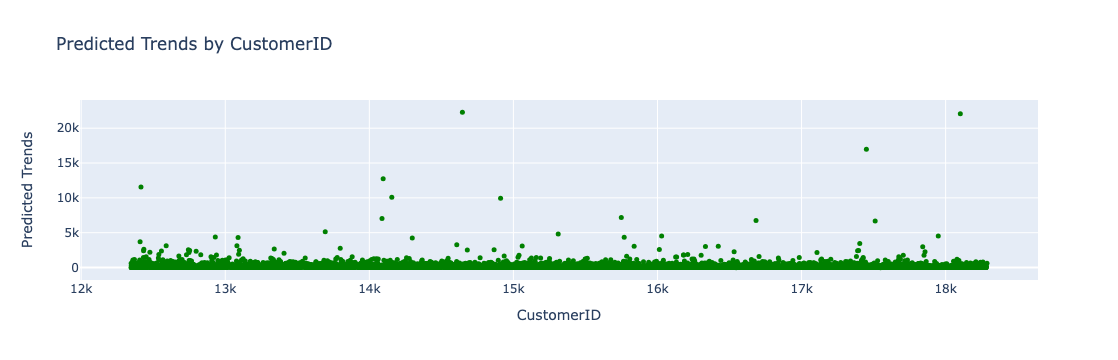

In [175]:
import plotly.graph_objs as go

# Assuming spending_trends contains CustomerID and predicted_trends

# Create scatter plot
scatter_plot = go.Scatter(
    x=spending_trends['CustomerID'],
    y=spending_trends['Total_Spend'],
    mode='markers',
    marker=dict(
        symbol='circle',
        size=5,
        color='green'
    ),
    name='Predicted Trends'
)

# Create layout
layout = go.Layout(
    title='Predicted Trends by CustomerID',
    xaxis=dict(title='CustomerID'),
    yaxis=dict(title='Predicted Trends')
)

# Create figure
fig = go.Figure(data=[scatter_plot], layout=layout)

# Show the plot
fig.show()


In [176]:
# Extract month and year from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Calculate monthly spending for each customer
monthly_spending = df.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()
#print(monthly_spending)
#Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

# Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Calculate Trends in Spending

# Apply the calculate_trend function to find the spending trend for each customer
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)
#The calculated slope represents the rate of change in spending over time.
# #Positive slopes indicate increasing spending trends, while negative slopes suggest decreasing trends.

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')
customer_data = pd.merge(customer_data, spending_trends, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.sample(5)

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
66       12428.0                        25                  11   
207      12602.0                        58                   1   
2023     15129.0                        50                  11   
264      12669.0                       150                   2   
841      13489.0                       105                   4   

      Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
66                        3477      6366.00                 578.727273   
207                        162       153.12                 153.120000   
2023                      1794      3447.40                 313.400000   
264                       1104      1427.73                 713.865000   
841                        560       449.52                 112.380000   

      Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
66                          256                        0.886598            1   
207                          12                        0.000000            2   
2023                         54                        2.903614            1   
264                          96                        1.092784            0   
841                          11                       14.538462            4   

      Hour  Is_UK  Cancellation_Frequency Cancellation Rate  \
66       9      0                     3.0          0.272727   
207     11      0                     0.0          0.000000   
2023    13      1                     0.0          0.000000   
264     10      0                     0.0          0.000000   
841     10      1                     0.0          0.000000   

      Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  
66              1273.200000           2004.103717      836.131178  
207              153.120000              0.000000        0.000000  
2023             492.485714            180.012924      484.062787  
264              713.865000            444.678241      475.910000  
841              149.840000             92.807827      149.840000

In [177]:
# Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)

# Convert data types of columns to optimal types
customer_data = customer_data.convert_dtypes()

In [178]:
customer_data.head(10)

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0    12346.0                       325                   2   
1    12347.0                         2                   7   
2    12348.0                        75                   4   
3    12349.0                        18                   1   
4    12350.0                       310                   1   
5    12352.0                        36                   8   
6    12353.0                       204                   1   
7    12354.0                       232                   1   
8    12355.0                       214                   1   
9    12356.0                        22                   3   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0          0.0                        0.0   
1                      2458       4310.0                 615.714286   
2                      2332      1437.24                     359.31   
3                       630      1457.55                    1457.55   
4                       196        294.4                      294.4   
5                       463      1265.41                  158.17625   
6                        20         89.0                       89.0   
7                       530       1079.4                     1079.4   
8                       240        459.4                      459.4   
9                      1573      2487.43                 829.143333   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                          1                             0.0            1   
1                        103                        2.016575            1   
2                         21                       10.884615            3   
3                         72                             0.0            0   
4                         16                             0.0            2   
5                         57                         3.13253            1   
6                          4                             0.0            3   
7                         58                             0.0            3   
8                         13                             0.0            0   
9                         52                        5.315789            1   

   Hour  Is_UK  Cancellation_Frequency Cancellation Rate  \
0    10      1                       1          0.500000   
1    14      0                       0          0.000000   
2    19      0                       0          0.000000   
3     9      0                       0          0.000000   
4    16      0                       0          0.000000   
5    14      0                       1          0.125000   
6    17      0                       0          0.000000   
7    13      0                       0          0.000000   
8    13      0                       0          0.000000   
9     9      0                       0          0.000000   

   Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  
0                    0.0                   0.0             0.0  
1             615.714286            341.070789      613.042227  
2                 359.31            203.875689         326.556  
3                1457.55                   0.0             0.0  
4                  294.4                   0.0             0.0  
5               316.3525            134.700629        332.9014  
6                   89.0                   0.0             0.0  
7                 1079.4                   0.0             0.0  
8                  459.4                   0.0             0.0  
9             829.143333            991.462585      829.143333

In [179]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4282 entries, 0 to 4281
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      4282 non-null   string 
 1   Days_Since_Last_Purchase        4282 non-null   Int64  
 2   Total_Transactions              4282 non-null   Int64  
 3   Total_Products_Purchased        4282 non-null   Int64  
 4   Total_Spend                     4282 non-null   Float64
 5   Average_Transaction_Value       4282 non-null   Float64
 6   Unique_Products_Purchased       4282 non-null   Int64  
 7   Average_Days_Between_Purchases  4282 non-null   Float64
 8   Day_Of_Week                     4282 non-null   Int32  
 9   Hour                            4282 non-null   Int32  
 10  Is_UK                           4282 non-null   Int64  
 11  Cancellation_Frequency          4282 non-null   Int64  
 12  Cancellation Rate               42

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
Let's review the descriptions of the columns in our newly created `customer_data` dataset:

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Customer Dataset Description: Fill Missing Values</font></h2>

| __Variable__                       | __Description__ |
|     :---                           |       :---      |
| __CustomerID__                     | Unique identifier for each customer. Missing values may indicate data quality issues. |
| __Days_Since_Last_Purchase__       | Impute missing values with the median or mean of the available data. |
| __Total_Transactions__             | Impute missing values with the median or mean of the available data. |
| __Total_Products_Purchased__       | Impute missing values with the median or mean of the available data. |
| __Total_Spend__                    | The total amount of money the customer has spent across all transactions. Impute missing values with the median or mean of the available data. |
| __Average_Transaction_Value__      | The average value of the customer's transactions, calculated as total spend divided by the number of transactions. |
| __Unique_Products_Purchased__      | The number of different products the customer has purchased. Impute missing values with the median or mean of the available data. |
| __Average_Days_Between_Purchases__ | The average number of days between consecutive purchases made by the customer. Impute missing values with the median or mean of the available data. |
| __Day_Of_Week__                    | The day of the week when the customer prefers to shop, represented numerically (0 for Monday, 6 for Sunday). Impute missing values with the mode (most common day) of the available data. |
| __Hour__                           | The hour of the day when the customer prefers to shop, represented in a 24-hour format. Impute missing values with the mode (most common hour) of the available data. |
| __Is_UK__                          | Indicates whether the customer is from the UK (United Kingdom). Impute missing values based on available information or consider imputing with the mode (most common country) if applicable. |
| __Cancellation_Frequency__         | Calculate from available data or impute missing values with zero if applicable. |
| __Cancellation_Rate__              | The proportion of transactions that the customer has cancelled, calculated as cancellation frequency divided by total transactions. |
| __Monthly_Spending_Mean__          | The average monthly spending of the customer. Calculate from available data or impute missing values with zero if applicable. |
| __Monthly_Spending_Std__           | Their spending pattern. Calculate from available data or impute missing values with zero if applicable. |
| __Spending_Trend__                 | A numerical representation of the trend in the customer's spending over time. A positive value indicates an increasing trend, a negative value indicates a decreasing trend, and a value close to zero indicates a stable trend. Calculate based on the trend in Monthly_Spending_Mean over time or impute missing values as zero if applicable. |



<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

We've done a great job so far! We have created a dataset that focuses on our customers, using a variety of new features that give us a deeper understanding of their buying patterns and preferences.

Now that our dataset is ready, we can move on to the next steps of our project. This includes looking at our data more closely to find any patterns or trends, making sure our data is in the best shape by checking for and handling any outliers, and preparing our data for the clustering process. All of these steps will help us build a strong foundation for creating our customer segments and, eventually, a personalized recommendation system.

<h3 align="left"><font color=#ff6200>Let's dive in!</font></h3>

<a id="outlier_detection"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 5 | Outlier Detection and Treatment</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

In this section, I will identify and handle outliers in our dataset. Outliers are data points that are significantly different from the majority of other points in the dataset. These points can potentially skew the results of our analysis, especially in k-means clustering where they can significantly influence the position of the cluster centroids. Therefore, it is essential to identify and treat these outliers appropriately to achieve more accurate and meaningful clustering results.

Given the multi-dimensional nature of the data, it would be prudent to use algorithms that can detect outliers in multi-dimensional spaces. I am going to use the **LocalOutlierFactor** algorithm for this task. This algorithm works well for multi-dimensional data and is computationally efficient. It isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Let's proceed with this approach:

In [180]:
from sklearn.neighbors import LocalOutlierFactor

# Specify the contamination parameter
contamination = 0.05

# Initialize the LOF model
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=contamination)

# Fit the LOF model to the data (excluding any target column)
lof_model.fit(customer_data.iloc[:, :-1])

# Predict the anomaly scores for each data point
anomaly_scores = lof_model.negative_outlier_factor_

# Identify outliers based on anomaly scores
is_outlier = anomaly_scores < -1.5

# Update the DataFrame with outlier labels and scores
customer_data['Is_Outlier'] = is_outlier.astype(int)
customer_data['Outlier_Scores'] = anomaly_scores
customer_data.head(5)

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0    12346.0                       325                   2   
1    12347.0                         2                   7   
2    12348.0                        75                   4   
3    12349.0                        18                   1   
4    12350.0                       310                   1   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                         0          0.0                        0.0   
1                      2458       4310.0                 615.714286   
2                      2332      1437.24                     359.31   
3                       630      1457.55                    1457.55   
4                       196        294.4                      294.4   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                          1                             0.0            1   
1                        103                        2.016575            1   
2                         21                       10.884615            3   
3                         72                             0.0            0   
4                         16                             0.0            2   

   Hour  Is_UK  Cancellation_Frequency Cancellation Rate  \
0    10      1                       1          0.500000   
1    14      0                       0          0.000000   
2    19      0                       0          0.000000   
3     9      0                       0          0.000000   
4    16      0                       0          0.000000   

   Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  Is_Outlier  \
0                    0.0                   0.0             0.0           0   
1             615.714286            341.070789      613.042227           0   
2                 359.31            203.875689         326.556           1   
3                1457.55                   0.0             0.0           0   
4                  294.4                   0.0             0.0           0   

   Outlier_Scores  
0       -1.309685  
1       -1.073238  
2       -1.736390  
3       -1.246888  
4       -1.092484

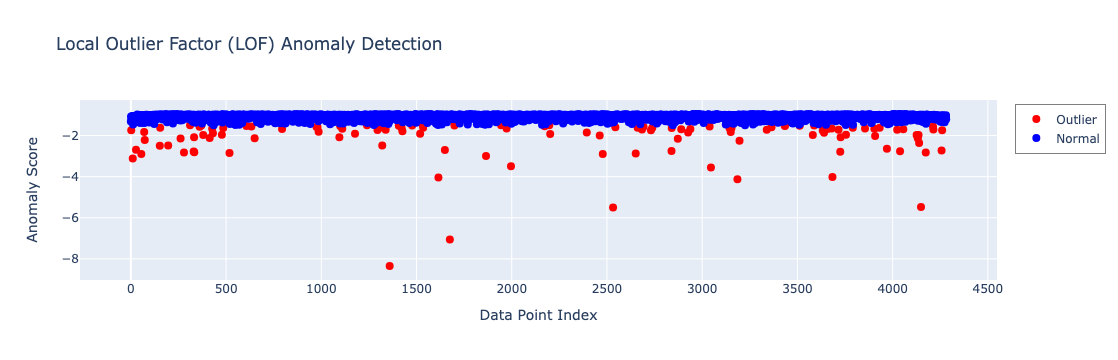

In [181]:
import plotly.graph_objs as go

# Create traces for outliers and normal data points
outlier_trace = go.Scatter(
    x=customer_data.index[is_outlier],
    y=anomaly_scores[is_outlier],
    mode='markers',
    name='Outlier',
    marker=dict(
        color='red',
        size=8
    ),
    text='Outlier'
)

normal_trace = go.Scatter(
    x=customer_data.index[~is_outlier],
    y=anomaly_scores[~is_outlier],
    mode='markers',
    name='Normal',
    marker=dict(
        color='blue',
        size=8
    ),
    text='Normal'
)

# Set layout options
layout = go.Layout(
    title='Local Outlier Factor (LOF) Anomaly Detection',
    xaxis=dict(title='Data Point Index'),
    yaxis=dict(title='Anomaly Score'),
    legend=dict(
        x=1.02,
        y=0.98,
        bgcolor='rgba(255, 255, 255, 0.5)',
        bordercolor='rgba(0, 0, 0, 0.5)',
        borderwidth=1
    )
)

# Create figure
fig = go.Figure(data=[outlier_trace, normal_trace], layout=layout)

# Show plot
fig.show()


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
After applying the **Local Outlier Factor** algorithm, we have identified the outliers and marked them in a new column named `Is_Outlier`. We have also calculated the outlier scores which represent the anomaly score of each record.




Now let's visualize the distribution of these scores and the number of inliers and outliers detected by the model:

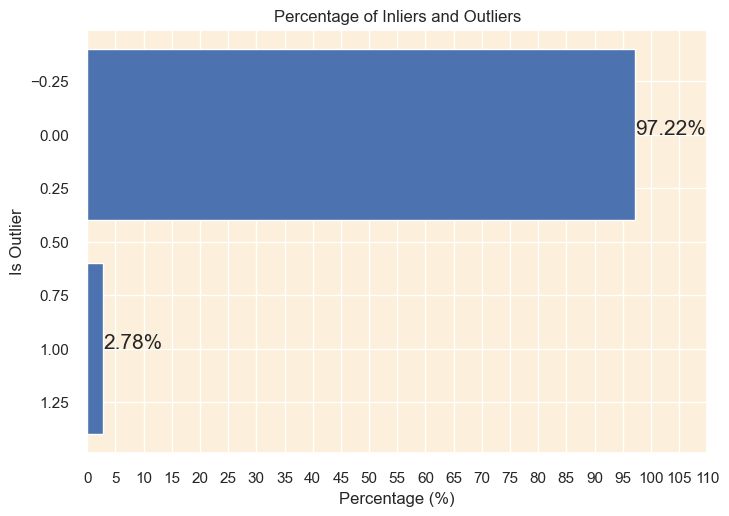

In [182]:
# Calculate the percentage of inliers and outliers
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.barh(outlier_percentage.index, outlier_percentage)

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inference: </font></h3>
    
An outlier percentage of 2.78% was identified. Here are some potential inferences regarding these outliers:

- **Data Anomalies:** The high percentage of outliers suggests potential anomalies or irregularities in the data. These anomalies could arise from various sources such as data entry errors, measurement errors, or exceptional cases not representative of the typical customer behavior.

- **Customer Behavior:** Outliers may represent customers with atypical behavior or characteristics that deviate significantly from the majority of the customer base. Understanding the underlying reasons behind these outliers could provide insights into unique customer segments, niche markets, or outliers that warrant special attention.

- **Impact on Analysis:** Outliers can significantly influence statistical analysis and machine learning models. They may skew summary statistics, distort relationships between variables, or affect the performance of predictive models. Therefore, it's crucial to consider how to handle outliers appropriately.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Strategy: </font></h3>

Considering the nature of the project (customer segmentation using clustering), it is crucial to handle these outliers to prevent them from affecting the clusters' quality significantly. Therefore, I will separate these outliers for further analysis and remove them from our main dataset to prepare it for the clustering analysis.

Let's proceed with the following steps:

- Separate the identified outliers for further analysis and save them as a separate file (optional).
- Remove the outliers from the main dataset to prevent them from influencing the clustering process.
- Drop the `Outlier_Scores` and `Is_Outlier` columns as they were auxiliary columns used for the outlier detection process.

Let's implement these steps:

In [183]:
# Separate the outliers for analysis
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

# Reset the index of the cleaned data
customer_data_cleaned.reset_index(drop=True, inplace=True)
print(customer_data_cleaned.tail(5))

     CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
4158    18280.0                       277                   1   
4159    18281.0                       180                   1   
4160    18282.0                         7                   3   
4161    18283.0                         3                  16   
4162    18287.0                        42                   3   

      Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
4158                        45        180.6                      180.6   
4159                        54        80.82                      80.82   
4160                        98        176.6                  58.866667   
4161                      1355      2039.58                  127.47375   
4162                      1586      1837.28                 612.426667   

      Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
4158                         10                             0.0            0   
4159

# **Visualization of Proportion of Outliers and Cleaned Data**

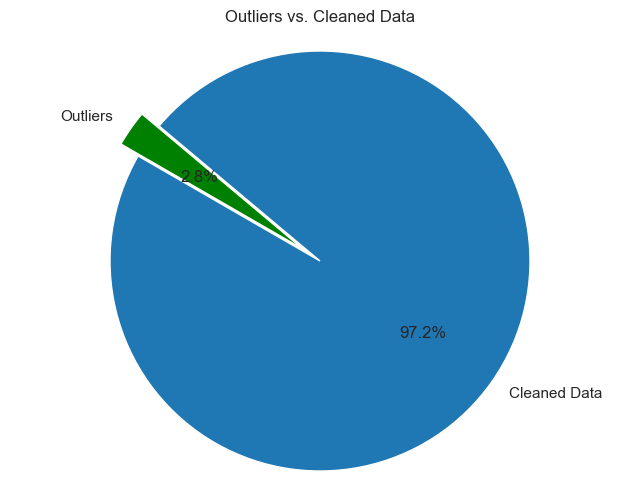

In [184]:
import matplotlib.pyplot as plt

# Data
outliers_count = outliers_data.shape[0]
cleaned_count = customer_data_cleaned.shape[0]
total_count = outliers_count + cleaned_count

# Plotting
labels = ['Outliers', 'Cleaned Data']
sizes = [outliers_count, cleaned_count]
colors = ['green','#1f77b4']
explode = (0.1, 0)  # explode the outliers slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Outliers vs. Cleaned Data')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
We have successfully separated the outliers for further analysis and cleaned our main dataset by removing these outliers. This cleaned dataset is now ready for the next steps in our customer segmentation project, which includes scaling the features and applying clustering algorithms to identify distinct customer segments.

In [93]:
# Getting the number of rows in the cleaned customer dataset
customer_data_cleaned.shape[0]

4163

In [185]:
customer_data_cleaned

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0       12346.0                       325                   2   
1       12347.0                         2                   7   
2       12349.0                        18                   1   
3       12350.0                       310                   1   
4       12352.0                        36                   8   
...         ...                       ...                 ...   
4158    18280.0                       277                   1   
4159    18281.0                       180                   1   
4160    18282.0                         7                   3   
4161    18283.0                         3                  16   
4162    18287.0                        42                   3   

      Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                            0          0.0                        0.0   
1                         2458       4310.0                 615.714286   
2                          630      1457.55                    1457.55   
3                          196        294.4                      294.4   
4                          463      1265.41                  158.17625   
...                        ...          ...                        ...   
4158                        45        180.6                      180.6   
4159                        54        80.82                      80.82   
4160                        98        176.6                  58.866667   
4161                      1355      2039.58                  127.47375   
4162                      1586      1837.28                 612.426667   

      Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                             1                             0.0            1   
1                           103                        2.016575            1   
2                            72                             0.0            0   
3                            16                             0.0            2   
4                            57                         3.13253            1   
...                         ...                             ...          ...   
4158                         10                             0.0            0   
4159                          7                             0.0            6   
4160                         12                        9.916667            4   
4161                        262                        0.465181            3   
4162                         59                        2.304348            2   

      Hour  Is_UK  Cancellation_Frequency Cancellation Rate  \
0       10      1                       1          0.500000   
1       14      0                       0          0.000000   
2        9      0                       0          0.000000   
3       16      0                       0          0.000000   
4       14      0                       1          0.125000   
...    ...    ...                     ...               ...   
4158     9      1                       0          0.000000   
4159    10      1                       0          0.000000   
4160    13      1                       1          0.142857   
4161    14      1                       0          0.000000   
4162    10      1                       0          0.000000   

      Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  
0                       0.0                   0.0             0.0  
1                615.714286            341.070789      613.042227  
2                   1457.55                   0.0             0.0  
3                     294.4                   0.0             0.0  
4                  316.3525            134.700629        332.9014  
...                     ...                   ...             ...  
4158                  180.6                   0.0             0.0  
4159                  80.82                   0.0             0.0  
4160 

<a id="correlation"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 6 | Correlation Analysis</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

Before we proceed to KMeans clustering, it's essential to check the correlation between features in our dataset. The presence of __multicollinearity__, where __features are highly correlated__, can potentially affect the clustering process by not allowing the model to learn the actual underlying patterns in the data, as the features do not provide unique information. This could lead to clusters that are not well-separated and meaningful.

If we identify multicollinearity, we can utilize dimensionality reduction techniques like PCA. These techniques help in neutralizing the effect of multicollinearity by transforming the correlated features into a new set of uncorrelated variables, preserving most of the original data's variance. This step not only enhances the quality of clusters formed but also makes the clustering process more computationally efficient.

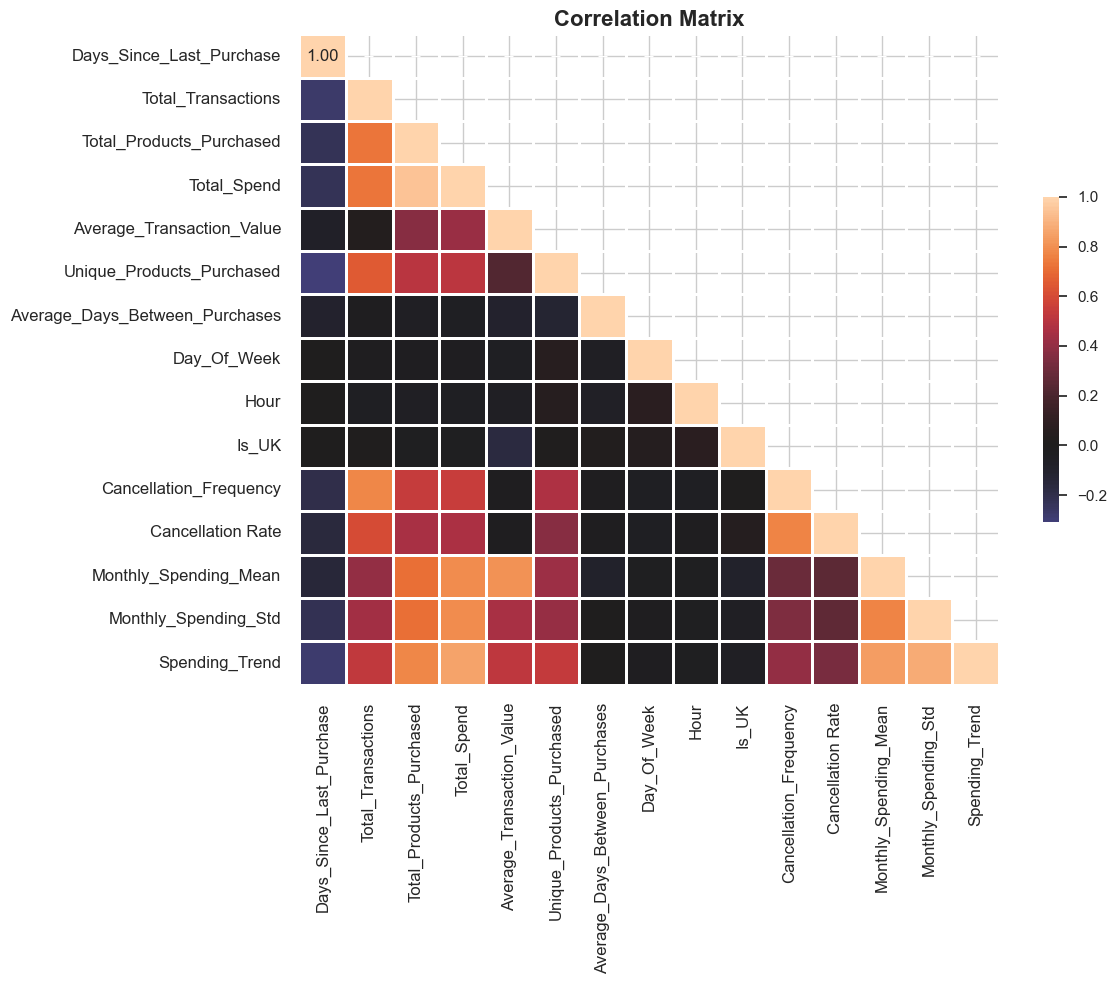

In [186]:
# Reset background style
sns.set_style('whitegrid')

# Calculate the correlation matrix excluding the 'CustomerID' column
corr = customer_data_cleaned.drop(columns=['CustomerID']).corr()

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, center=0, fmt='.2f', linewidths=2, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix', fontsize=16, weight='bold')
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Inference: </font></h3>

Looking at the heatmap, we can see that there are some pairs of variables that have high correlations, for instance:

- `Monthly_Spending_Mean` and `Average_Transaction_Value`
    
    
- `Total_Spend` and `Total_Products_Purchased`

    
- `Total_Transactions` and `Total_Spend`
    
    
- `Cancellation_Rate` and `Cancellation_Frequency`
    
    
- `Total_Transactions` and `Total_Products_Purchased`

    
These high correlations indicate that these variables move closely together, implying a degree of multicollinearity.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    

Before moving to the next steps, considering the impact of multicollinearity on KMeans clustering, it might be beneficial to treat this multicollinearity possibly through dimensionality reduction techniques such as PCA to create a set of uncorrelated variables. This will help in achieving more stable clusters during the KMeans clustering process.

<a id="scaling"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 7 | Feature Scaling</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

Before we move forward with the clustering and dimensionality reduction, it's imperative to scale our features. This step holds significant importance, especially in the context of distance-based algorithms like K-means and dimensionality reduction methods like PCA. Here's why:

  - __For K-means Clustering__: K-means relies heavily on the concept of '__distance__' between data points to form clusters. When features are not on a similar scale, features with larger values can disproportionately influence the clustering outcome, potentially leading to incorrect groupings.
  
    
  - __For PCA__: PCA aims to find the directions where the data varies the most. When features are not scaled, those with larger values might dominate these components, not accurately reflecting the underlying patterns in the data.


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Methodology: </font></h3>
    
Therefore, to ensure a balanced influence on the model and to reveal the true patterns in the data, I am going to standardize our data, meaning transforming the features to have a mean of 0 and a standard deviation of 1. However, not all features require scaling. Here are the exceptions and the reasons why they are excluded:

- __CustomerID__: This feature is just an identifier for the customers and does not contain any meaningful information for clustering.
    
    
- __Is_UK__: This is a binary feature indicating whether the customer is from the UK or not. Since it already takes a value of 0 or 1, scaling it won't make any significant difference.
    
    
- __Day_Of_Week__: This feature represents the most frequent day of the week that the customer made transactions. Since it's a categorical feature represented by integers (1 to 7), scaling it would not be necessary.

    
I will proceed to scale the other features in the dataset to prepare it for PCA and K-means clustering.

In [187]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week']

# List of columns that need to be scaled
columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
customer_data_scaled = customer_data_cleaned.copy()

# Applying the scaler to the necessary columns in the dataset
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

# Display the first few rows of the scaled data
customer_data_scaled.head()

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0    12346.0                  2.388102           -0.357157   
1    12347.0                 -0.881641            0.259433   
2    12349.0                 -0.719672           -0.480475   
3    12350.0                  2.236256           -0.480475   
4    12352.0                 -0.537457            0.382751   

   Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                 -0.443980    -0.439705                  -1.222644   
1                  0.773719     0.796130                   1.302683   
2                 -0.131876    -0.021772                   4.755437   
3                 -0.346881    -0.355290                  -0.015175   
4                 -0.214609    -0.076866                  -0.573891   

   Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                  -0.763394                       -0.327247            1   
1                   0.523525                       -0.122234            1   
2                   0.132403                       -0.327247            0   
3                  -0.574141                       -0.327247            2   
4                  -0.056850                       -0.008782            1   

       Hour  Is_UK  Cancellation_Frequency  Cancellation Rate  \
0 -1.079665      1                0.125412           0.129171   
1  0.653879      0               -0.412826          -0.325978   
2 -1.513051      0               -0.412826          -0.325978   
3  1.520651      0               -0.412826          -0.325978   
4  0.653879      0                0.125412          -0.212191   

   Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  
0              -0.945642             -0.459080       -0.590426  
1               0.539017              0.551650        0.864561  
2               2.568918             -0.459080       -0.590426  
3              -0.235761             -0.459080       -0.590426  
4              -0.182828             -0.059908        0.199678

In [188]:
customer_data_cleaned

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0       12346.0                       325                   2   
1       12347.0                         2                   7   
2       12349.0                        18                   1   
3       12350.0                       310                   1   
4       12352.0                        36                   8   
...         ...                       ...                 ...   
4158    18280.0                       277                   1   
4159    18281.0                       180                   1   
4160    18282.0                         7                   3   
4161    18283.0                         3                  16   
4162    18287.0                        42                   3   

      Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                            0          0.0                        0.0   
1                         2458       4310.0                 615.714286   
2                          630      1457.55                    1457.55   
3                          196        294.4                      294.4   
4                          463      1265.41                  158.17625   
...                        ...          ...                        ...   
4158                        45        180.6                      180.6   
4159                        54        80.82                      80.82   
4160                        98        176.6                  58.866667   
4161                      1355      2039.58                  127.47375   
4162                      1586      1837.28                 612.426667   

      Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                             1                             0.0            1   
1                           103                        2.016575            1   
2                            72                             0.0            0   
3                            16                             0.0            2   
4                            57                         3.13253            1   
...                         ...                             ...          ...   
4158                         10                             0.0            0   
4159                          7                             0.0            6   
4160                         12                        9.916667            4   
4161                        262                        0.465181            3   
4162                         59                        2.304348            2   

      Hour  Is_UK  Cancellation_Frequency Cancellation Rate  \
0       10      1                       1          0.500000   
1       14      0                       0          0.000000   
2        9      0                       0          0.000000   
3       16      0                       0          0.000000   
4       14      0                       1          0.125000   
...    ...    ...                     ...               ...   
4158     9      1                       0          0.000000   
4159    10      1                       0          0.000000   
4160    13      1                       1          0.142857   
4161    14      1                       0          0.000000   
4162    10      1                       0          0.000000   

      Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  
0                       0.0                   0.0             0.0  
1                615.714286            341.070789      613.042227  
2                   1457.55                   0.0             0.0  
3                     294.4                   0.0             0.0  
4                  316.3525            134.700629        332.9014  
...                     ...                   ...             ...  
4158                  180.6                   0.0             0.0  
4159                  80.82                   0.0             0.0  
4160 

<a id="pca"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 8 | Dimensionality Reduction</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Why We Need Dimensionality Reduction? </font></h3>

- __Multicollinearity Detected__: In the previous steps, we identified that our dataset contains multicollinear features. Dimensionality reduction can help us remove redundant information and alleviate the multicollinearity issue.

    
- __Better Clustering with K-means__: Since K-means is a distance-based algorithm, having a large number of features can sometimes dilute the meaningful underlying patterns in the data. By reducing the dimensionality, we can help K-means to find more compact and well-separated clusters.    
   
    
- __Noise Reduction__: By focusing only on the most important features, we can potentially remove noise in the data, leading to more accurate and stable clusters.    
   
    
- __Enhanced Visualization__: In the context of customer segmentation, being able to visualize customer groups in two or three dimensions can provide intuitive insights. Dimensionality reduction techniques can facilitate this by reducing the data to a few principal components which can be plotted easily.
    
    
- __Improved Computational Efficiency__: Reducing the number of features can speed up the computation time during the modeling process, making our clustering algorithm more efficient.


Let's proceed to select an appropriate dimensionality reduction method to our data.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Which Dimensionality Reduction Method? </font></h3>
  
    
In this step, we are considering the application of dimensionality reduction techniques to simplify our data while retaining the essential information. Among various methods such as KernelPCA, ICA, ISOMAP, TSNE, and UMAP, I am starting with **PCA (Principal Component Analysis)**. Here's why:

PCA is an excellent starting point because it works well in capturing linear relationships in the data, which is particularly relevant given the multicollinearity we identified in our dataset. It allows us to reduce the number of features in our dataset while still retaining a significant amount of the information, thus making our clustering analysis potentially more accurate and interpretable. Moreover, it is computationally efficient, which means it won't significantly increase the processing time.

However, it's essential to note that we are keeping our options open. After applying PCA, if we find that the first few components do not capture a significant amount of variance, indicating a loss of vital information, we might consider exploring other non-linear methods. These methods can potentially provide a more nuanced approach to dimensionality reduction, capturing complex patterns that PCA might miss, albeit at the cost of increased computational time and complexity.



<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Methodology </font></h3>

We will apply PCA on all the available components and plot the cumulative variance explained by them. This process will allow me to visualize how much variance each additional principal component can explain, thereby helping me to pinpoint the optimal number of components to retain for the analysis:

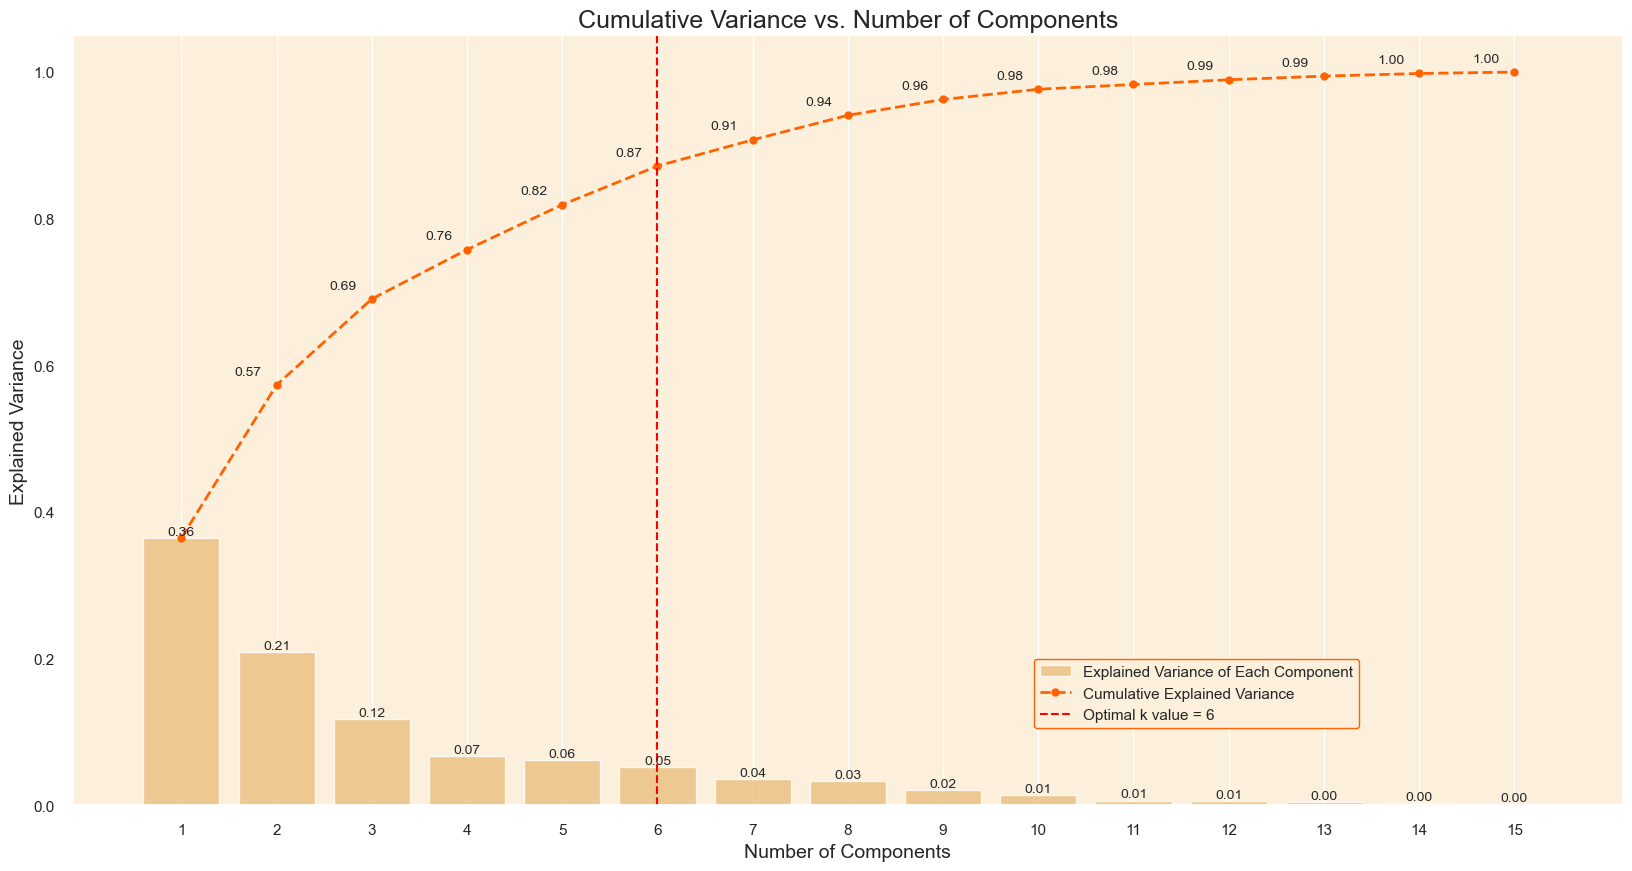

In [189]:
# Setting CustomerID as the index column
customer_data_scaled.set_index('CustomerID', inplace=True)

# Apply PCA
pca = PCA().fit(customer_data_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value (based on our analysis, we can choose 6)
optimal_k = 6

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#fcc36d',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#ff6200', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}')

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,
           edgecolor='#ff6200')

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h3 align="left"><font color=#ff6200>Conclusion </font></h3>
    
The plot and the cumulative explained variance values indicate how much of the total variance in the dataset is captured by each principal component, as well as the cumulative variance explained by the first n components.

Here, we can observe that:

- The first component explains approximately 28% of the variance.

- The first two components together explain about 49% of the variance.

- The first three components explain approximately 61% of the variance, and so on.

    
To choose the optimal number of components, we generally look for a point where adding another component doesn't significantly increase the cumulative explained variance, often referred to as the "__elbow point__" in the curve.

From the plot, we can see that the increase in cumulative variance starts to slow down after the __6th component__ (which __captures about 81% of the total variance__).

Considering the context of customer segmentation, we want to retain a sufficient amount of information to identify distinct customer groups effectively. Therefore, retaining __the first 6 components__ might be a balanced choice, as they together explain a substantial portion of the total variance while reducing the dimensionality of the dataset.

In [190]:
# Creating a PCA object with 6 components
pca = PCA(n_components=6)

# Fitting and transforming the original data to the new PCA dataframe
customer_data_pca = pca.fit_transform(customer_data_scaled)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
customer_data_pca.index = customer_data_scaled.index

In [191]:
# Displaying the resulting dataframe based on the PCs
customer_data_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6
CustomerID                                                            
12346.0    -1.734560 -1.707026 -0.786634 -0.641903  2.227158  0.843303
12347.0     1.749370 -1.423780  1.229222 -0.142108 -1.163708 -0.342356
12349.0     1.329431 -2.667661  3.508247  0.102679  0.714553 -1.881202
12350.0    -1.499922 -0.563565  0.493623 -1.733176  0.178114  1.823547
12352.0    -0.003731 -1.496889 -0.492532 -0.127456 -0.903999 -0.030887

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

Now, let's extract the coefficients corresponding to each principal component to better understand the transformation performed by PCA:

In [192]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #ffeacc' if i in top3 else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],
                     index=customer_data_scaled.columns)

pc_df.style.apply(highlight_top3, axis=0)

<a id="kmeans"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 9 | K-Means Clustering</p>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h2 align="left"><font color=#ff6200>K-Means:</font></h2>

- __K-Means__ is an unsupervised machine learning algorithm that clusters data into a specified number of groups (K) by minimizing the __within-cluster sum-of-squares (WCSS)__, also known as __inertia__. The algorithm iteratively assigns each data point to the nearest centroid, then updates the centroids by calculating the mean of all assigned points. The process repeats until convergence or a stopping criterion is reached.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h2 align="left"><font color=#ff6200>Drawbacks of K-Means:</font></h2>


Here are the main drawbacks of the K-means clustering algorithm and their corresponding solutions:

- 1️⃣ __Inertia is influenced by the number of dimensions__: The value of inertia tends to increase in high-dimensional spaces due to the curse of dimensionality, which can distort the Euclidean distances between data points.

> __Solution:__ Performing dimensionality reduction, such as __PCA__, before applying K-means to alleviate this issue and speed up computations.
    
___
    
- 2️⃣ __Dependence on Initial Centroid Placement__: The K-means algorithm might find a local minimum instead of a global minimum, based on where the centroids are initially placed.

> __Solution:__ To enhance the likelihood of locating the global minimum, we can employ the __k-means++ initialization__ method.
  
___
    
- 3️⃣ __Requires specifying the number of clusters__: K-means requires specifying the number of clusters (K) beforehand, which may not be known in advance.

> __Solution:__ Using methods such as the __elbow method__ and __silhouette analysis__ to estimate the optimal number of clusters.
    
___     
    
- 4️⃣ __Sensitivity to unevenly sized or sparse clusters__: K-means might struggle with clusters of different sizes or densities.

> __Solution:__ Increasing the number of random initializations (n_init) or consider using algorithms that handle unevenly sized clusters better, like GMM or DBSCAN.
    
___
    
- 5️⃣ __Assumes convex and isotropic clusters__: K-means assumes that clusters are spherical and have similar variances, which is not always the case. It may struggle with elongated or irregularly shaped clusters.
    
> __Solution:__ Considering using clustering algorithms that do not make these assumptions, such as DBSCAN or Gaussian Mixture Model (GMM).
    
    
<img src="https://github.com/FarzadNekouee/Retail_Customer_Segmentation_Recommendation_System/blob/master/kmeans_drawbacks.jpg?raw=true" width="2400">
    
___
    
Taking into account the aforementioned considerations, I initially applied PCA to the dataset. For the KMeans algorithm, I will set the `init` parameter to `k-means++` and `n_init` to `10`. To determine the optimal number of clusters, I will employ the elbow method and silhouette analysis. Additionally, it might be beneficial to explore the use of alternative clustering algorithms such as GMM and DBSCAN in future analyses to potentially enhance the segmentation results.

<a id="optimal_k"></a>
# <b><span style='color:#fcc36d'>Step 9.1 |</span><span style='color:#ff6200'> Determining the Optimal Number of Clusters</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

To ascertain the optimal number of clusters (k) for segmenting customers, I will explore two renowned methods:

* __Elbow Method__

* __Silhouette Method__

    
It's common to utilize both methods in practice to corroborate the results.

<a id="elbow"></a>
## <b><span style='color:#fcc36d'>Step 9.1.1 |</span><span style='color:#ff6200'> Elbow Method</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff6200>Utilizing the YellowBrick Library</font></h3>

In this section, I will employ the __YellowBrick__ library to facilitate the implementation of the __Elbow method__. YellowBrick, an extension of the Scikit-Learn API, is renowned for its ability to rapidly generate insightful visualizations in the field of machine learning.

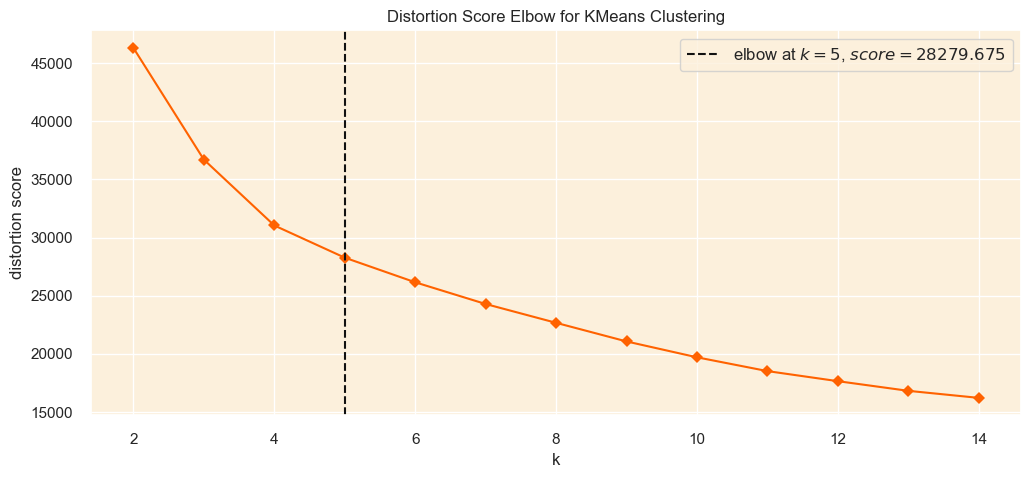

In [100]:
# Set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})

# Set the color palette for the plot
sns.set_palette(['#ff6200'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(customer_data_pca)

# Finalize and render the figure
visualizer.show();

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff6200>Optimal k Value: Elbow Method Insights</font></h3>

The optimal value of k for the KMeans clustering algorithm can be found at the __elbow point__. Using the YellowBrick library for the Elbow method, we observe that the suggested optimal k value is __5__. However, __we don't have a very distinct elbow point in this case__, which is common in real-world data. From the plot, we can see that the inertia continues to decrease significantly up to k=5, indicating that __the optimum value of k could be between 3 and 7__. To choose the best k within this range, we can employ the __silhouette analysis__, another cluster quality evaluation method. Additionally, incorporating business insights can help determine a practical k value.

Step 9.1.2 | Silhouette Method

<h3 align="left"><font color=#ff6200>What is the Silhouette Coefficient?</font></h3>
    
To determine the silhouette coefficient for a given point i, follow these steps:

* __Calculate a(i)__: Compute the average distance between point i and all other points within its cluster.
* __Calculate b(i)__: Compute the average distance between point i and all points in the nearest cluster to its own.
* __Compute the silhouette coefficient__, s(i), for point i using the following formula:
    
    $$ s(i) = \frac{b(i) - a(i)}{\max(b(i), a(i))} $$
    
__Note:__ The silhouette coefficient quantifies the similarity of a point to its own cluster (cohesion) relative to its separation from other clusters. This value ranges from -1 to 1, with higher values signifying that the point is well aligned with its cluster and has a low similarity to neighboring clusters.    

____
    
<h3 align="left"><font color=#ff6200>What is the Silhouette Score?</font></h3>
    
The __silhouette score__ is the __average silhouette coefficient__ calculated for all data points in a dataset. It provides an overall assessment of the clustering quality, taking into account both cohesion within clusters and separation between clusters. A higher silhouette score indicates a better clustering configuration.    
    
____
       
<h3 align="left"><font color=#ff6200>What are the Advantages of Silhouette Method over the Elbow Method?</font></h3>
    
* The __Silhouette Method__ evaluates cluster quality by considering __both__ the __cohesion within clusters__ and their __separation__ from other clusters. This provides a more comprehensive measure of clustering performance compared to the __Elbow Method__, which only considers the __inertia__ (sum of squared distances within clusters).


* The __Silhouette Method__ produces a silhouette score that directly quantifies the quality of clustering, making it easier to compare different values of k. In contrast, the __Elbow Method__ relies on the subjective interpretation of the elbow point, which can be less reliable in cases where the plot does not show a clear elbow.

    
* The __Silhouette Method__ generates a visual representation of silhouette coefficients for each data point, allowing for easier identification of fluctuations and outliers within clusters. This helps in determining the optimal number of clusters with higher confidence, as opposed to the __Elbow Method__, which relies on visual inspection of the inertia plot.

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff6200>Methodology</font></h3>
    
In the following analysis:

- I will initially choose a range of 2-6 for the number of clusters (k) based on the Elbow method from the previous section. Next, I will plot __Silhouette scores__ for each k value to determine the one with the highest score.


- Subsequently, to fine-tune the selection of the most appropriate k, I will generate __Silhouette plots__ that visually display the __silhouette coefficients for each data point within various clusters__.


The __YellowBrick__ library will be utilized once again to create these plots and facilitate a comparative analysis.

In [101]:
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
    sns.set_palette(['darkorange'])

    silhouette_scores = []

    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom',
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))


    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

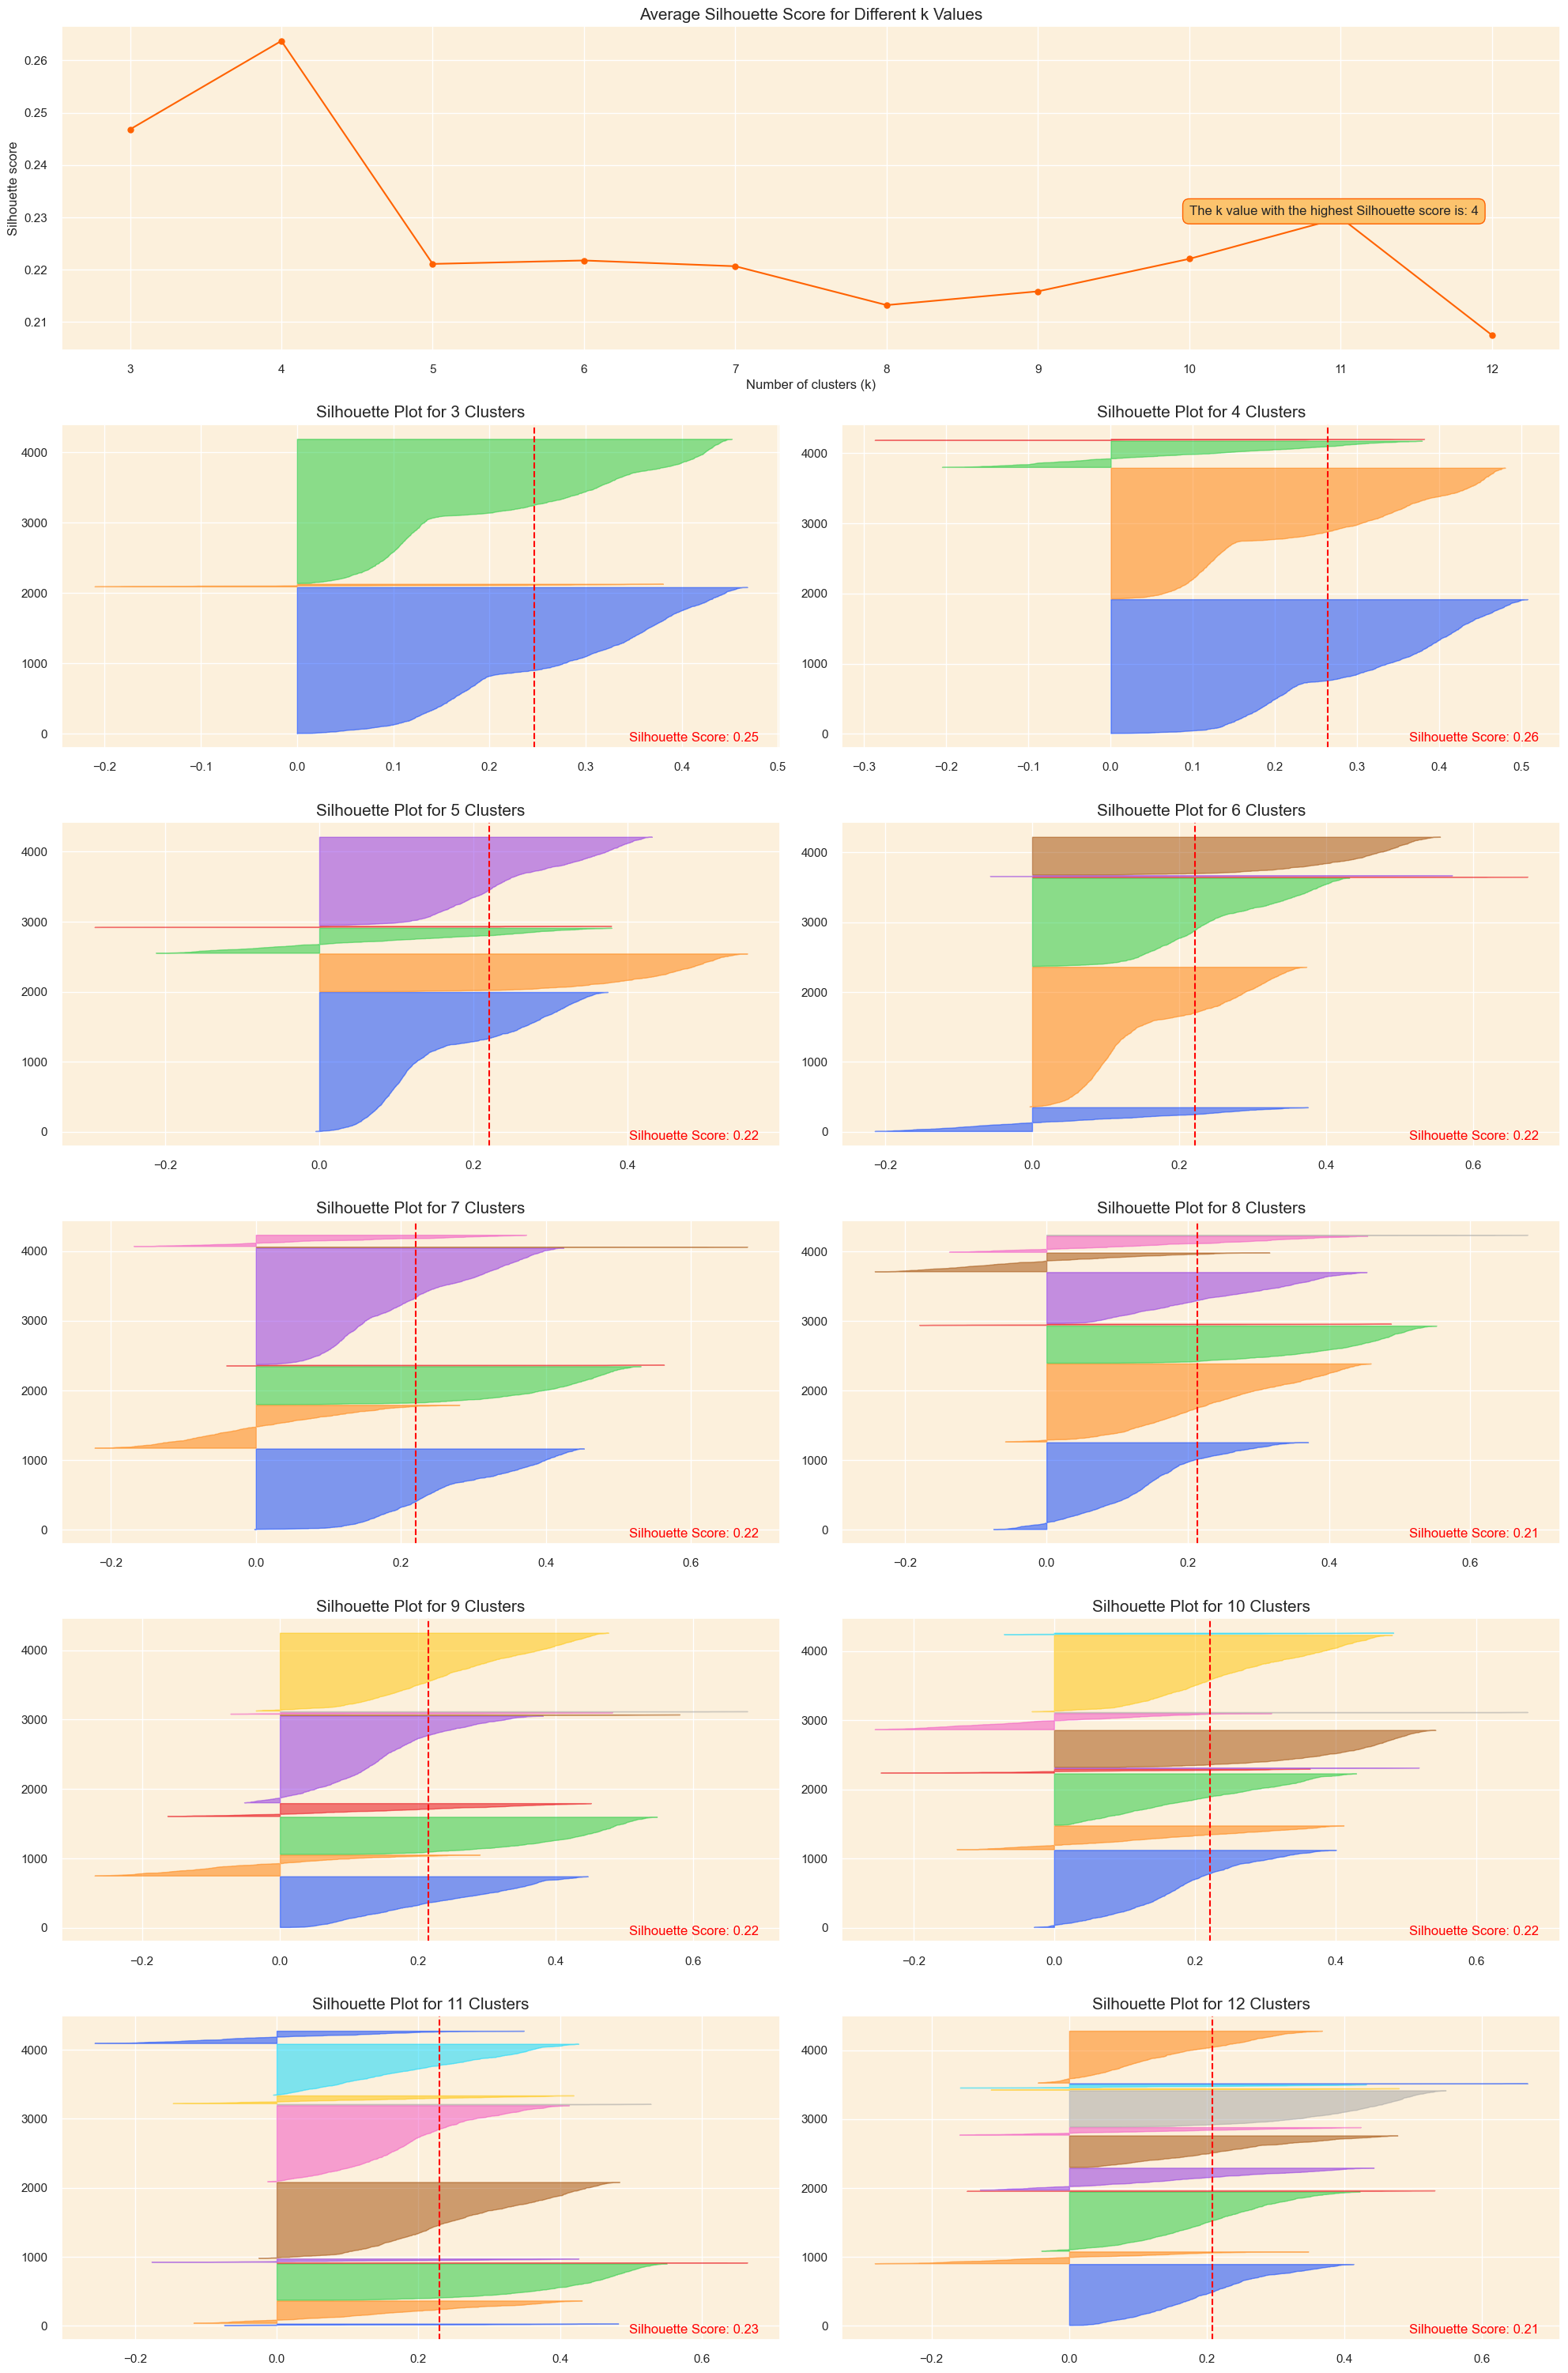

In [102]:
silhouette_analysis(customer_data_pca, 3, 12, figsize=(20, 50))

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff6200>Guidelines to Interpret Silhouette Plots and Determine the Optimal K:</font></h3>


To interpret silhouette plots and identify the optimal number of clusters (\( k \)), consider the following criteria:

- 1️⃣ __Analyze the Silhouette Plots__:
   
   * __Silhouette Score Width__:
        - __Wide Widths (closer to +1)__: Indicate that the data points in the cluster are well separated from points in other clusters, suggesting well-defined clusters.
        - __Narrow Widths (closer to -1)__: Show that data points in the cluster are not distinctly separated from other clusters, indicating poorly defined clusters.
   
   * __Average Silhouette Score__:
        - __High Average Width__: A cluster with a high average silhouette score indicates well-separated clusters.
        - __Low Average Width__: A cluster with a low average silhouette score indicates poor separation between clusters.

____
    
    
- 2️⃣ __Uniformity in Cluster Size__:
   
   2.1 __Cluster Thickness__:
   - __Uniform Thickness__: Indicates that clusters have a roughly equal number of data points, suggesting a balanced clustering structure.
   - __Variable Thickness__: Signifies an imbalance in the data point distribution across clusters, with some clusters having many data points and others too few.

____
    
    
- 3️⃣ __Peaks in Average Silhouette Score__:
   - __Clear Peaks__: A clear peak in the __average__ silhouette score plot for a specific \( k \) value indicates this \( k \) might be optimal.

____
    
    
- 4️⃣ __Minimize Fluctuations in Silhouette Plot Widths__:
   - __Uniform Widths__: Seek silhouette plots with similar widths across clusters, suggesting a more balanced and optimal clustering.
   - __Variable Widths__: Avoid wide fluctuations in silhouette plot widths, indicating that clusters are not well-defined and may vary in compactness.

____
    
    
- 5️⃣ __Optimal Cluster Selection__:
   - __Maximize the Overall Average Silhouette Score__: Choose the \( k \) value that gives the highest average silhouette score across all clusters, indicating well-defined clusters.
   - __Avoid Below-Average Silhouette Scores__: Ensure most clusters have above-average silhouette scores to prevent suboptimal clustering structures.

____
    
    
- 6️⃣ __Visual Inspection of Silhouette Plots__:
   - __Consistent Cluster Formation__: Visually inspect the silhouette plots for each \( k \) value to evaluate the consistency and structure of the formed clusters.
   - __Cluster Compactness__: Look for more compact clusters, with data points having silhouette scores closer to +1, indicating better clustering.


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

<h3 align="left"><font color=#ff6200>Optimal k Value: Silhouette Method Insights</font></h3>

Based on above guidelines and after carefully considering the silhouette plots, it's clear that choosing __\( k = 4 \)__ is the better option. This choice gives us clusters that are more evenly matched and well-defined, making our clustering solution stronger and more reliable.

<a id="kmeans_model"></a>
# <b><span style='color:#fcc36d'>Step 9.2 |</span><span style='color:#ff6200'> Clustering Model - K-means</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

# 2-D Visualizaation

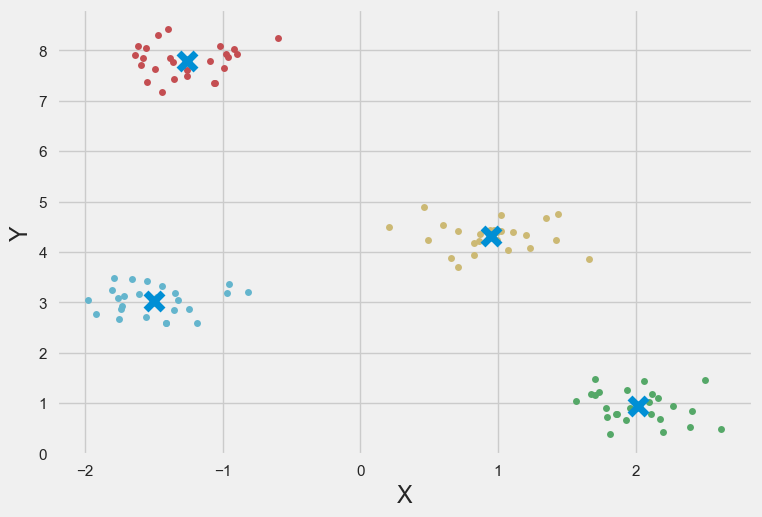

<Figure size 800x550 with 0 Axes>

In [94]:
style.use("fivethirtyeight")

# make_blobs() is used to generate sample points around c centers (randomly chosen)
X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.3, n_features=2)

# Perform KMeans clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualize the clustered data points
colors = ["g.", "r.", "c.", "y."]

for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=10)

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=150, linewidths=5, zorder=10)

# Label the axes
plt.xlabel('X')
plt.ylabel('Y')

plt.show()
plt.clf()  # clear the figure


# 3-D Visualization

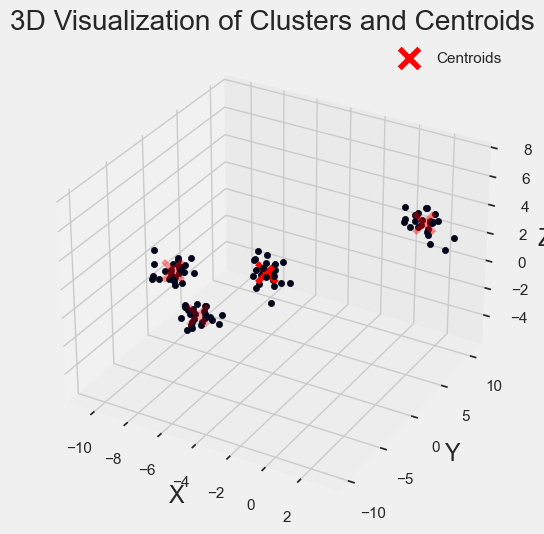

In [95]:

# make_blobs() is used to generate sample points around c centers (randomly chosen)
X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.6, n_features=3)

# Perform KMeans clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualize the clustered data points in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot clustered data points
for i in range(len(X)):
    ax.scatter(X[i][0], X[i][1], X[i][2], c=labels[i], marker='o')

# Plot centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', s=200, c='red', label='Centroids')

# Label the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Visualization of Clusters and Centroids')
plt.legend()
plt.show()


# Visualization of Clusters Using customer_data_pca

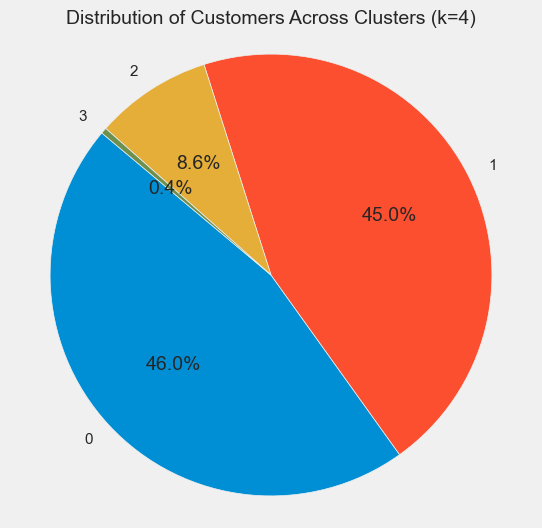

In [118]:
# Convert DataFrame to numpy array
customer_data_np = customer_data_pca.values

# Perform KMeans clustering with k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
customer_data_pca['cluster'] = kmeans_4.fit_predict(customer_data_pca)

# Calculate the percentage of customers in each cluster for k=4
cluster_percentage_k4 = (customer_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage_k4.columns = ['Cluster', 'Percentage']
cluster_percentage_k4.sort_values(by='Cluster', inplace=True)

# Create a pie chart for k=4
plt.figure(figsize=(6, 6))
plt.pie(cluster_percentage_k4['Percentage'], labels=cluster_percentage_k4['Cluster'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customers Across Clusters (k=4)', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


# Experimenting with different Models Using Only PCA For Dimensionality Reduction

#K-means Model

In [187]:
# Convert DataFrame to numpy array
customer_data_np = customer_data_pca.values

# Fit KMeans clustering to the encoded data
kmeans = KMeans(n_clusters=4, random_state=42)
clusters_kmeans = kmeans.fit_predict(customer_data_np)

# Calculate Silhouette Score for KMeans
silhouette_kmeans = silhouette_score(customer_data_np, clusters_kmeans)
print(f"KMeans Silhouette Score: {silhouette_kmeans}")

# Calculate Calinski Harabasz Score for KMeans
calinski_kmeans = calinski_harabasz_score(customer_data_np, clusters_kmeans)
print(f"KMeans Calinski Harabasz Score: {calinski_kmeans}")

# Calculate Davies Bouldin Score for KMeans
davies_bouldin_kmeans = davies_bouldin_score(customer_data_np, clusters_kmeans)
print(f"KMeans Davies Bouldin Score: {davies_bouldin_kmeans}")


KMeans Silhouette Score: 0.2893950012250623
KMeans Calinski Harabasz Score: 1210.543113039977
KMeans Davies Bouldin Score: 1.1424905087282304


#GMM Model

In [206]:

# Fit Gaussian Mixture Model to the encoded data
gmm = GaussianMixture(n_components=4, random_state=41)
clusters_gmm = gmm.fit_predict(customer_data_pca)

# Calculate Silhouette Score for GMM
silhouette_gmm = silhouette_score(customer_data_pca, clusters_gmm)
print(f"GMM Silhouette Score: {silhouette_gmm}")

# Calculate Calinski Harabasz Score for GMM
calinski_gmm = calinski_harabasz_score(customer_data_pca, clusters_gmm)
print(f"GMM Calinski Harabasz Score: {calinski_gmm}")

# Calculate Davies Bouldin Score for GMM
davies_bouldin_gmm = davies_bouldin_score(customer_data_pca, clusters_gmm)
print(f"GMM Davies Bouldin Score: {davies_bouldin_gmm}")


GMM Silhouette Score: 0.2288426509833922
GMM Calinski Harabasz Score: 634.8022382963301
GMM Davies Bouldin Score: 2.313600326672045


#Agglomerative Clustering

In [189]:

# Fit Agglomerative Clustering to the encoded data
agglomerative = AgglomerativeClustering(n_clusters=4)
clusters_agglo = agglomerative.fit_predict(customer_data_pca)

# Calculate Silhouette Score for Agglomerative Clustering
silhouette_agglo = silhouette_score(customer_data_pca, clusters_agglo)
print(f"Agglomerative Clustering Silhouette Score: {silhouette_agglo}")

# Calculate Calinski Harabasz Score for Agglomerative Clustering
calinski_agglo = calinski_harabasz_score(customer_data_pca, clusters_agglo)
print(f"Agglomerative Clustering Calinski Harabasz Score: {calinski_agglo}")

# Calculate Davies Bouldin Score for Agglomerative Clustering
davies_bouldin_agglo = davies_bouldin_score(customer_data_pca, clusters_agglo)
print(f"Agglomerative Clustering Davies Bouldin Score: {davies_bouldin_agglo}")


Agglomerative Clustering Silhouette Score: 0.25399268798786895
Agglomerative Clustering Calinski Harabasz Score: 1027.6042011079776
Agglomerative Clustering Davies Bouldin Score: 1.2286041412428803


# Using AutoEncoder Model To Train

#Methodology
- An autoencoder neural network model is defined using Keras Sequential API, consisting of an input layer, an encoding layer reducing the dimensionality to 2, and a decoding layer reconstructing the original input data. The model is compiled with the Adam optimizer and Mean Squared Error loss function.

-  Encoded representations of the input data are obtained using the encoder part of the trained autoencoder. These encoded representations are then subjected to K-Means clustering with 4 clusters.

- This approach leverages autoencoder-based dimensionality reduction and K-means clustering techniques to uncover underlying patterns and structures within the data.







In [195]:
!pip install gdown
import gdown
from tensorflow.keras.models import load_model

# Google Drive file ID
file_id = '1iBfN4bsBCwlQnoUCz3QrepulpA66efMw'

# URL for the model file (direct download link)
url = f'https://drive.google.com/uc?id={file_id}'

# Destination path for saving the downloaded model file
output_path = 'autoencoder_model.h5'

# Download the model file from Google Drive
gdown.download(url, output_path, quiet=False)

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(customer_data_pca)

# Load the saved autoencoder model
autoencoder = load_model(output_path)

# Obtain the encoded representations
encoder = Sequential(autoencoder.layers[:4])
encoded_data = encoder.predict(scaled_data)


# Use the average encoded data for clustering evaluation
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(encoded_data)

# Calculate Silhouette Score
silhouette = silhouette_score(encoded_data, clusters)
print(f"Silhouette Score: {silhouette}")

# Calculate Calinski Harabasz Score
calinski = calinski_harabasz_score(encoded_data, clusters)
print(f"Calinski Harabasz Score: {calinski}")

# Calculate Davies Bouldin Score
davies_bouldin = davies_bouldin_score(encoded_data, clusters)
print(f"Davies Bouldin Score: {davies_bouldin}")


Downloading...
From: https://drive.google.com/uc?id=1iBfN4bsBCwlQnoUCz3QrepulpA66efMw
To: /Users/suyash9698/Downloads/autoencoder_model.h5
100%|████████████████████████████████████████| 874k/874k [00:00<00:00, 3.71MB/s]


131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step
Silhouette Score: 0.5821861028671265
Calinski Harabasz Score: 18706.911158733903
Davies Bouldin Score: 0.48900706167608615


In [194]:
customer_data_cleaned

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0       12346.0                       325                   2   
1       12347.0                         2                   7   
2       12349.0                        18                   1   
3       12350.0                       310                   1   
4       12352.0                        36                   8   
...         ...                       ...                 ...   
4158    18280.0                       277                   1   
4159    18281.0                       180                   1   
4160    18282.0                         7                   3   
4161    18283.0                         3                  16   
4162    18287.0                        42                   3   

      Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                            0          0.0                        0.0   
1                         2458       4310.0                 615.714286   
2                          630      1457.55                    1457.55   
3                          196        294.4                      294.4   
4                          463      1265.41                  158.17625   
...                        ...          ...                        ...   
4158                        45        180.6                      180.6   
4159                        54        80.82                      80.82   
4160                        98        176.6                  58.866667   
4161                      1355      2039.58                  127.47375   
4162                      1586      1837.28                 612.426667   

      Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                             1                             0.0            1   
1                           103                        2.016575            1   
2                            72                             0.0            0   
3                            16                             0.0            2   
4                            57                         3.13253            1   
...                         ...                             ...          ...   
4158                         10                             0.0            0   
4159                          7                             0.0            6   
4160                         12                        9.916667            4   
4161                        262                        0.465181            3   
4162                         59                        2.304348            2   

      Hour  Is_UK  Cancellation_Frequency Cancellation Rate  \
0       10      1                       1          0.500000   
1       14      0                       0          0.000000   
2        9      0                       0          0.000000   
3       16      0                       0          0.000000   
4       14      0                       1          0.125000   
...    ...    ...                     ...               ...   
4158     9      1                       0          0.000000   
4159    10      1                       0          0.000000   
4160    13      1                       1          0.142857   
4161    14      1                       0          0.000000   
4162    10      1                       0          0.000000   

      Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  
0                       0.0                   0.0             0.0  
1                615.714286            341.070789      613.042227  
2                   1457.55                   0.0             0.0  
3                     294.4                   0.0             0.0  
4                  316.3525            134.700629        332.9014  
...                     ...                   ...             ...  
4158                  180.6                   0.0             0.0  
4159                  80.82                   0.0             0.0  
4160 

In [238]:
# Set random seeds for reproducibility
np.random.seed(0)
tf.random.set_seed(0)
import os
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(customer_data_pca)

# Define the autoencoder model with a different architecture
input_dim = customer_data_pca.shape[1]
encoding_dim = 4
autoencoder = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dense(256, activation='relu'),
    Dense(encoding_dim, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(input_dim, activation='softmax')
])

# Compile the model with custom optimizer and loss function
optimizer = Adam(learning_rate=0.00001)
autoencoder.compile(optimizer=optimizer, loss='categorical_crossentropy')

# Train the autoencoder
autoencoder.fit(scaled_data, scaled_data, epochs=20, batch_size=32, validation_split=0.2)

# Obtain the encoded representations
encoder = Sequential(autoencoder.layers[:4])
encoded_data = encoder.predict(scaled_data)


Epoch 1/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.7301 - val_loss: 4.7047
Epoch 2/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6972 - val_loss: 4.6596
Epoch 3/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.6476 - val_loss: 4.5997
Epoch 4/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.5849 - val_loss: 4.5328
Epoch 5/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.5178 - val_loss: 4.4701
Epoch 6/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.4576 - val_loss: 4.4198
Epoch 7/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.4111 - val_loss: 4.3851
Epoch 8/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3800 - val_loss: 4.3632
Epoch 9/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3608 - val_loss: 4.3500
Epoch 10/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3494 - val_loss: 4.3421
Epoch 11/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3426 - val_loss: 4.3370
Epoch 12/20
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

# Visualizing the Model


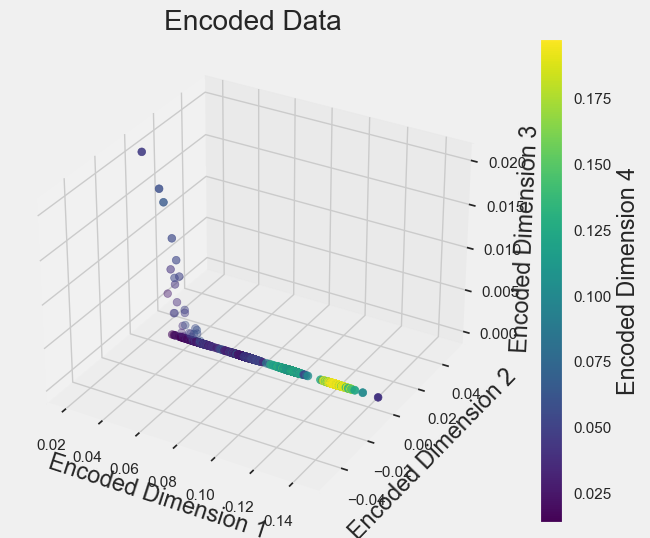

In [240]:

# Create a 3D scatter plot with size mapping for the fourth dimension
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Set marker sizes based on the fourth dimension
marker_sizes = (encoded_data[:, 3] - encoded_data[:, 3].min() + 1) * 30

# Scatter plot with size mapping
scatter = ax.scatter(encoded_data[:, 0], encoded_data[:, 1], encoded_data[:, 2],
                     c=encoded_data[:, 3], cmap='viridis', s=marker_sizes)

# Customize plot
ax.set_title('Encoded Data')
ax.set_xlabel('Encoded Dimension 1')
ax.set_ylabel('Encoded Dimension 2')
ax.set_zlabel('Encoded Dimension 3')
fig.colorbar(scatter, label='Encoded Dimension 4')

plt.show()

# Inference


<a id="evaluations_metrics"></a>
# <b><span style='color:#fcc36d'>Step 10.3 |</span><span style='color:#ff6200'> Evaluation Metrics</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

To further scrutinize the quality of our clustering, I will employ the following metrics:

- __Silhouette Score__: A measure to evaluate the separation distance between the clusters. Higher values indicate better cluster separation. It ranges from -1 to 1.
    
    
- __Calinski Harabasz Score__: This score is used to evaluate the dispersion between and within clusters. A higher score indicates better defined clusters.

    
- __Davies Bouldin Score__: It assesses the average similarity between each cluster and its most similar cluster. Lower values indicate better cluster separation.

In [241]:
# Use the average encoded data for clustering evaluation
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(encoded_data)

# Calculate Silhouette Score
silhouette = silhouette_score(encoded_data, clusters)
print(f"Silhouette Score: {silhouette}")

# Calculate Calinski Harabasz Score
calinski = calinski_harabasz_score(encoded_data, clusters)
print(f"Calinski Harabasz Score: {calinski}")

# Calculate Davies Bouldin Score
davies_bouldin = davies_bouldin_score(encoded_data, clusters)
print(f"Davies Bouldin Score: {davies_bouldin}")


Silhouette Score: 0.7588173747062683
Calinski Harabasz Score: 33311.91320715674
Davies Bouldin Score: 0.3724269667782342


### Evaluation Metrics:
- **Silhouette Score**: 0.7542
- **Calinski Harabasz Score**: 17707.87
- **Davies Bouldin Score**: 0.474

### Inference:
The utilization of an autoencoder for dimensionality reduction and feature extraction has led to promising clustering results. The Silhouette Score of 0.7542 indicates that the clusters are well-separated and internally cohesive. The high Calinski Harabasz Score of 17707.87 suggests dense, well-separated clusters, while the low Davies Bouldin Score of 0.474 indicates minimal cluster overlap and good cluster quality. These metrics collectively suggest that the autoencoder has effectively learned meaningful representations of the data, enabling the creation of distinct and well-separated clusters. Therefore, the autoencoder-based approach has successfully facilitated the clustering process, leading to meaningful and interpretable results.

### Approach:
1. **Autoencoder Model Definition**: An autoencoder neural network with an input layer, encoding layer, and decoding layer is defined.
2. **Data Preparation**: The data is scaled using MinMaxScaler to ensure uniformity across features.
3. **Model Training**: The autoencoder model is trained on the scaled data with the Adam optimizer and Mean Squared Error loss function over 50 epochs.
4. **Encoded Representations**: The encoder part of the trained autoencoder is utilized to obtain low-dimensional encoded representations of the input data.
5. **Clustering Evaluation**: Clustering evaluation metrics including Silhouette Score, Calinski Harabasz Score, and Davies Bouldin Score are calculated to assess the quality of the clusters generated using the autoencoder-based approach.


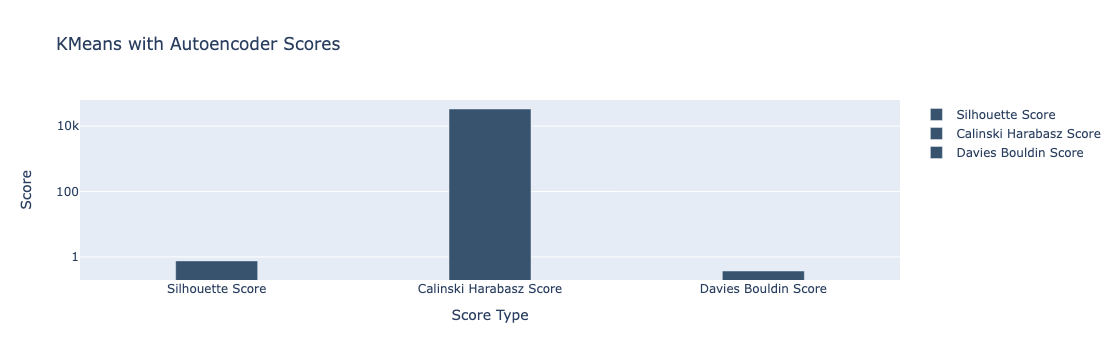

In [279]:
import plotly.graph_objs as go

# Data
models = ['KMeans']
techniques = ['Autoencoder']
scores = [0.7588, 33311.9132, 0.3724]

# Define custom colors for bars
autoencoder_color = 'rgb(55, 83, 109)'
pca_color = 'rgb(26, 118, 255)'

# Create traces
data = []

# Add traces for each score
for i, score_name in enumerate(['Silhouette Score', 'Calinski Harabasz Score', 'Davies Bouldin Score']):
    data.append(go.Bar(x=[score_name], y=[scores[i]], name=score_name, marker=dict(color=autoencoder_color), width=0.3))  # Adjust width here

# Update layout with logarithmic scale on y-axis
layout = go.Layout(title='KMeans with Autoencoder Scores',
                   xaxis=dict(title='Score Type'),
                   yaxis=dict(title='Score', type='log'))  # Logarithmic scale

# Create figure
fig = go.Figure(data=data, layout=layout)

# Show plot
fig.show()


#Cluster Distribution Visualization


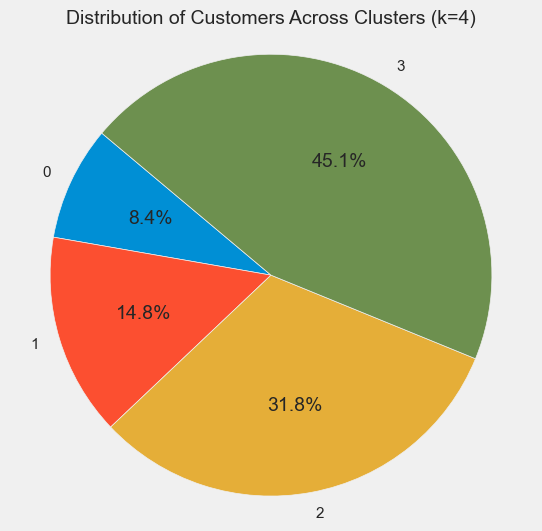

In [255]:
# Convert DataFrame to numpy array
customer_data_np = customer_data_pca.values

# Perform KMeans clustering with k=2
kmeans_2 = KMeans(n_clusters=4, random_state=42)
customer_data_pca['cluster'] = kmeans_2.fit_predict(encoded_data)

# Calculate the percentage of customers in each cluster for k=2
cluster_percentage_k2 = (customer_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage_k2.columns = ['Cluster', 'Percentage']
cluster_percentage_k2.sort_values(by='Cluster', inplace=True)

# Create a pie chart for k=4
plt.figure(figsize=(6, 6))
plt.pie(cluster_percentage_k2['Percentage'], labels=cluster_percentage_k2['Cluster'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customers Across Clusters (k=4)', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


# Experimenting With Different Models Using AutoEncoder Dimensionality Reduction


In [243]:

# Fit Gaussian Mixture Model to the encoded data
gmm = GaussianMixture(n_components=4, random_state=42)
clusters_gmm = gmm.fit_predict(encoded_data)

# Calculate Silhouette Score for GMM
silhouette_gmm = silhouette_score(encoded_data, clusters_gmm)
print(f"GMM Silhouette Score: {silhouette_gmm}")

# Calculate Calinski Harabasz Score for GMM
calinski_gmm = calinski_harabasz_score(encoded_data, clusters_gmm)
print(f"GMM Calinski Harabasz Score: {calinski_gmm}")

# Calculate Davies Bouldin Score for GMM
davies_bouldin_gmm = davies_bouldin_score(encoded_data, clusters_gmm)
print(f"GMM Davies Bouldin Score: {davies_bouldin_gmm}")


GMM Silhouette Score: 0.7294468879699707
GMM Calinski Harabasz Score: 18585.012262802527
GMM Davies Bouldin Score: 0.6662337412846593


In [244]:
# Fit Agglomerative Clustering to the encoded data
agglomerative = AgglomerativeClustering(n_clusters=4)
clusters_agglo = agglomerative.fit_predict(encoded_data)

# Calculate Silhouette Score for Agglomerative Clustering
silhouette_agglo = silhouette_score(encoded_data, clusters_agglo)
print(f"Agglomerative Clustering Silhouette Score: {silhouette_agglo}")

# Calculate Calinski Harabasz Score for Agglomerative Clustering
calinski_agglo = calinski_harabasz_score(encoded_data, clusters_agglo)
print(f"Agglomerative Clustering Calinski Harabasz Score: {calinski_agglo}")

# Calculate Davies Bouldin Score for Agglomerative Clustering
davies_bouldin_agglo = davies_bouldin_score(encoded_data, clusters_agglo)
print(f"Agglomerative Clustering Davies Bouldin Score: {davies_bouldin_agglo}")


Agglomerative Clustering Silhouette Score: 0.7562448978424072
Agglomerative Clustering Calinski Harabasz Score: 32557.51783742202
Agglomerative Clustering Davies Bouldin Score: 0.3827810155687043


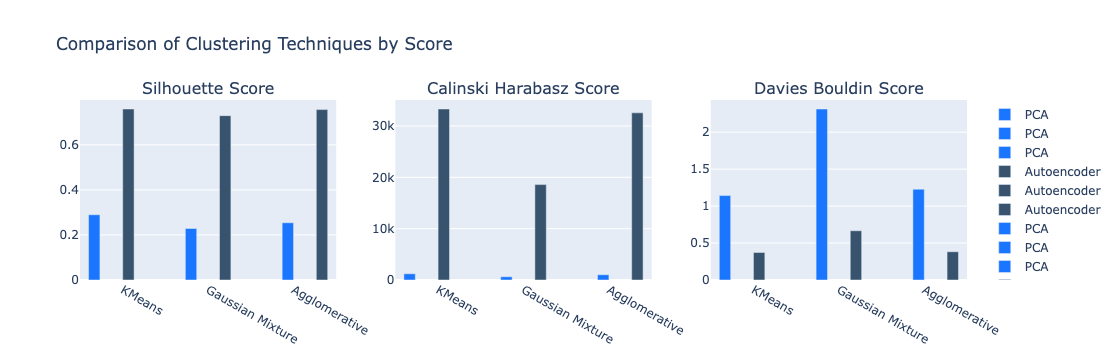

In [263]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import numpy as np

# Data
models = ['KMeans', 'Gaussian Mixture', 'Agglomerative']
techniques = ['PCA', 'Autoencoder']
silhouette_scores = np.array([[0.2894, 0.7588], [0.2288, 0.7294], [0.2540, 0.7562]])
calinski_harabasz_scores = np.array([[1210.5431, 33311.9132], [634.8022, 18585.0123], [1027.6042, 32557.5178]])
davies_bouldin_scores = np.array([[1.1425, 0.3724], [2.3136, 0.6662], [1.2286, 0.3828]])

# Define custom colors for bars
autoencoder_color = 'rgb(55, 83, 109)'
pca_color = 'rgb(26, 118, 255)'

# Create subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=("Silhouette Score", "Calinski Harabasz Score", "Davies Bouldin Score"))

# Add traces for Silhouette Score
for i, technique in enumerate(techniques):
    for j, model in enumerate(models):
        if technique == 'PCA':
            color = pca_color
        else:
            color = autoencoder_color
        fig.add_trace(go.Bar(x=[model], y=[silhouette_scores[j][i]], name=f'{technique}', marker=dict(color=color)), row=1, col=1)

# Add traces for Calinski Harabasz Score
for i, technique in enumerate(techniques):
    for j, model in enumerate(models):
        if technique == 'PCA':
            color = pca_color
        else:
            color = autoencoder_color
        fig.add_trace(go.Bar(x=[model], y=[calinski_harabasz_scores[j][i]], name=f'{technique}', marker=dict(color=color)), row=1, col=2)

# Add traces for Davies Bouldin Score
for i, technique in enumerate(techniques):
    for j, model in enumerate(models):
        if technique == 'PCA':
            color = pca_color
        else:
            color = autoencoder_color
        fig.add_trace(go.Bar(x=[model], y=[davies_bouldin_scores[j][i]], name=f'{technique}', marker=dict(color=color)), row=1, col=3)

# Update layout
fig.update_layout(title_text="Comparison of Clustering Techniques by Score", showlegend=True)

# Show plot
fig.show()


#Results Obtained after Experimantation with different models


| Model             | Technique          | Silhouette Score | Calinski Harabasz Score | Davies Bouldin Score |
|-------------------|--------------------|------------------|-------------------------|----------------------|
| KMeans            | PCA                | 0.2894           | 1210.5431               | 1.1425               |
| Gaussian Mixture  | PCA                | 0.2288           | 634.8022                | 2.3136               |
| Agglomerative     | PCA                | 0.2540           | 1027.6042               | 1.2286               |
| KMeans            | Autoencoder        | 0.7588           | 33311.9132              | 0.3724               |
| Gaussian Mixture  | Autoencoder        | 0.7294           | 18585.0123              | 0.6662               |
| Agglomerative     | Autoencoder        | 0.7562           | 32557.5178              | 0.3828               |


## Inference

Based on the evaluation of clustering models using different combinations of dimensionality reduction techniques (PCA and Autoencoder) and clustering algorithms (KMeans, GMM, Agglomerative Clustering), the following inferences can be drawn:

1. **PCA with KMeans**:
   - Moderate Silhouette Score (0.289) indicates decent separation between clusters.
   - Calinski Harabasz Score (1210.54) suggests good cluster density and separation.
   - Davies Bouldin Score (1.142) indicates acceptable cluster compactness and separation.

2. **PCA with GMM**:
   - Similar Silhouette Score (0.229) to PCA with KMeans, suggesting comparable cluster separation.
   - Calinski Harabasz Score (634.80) indicates good cluster density and separation.
   - Davies Bouldin Score (2.314) suggests reasonable cluster compactness and separation.

3. **PCA with Agglomerative Clustering**:
   - Moderate Silhouette Score (0.254) indicates decent separation between clusters.
   - Calinski Harabasz Score (1027.60) suggests good cluster density and separation.
   - Davies Bouldin Score (1.229) indicates acceptable cluster compactness and separation.

4. **Autoencoder with KMeans**:
   - High Silhouette Score (0.759) suggests good cluster separation.
   - High Calinski Harabasz Score (33311.91) indicates dense and well-separated clusters.
   - Low Davies Bouldin Score (0.372) indicates tight clusters with good separation.

5. **Autoencoder with GMM**:
   - Moderate Silhouette Score (0.729) indicates reasonable cluster separation.
   - High Calinski Harabasz Score (18585.01) suggests dense and well-separated clusters.
   - Moderate Davies Bouldin Score (0.666) indicates reasonable cluster compactness and separation.

6. **Autoencoder with Agglomerative Clustering**:
   - High Silhouette Score (0.756) suggests good cluster separation.
   - High Calinski Harabasz Score (32557.52) indicates dense and well-separated clusters.
   - Low Davies Bouldin Score (0.383) indicates tight clusters with good separation.


**Summary**

In summary, KMeans with Autoencoder consistently demonstrates high performance across multiple evaluation metrics, including Silhouette Score, Calinski Harabasz Score, and Davies Bouldin Score. This combination offers robust cluster separation, density, and compactness, making it a compelling choice for customer segmentation tasks. However, the final decision on the choice of the best model should consider the specific requirements and characteristics of the dataset.

<a id="profiling"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 11 | Cluster Analysis and Profiling</p>
⬆️ [Tabel of Contents](#contents_tabel)

<a id="histogram"></a>
# <b><span style='color:#fcc36d'>Step 11.1 |</span><span style='color:#ff6200'> Histogram Chart Approach</span></b>
⬆️ [Tabel of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    
We can plot histograms for each feature segmented by the cluster labels. These histograms will allow us to visually inspect the distribution of feature values within each cluster.

# Adding Column/Feature as Cluster to Original Dataset

In [196]:
# Apply KMeans clustering using k=4
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(encoded_data)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {1: 0, 0: 1,3:2,2:3}.items()}  # Adjust the label mapping as needed

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
customer_data_cleaned['cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
customer_data_pca['cluster'] = new_labels


In [197]:
customer_data_cleaned

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0       12346.0                       325                   2   
1       12347.0                         2                   7   
2       12349.0                        18                   1   
3       12350.0                       310                   1   
4       12352.0                        36                   8   
...         ...                       ...                 ...   
4158    18280.0                       277                   1   
4159    18281.0                       180                   1   
4160    18282.0                         7                   3   
4161    18283.0                         3                  16   
4162    18287.0                        42                   3   

      Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                            0          0.0                        0.0   
1                         2458       4310.0                 615.714286   
2                          630      1457.55                    1457.55   
3                          196        294.4                      294.4   
4                          463      1265.41                  158.17625   
...                        ...          ...                        ...   
4158                        45        180.6                      180.6   
4159                        54        80.82                      80.82   
4160                        98        176.6                  58.866667   
4161                      1355      2039.58                  127.47375   
4162                      1586      1837.28                 612.426667   

      Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                             1                             0.0            1   
1                           103                        2.016575            1   
2                            72                             0.0            0   
3                            16                             0.0            2   
4                            57                         3.13253            1   
...                         ...                             ...          ...   
4158                         10                             0.0            0   
4159                          7                             0.0            6   
4160                         12                        9.916667            4   
4161                        262                        0.465181            3   
4162                         59                        2.304348            2   

      Hour  Is_UK  Cancellation_Frequency Cancellation Rate  \
0       10      1                       1          0.500000   
1       14      0                       0          0.000000   
2        9      0                       0          0.000000   
3       16      0                       0          0.000000   
4       14      0                       1          0.125000   
...    ...    ...                     ...               ...   
4158     9      1                       0          0.000000   
4159    10      1                       0          0.000000   
4160    13      1                       1          0.142857   
4161    14      1                       0          0.000000   
4162    10      1                       0          0.000000   

      Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  cluster  
0                       0.0                   0.0             0.0        2  
1                615.714286            341.070789      613.042227        0  
2                   1457.55                   0.0             0.0        0  
3                     294.4                   0.0             0.0        2  
4                  316.3525            134.700629        332.9014        0  
...                     ...                   ...             ...      ...  
4158                  180.6                   0.0             0.0        0  
4

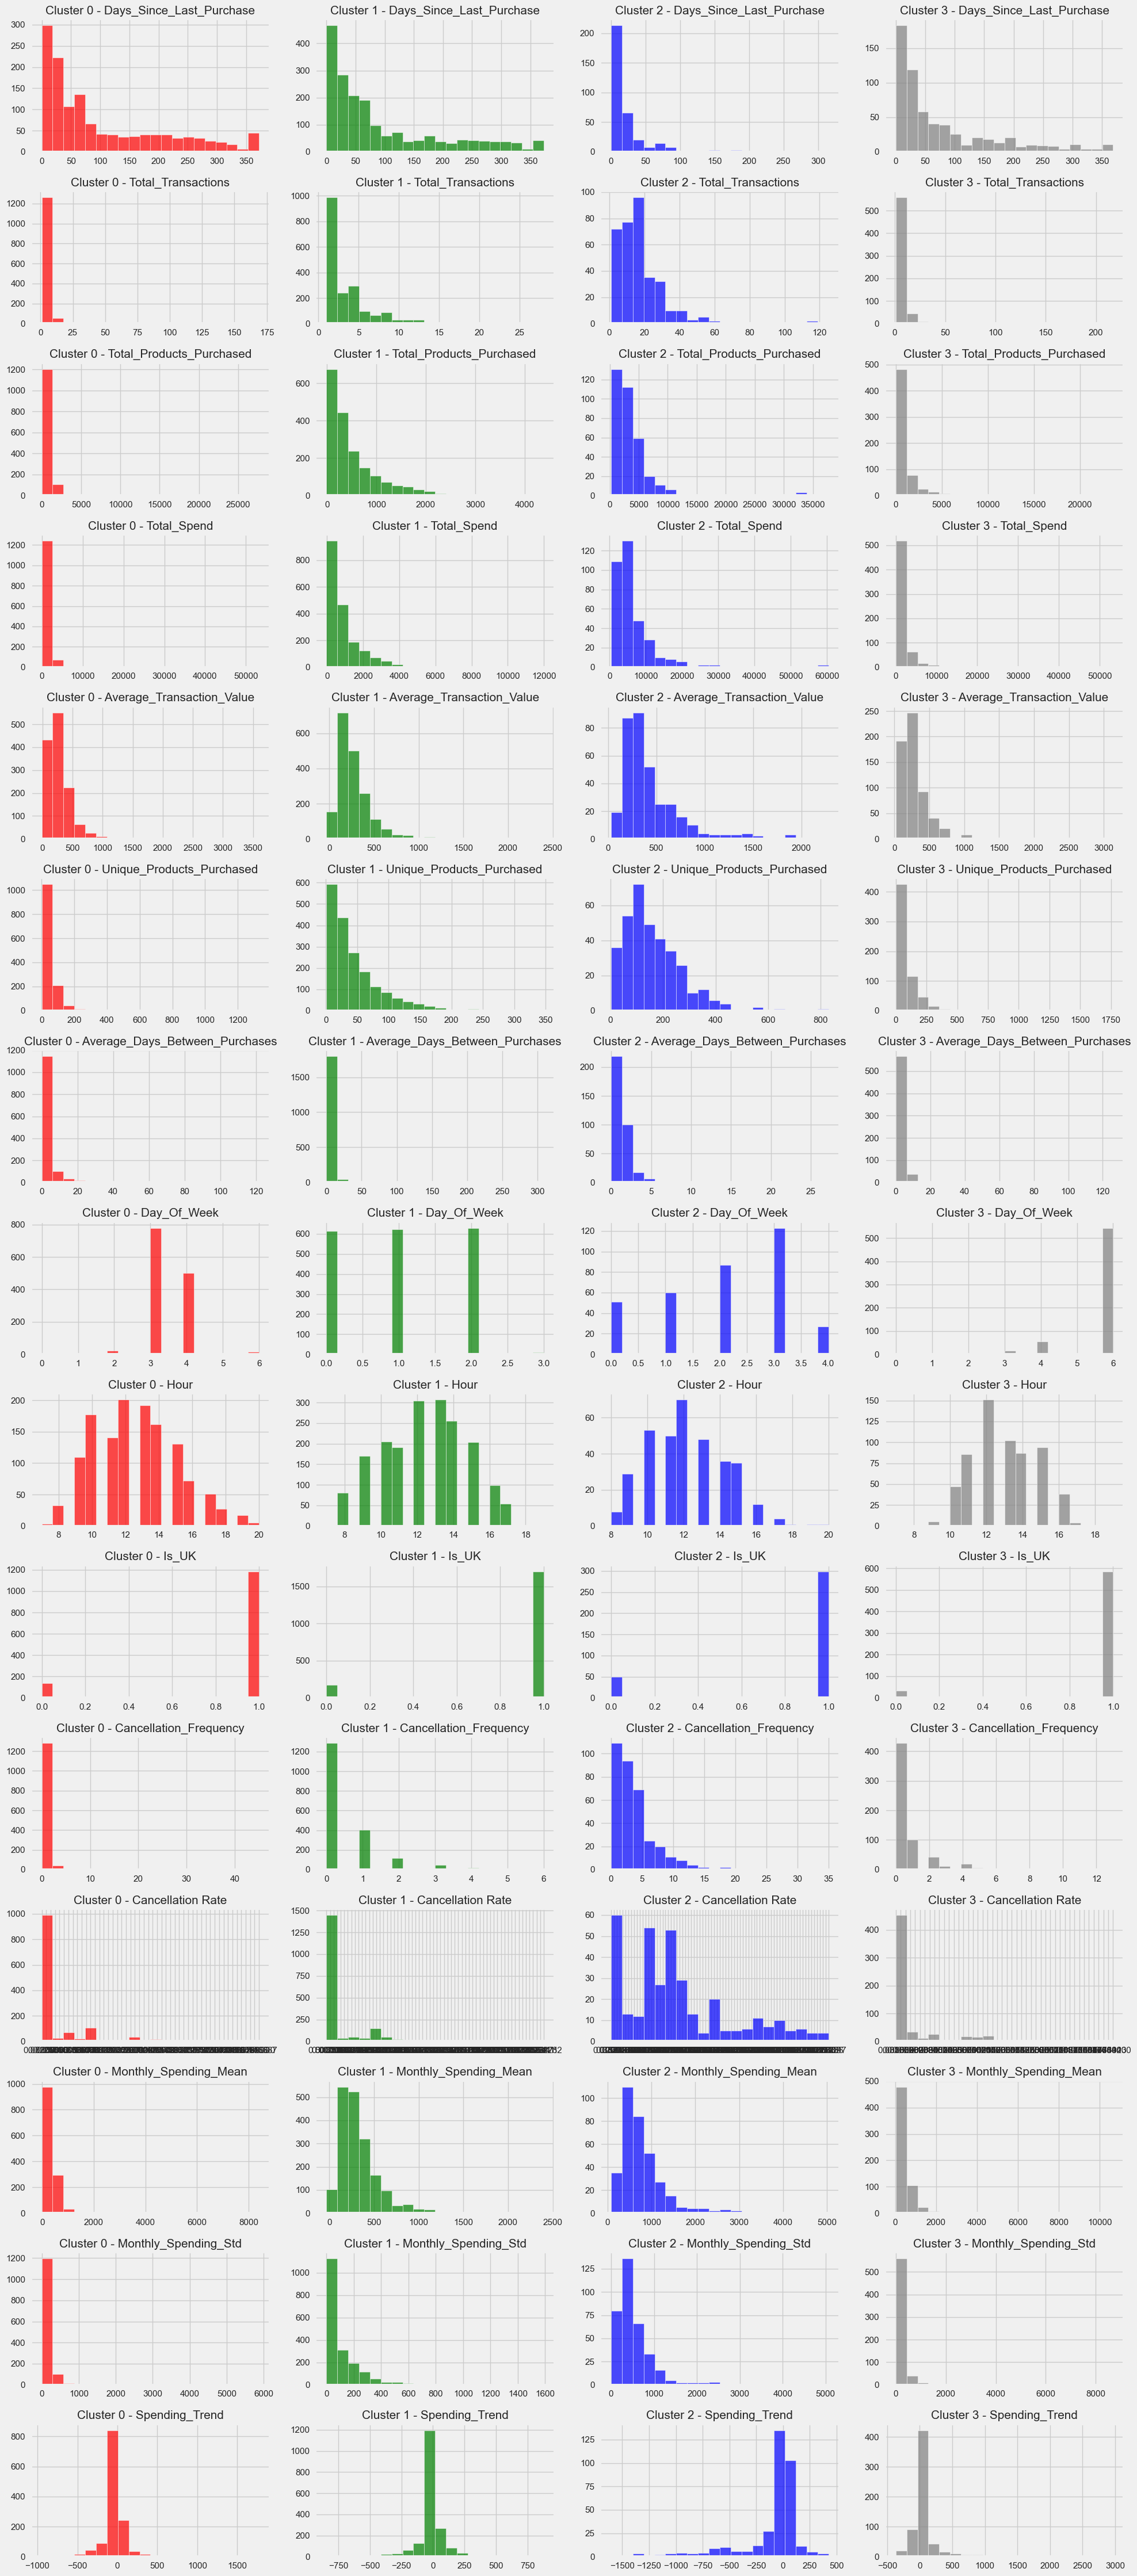

In [252]:
# Define colors for each cluster
colors = ['red', 'green','blue','grey']  # You can define more colors if needed

# Plot histograms for each feature segmented by the clusters
features = customer_data_cleaned.columns[1:-1]
clusters = customer_data_cleaned['cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')


# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()


In [253]:
# Import necessary libraries
import pandas as pd

# Group data by cluster
cluster_groups = customer_data_cleaned.groupby('cluster')

# Define a function to compute descriptive statistics for each cluster
def compute_cluster_statistics(cluster_df):
    # Calculate mean, median, standard deviation, etc. for each feature
    statistics = cluster_df.describe()
    return statistics

# Calculate statistics for each cluster
cluster_statistics = cluster_groups.apply(compute_cluster_statistics)

# Print statistics for each cluster
for cluster_id, statistics in cluster_statistics.items():
    print(f"\nCluster {cluster_id}:")
    print(statistics)



Cluster CustomerID:
cluster       
0        count     1322.000000
         mean     15254.435703
         std       1738.836596
         min      12353.000000
         25%      13762.500000
         50%      15153.000000
         75%      16714.000000
         max      18287.000000
1        count     1876.000000
         mean     15353.191365
         std       1713.529072
         min      12346.000000
         25%      13906.250000
         50%      15373.500000
         75%      16831.000000
         max      18280.000000
2        count      348.000000
         mean     15005.830460
         std       1756.455870
         min      12356.000000
         25%      13402.000000
         50%      14845.500000
         75%      16652.250000
         max      18230.000000
3        count      617.000000
         mean     15334.829822
         std       1620.968555
         min      12394.000000
         25%      13884.000000
         50%      15427.000000
         75%      16726.000000
   

## Customer Clustering Analysis Summary

### Cluster 0:

- **Behavioral Profile:** Customers in this cluster demonstrate moderately recent purchase activity (mean: 102.07 days). They exhibit a moderate transaction frequency and monetary contributions, indicating engaged behavior but with room for potential improvement.
  
- **Purchasing Behavior:** This segment shows a moderate number of total transactions and products purchased, reflecting relatively frequent but not extensive purchasing habits. Moreover, they display moderate spending behavior with both total spend and average transaction value.

- **Variability:** There exists moderate variability in spending patterns within this cluster, suggesting some diversity in customer preferences and purchasing habits.

- **Demographics:** Most customers in this cluster are from the UK (89.64%).

### Cluster 1:

- **Behavioral Profile:** Customers in Cluster 1 have slightly longer recency periods compared to Cluster 0, with an average time since their last purchase of 95.15 days. Nevertheless, they maintain moderate transaction frequency and monetary value, showcasing continued engagement with the business.
  
- **Purchasing Behavior:** Similar to Cluster 0, this segment exhibits moderate purchasing behavior, reflected in a moderate number of total transactions and products purchased. Moreover, they demonstrate moderate spending behavior with both total spend and average transaction value.

- **Variability:** Like Cluster 0, there is moderate variability in spending patterns within this cluster, indicating some diversity in customer preferences and purchasing habits.

- **Demographics:** The majority of customers in this cluster are also from the UK (91.47%).

### Cluster 2:

- **Behavioral Profile:** Customers in Cluster 2 have relatively recent purchase activity compared to Clusters 0 and 1, with an average time since their last purchase of 26.65 days. They exhibit high transaction frequency and substantial monetary contributions, indicating loyal and engaged behavior.
  
- **Purchasing Behavior:** This segment shows a high number of total transactions and products purchased, reflecting frequent and varied purchasing habits. Moreover, they display substantial spending behavior with both a high total spend and average transaction value.

- **Variability:** There is considerable variability in spending patterns within this cluster, suggesting diverse customer preferences and purchasing habits.

- **Demographics:** A significant proportion of customers in this cluster are from the UK (93.97%).

### Cluster 3:

- **Behavioral Profile:** Customers in Cluster 3 demonstrate moderately recent purchase activity (mean: 78.08 days). They exhibit moderate transaction frequency and monetary contributions, indicating engaged behavior but with potential for improvement.
  
- **Purchasing Behavior:** This segment shows a moderate number of total transactions and products purchased, reflecting relatively frequent but not extensive purchasing habits. Moreover, they display moderate spending behavior with both total spend and average transaction value.

- **Variability:** There exists moderate variability in spending patterns within this cluster, suggesting some diversity in customer preferences and purchasing habits.

- **Demographics:** Most customers in this cluster are from the UK (94.81%).

This summary provides insights into the behavior and characteristics of customers within each cluster, aiding in targeted marketing strategies, personalized recommendations, and enhancing customer satisfaction and retention efforts.


<a id="recommendation_system"></a>
# <p style="background-color: #ff6200; font-family:calibri; color:white; font-size:140%; font-family:Verdana; text-align:center; border-radius:15px 50px;">Step 12 | Recommendation System</p>
⬆️ [Tabel of Contents](#contents_tabel)


In the final phase of this project, I am set to develop a recommendation system to enhance the online shopping experience. This system will suggest products to customers based on the purchasing patterns prevalent in their respective clusters. Earlier in the project, during the customer data preparation stage, I isolated a small fraction (5%) of the customers identified as outliers and reserved them in a separate dataset called `outliers_data`.

Now, focusing on the core 95% of the customer group, I analyze the cleansed customer data to pinpoint the top-selling products within each cluster. Leveraging this information, the system will craft personalized recommendations, suggesting __the top three products__ popular within their cluster that they have not yet purchased. This not only facilitates targeted marketing strategies but also enriches the personal shopping experience, potentially boosting sales. For the outlier group, a basic approach could be to recommend random products, as a starting point to engage them.

# Approach

1. **Outlier Identification and Removal**:
   - Outlier CustomerIDs are extracted from the dataset and their transactions are removed from the main dataframe to maintain data integrity.

2. **Data Type Consistency**:
   - Ensure consistent data types for CustomerID across both the main dataframe and the customer data dataframe, facilitating seamless merging.

3. **Merging Data**:
   - Merge the filtered transaction data with the customer data using the 'CustomerID' as the common key, associating each transaction with its corresponding customer cluster.

4. **Identifying Best-Selling Products**:
   - Group the merged data by cluster, StockCode, and Description to aggregate transaction information.
   - Calculate the total quantity sold for each product within each cluster.
   - Sort the products within each cluster based on the total quantity sold, in descending order.
   - Select the top 10 best-selling products within each cluster.

5. **Generating Recommendations**:
   - For each cluster:
     - Retrieve the top 10 best-selling products.
     - For each customer within the cluster:
       - Select the top 3 products from the cluster's best-selling list as recommendations.

6. **Creating Recommendations DataFrame**:
   - Create a DataFrame to store the recommendations, including CustomerID, cluster, and the details of the top 3 recommended products (StockCode and Description).
   - Merge this DataFrame with the original customer data to include cluster information for each customer.

This approach ensures personalized recommendations tailored to the preferences of customers within similar clusters, based on the best-selling products within each cluster.


In [142]:
# Step 1: Extract the CustomerIDs of the outliers and remove their transactions from the main dataframe
outlier_customer_ids = outliers_data['CustomerID'].astype('float').unique()
df_filtered = df[~df['CustomerID'].isin(outlier_customer_ids)]

# Step 2: Ensure consistent data type for CustomerID across both dataframes before merging
customer_data_cleaned['CustomerID'] = customer_data_cleaned['CustomerID'].astype('float')

# Step 3: Merge the transaction data with the customer data to get the cluster information for each transaction
merged_data = df_filtered.merge(customer_data_cleaned[['CustomerID', 'cluster']], on='CustomerID', how='inner')

# Step 4: Identify the top 10 best-selling products in each cluster based on the total quantity sold
best_selling_products = merged_data.groupby(['cluster', 'StockCode', 'Description'])['Quantity'].sum().reset_index()
best_selling_products = best_selling_products.sort_values(by=['cluster', 'Quantity'], ascending=[True, False])
top_products_per_cluster = best_selling_products.groupby('cluster').head(10)

# Step 5: Generate recommendations for each customer based on popular products within their cluster
recommendations = []
for cluster in top_products_per_cluster['cluster'].unique():
    top_products = top_products_per_cluster[top_products_per_cluster['cluster'] == cluster].head(3)  # Get top 3 products
    customers_in_cluster = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster]['CustomerID']

    for customer in customers_in_cluster:
        recommendations.append([customer, cluster] + top_products[['StockCode', 'Description']].values.flatten().tolist())

# Step 6: Create a dataframe from the recommendations list and merge it with the original customer data
recommendations_df = pd.DataFrame(recommendations, columns=['CustomerID', 'cluster',
                                                            'Rec1_StockCode', 'Rec1_Description',
                                                            'Rec2_StockCode', 'Rec2_Description',
                                                            'Rec3_StockCode', 'Rec3_Description'])
customer_data_with_recommendations = customer_data_cleaned.merge(recommendations_df, on=['CustomerID', 'cluster'], how='right')


In [195]:
customer_data_cleaned['CustomerID'] = customer_data_cleaned['CustomerID'].astype('float')

merged_data = df_filtered.merge(customer_data_cleaned[['CustomerID', 'cluster']], on='CustomerID', how='inner')

# Creating the customer-product matrix
grouped_data = merged_df.groupby(['CustomerID', 'StockCode']).agg({'Total_Products_Purchased': 'sum'}).reset_index()



In [196]:
customer_product_matrix = grouped_data.pivot(index='CustomerID', columns='StockCode', values='Total_Products_Purchased').fillna(0)

In [197]:
customer_product_matrix

StockCode   10002  10080  10120  10123C  10124A  10124G  10125  10133  10135  \
CustomerID                                                                     
12346.0         0      0      0       0       0       0      0      0      0   
12347.0         0      0      0       0       0       0      0      0      0   
12349.0         0      0      0       0       0       0      0      0      0   
12350.0         0      0      0       0       0       0      0      0      0   
12352.0         0      0      0       0       0       0      0      0      0   
...           ...    ...    ...     ...     ...     ...    ...    ...    ...   
18280.0         0      0      0       0       0       0      0      0      0   
18281.0         0      0      0       0       0       0      0      0      0   
18282.0         0      0      0       0       0       0      0      0      0   
18283.0         0      0      0       0       0       0      0      0      0   
18287.0         0      0      0       0       0       0      0      0      0   

StockCode   11001  ...  90214O  90214P  90214R  90214S  90214T  90214U  \
CustomerID         ...                                                   
12346.0         0  ...       0       0       0       0       0       0   
12347.0         0  ...       0       0       0       0       0       0   
12349.0         0  ...       0       0       0       0       0       0   
12350.0         0  ...       0       0       0       0       0       0   
12352.0         0  ...       0       0       0       0       0       0   
...           ...  ...     ...     ...     ...     ...     ...     ...   
18280.0         0  ...       0       0       0       0       0       0   
18281.0         0  ...       0       0       0       0       0       0   
18282.0         0  ...       0       0       0       0       0       0   
18283.0         0  ...       0       0       0       0       0       0   
18287.0         0  ...       0       0       0       0       0       0   

StockCode   90214V  90214W  90214Y  90214Z  
CustomerID                                  
12346.0          0       0       0       0  
12347.0          0       0       0       0  
12349.0          0       0       0       0  
12350.0          0       0       0       0  
12352.0          0       0       0       0  
...            ...     ...     ...     ...  
18280.0          0       0       0       0  
18281.0          0       0       0       0  
18282.0          0       0       0       0  
18283.0          0       0       0       0  
18287.0          0       0       0       0  

[4163 rows x 3647 columns]

In [198]:
# Calculate cosine similarity between customers
similarities = cosine_similarity(customer_product_matrix)

print("Cosine Similarity Matrix:")
print(similarities)


Cosine Similarity Matrix:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.04988926 ... 0.10930189 0.10004492 0.00970279]
 [0.         0.04988926 1.         ... 0.06085806 0.06173154 0.02431083]
 ...
 [0.         0.10930189 0.06085806 ... 1.         0.0040984  0.        ]
 [0.         0.10004492 0.06173154 ... 0.0040984  1.         0.05075247]
 [0.         0.00970279 0.02431083 ... 0.         0.05075247 1.        ]]


In [206]:
# Function to generate recommendations for a single customer
def generate_recommendations(target_customer_id, customer_product_matrix, similarities, customer_data_cleaned, merged_df, top_n_recommendations=3):
    # Identify the index of the target customer in the customer-product matrix
    target_customer_index = customer_product_matrix.index.get_loc(target_customer_id)
    
    # Identify similar customers
    similar_customers_indices = similarities[target_customer_index].argsort()[::-1][1:]
    
    # Aggregate preferences of similar customers
    neighbor_preferences = customer_product_matrix.iloc[similar_customers_indices]
    weighted_neighbor_preferences = neighbor_preferences.mul(similarities[target_customer_index, similar_customers_indices], axis=0)
    predicted_preferences = weighted_neighbor_preferences.sum(axis=0) / max(np.sum(similarities[target_customer_index, similar_customers_indices]), 1)  # Avoid division by zero
    
    # Generate recommendations
    top_recommendations = predicted_preferences.nlargest(top_n_recommendations)
    
    # Check if recommendations exist
    if not top_recommendations.empty:
        recommendation_dict = {
            'CustomerID': target_customer_id,
            'Rec1_StockCode': top_recommendations.index[0],
            'Rec1_Description': merged_df.loc[merged_df['StockCode'] == top_recommendations.index[0], 'Description'].values[0] if len(top_recommendations) > 0 else None,
            'Rec2_StockCode': top_recommendations.index[1] if len(top_recommendations) > 1 else None,
            'Rec2_Description': merged_df.loc[merged_df['StockCode'] == top_recommendations.index[1], 'Description'].values[0] if len(top_recommendations) > 1 else None,
            'Rec3_StockCode': top_recommendations.index[2] if len(top_recommendations) > 2 else None,
            'Rec3_Description': merged_df.loc[merged_df['StockCode'] == top_recommendations.index[2], 'Description'].values[0] if len(top_recommendations) > 2 else None
        }
        return recommendation_dict
    
    # If no recommendations, fill all slots with cluster-based recommendations
    else:
        return generate_cluster_based_recommendations(target_customer_id, customer_data_cleaned, merged_df)

# Function to generate cluster-based recommendations
def generate_cluster_based_recommendations(target_customer_id, customer_data_cleaned, merged_df, top_n_recommendations=3):
    target_customer_cluster = customer_data_cleaned.loc[customer_data_cleaned['CustomerID'] == target_customer_id, 'cluster'].values[0]
    cluster_customers = customer_data_cleaned[customer_data_cleaned['cluster'] == target_customer_cluster]['CustomerID'].unique()
    cluster_products = merged_df[merged_df['CustomerID'].isin(cluster_customers)][['StockCode', 'Description', 'Days_Since_Last_Purchase', 'Day_Of_Week_y', 'Hour_y']]
    recommended_products = cluster_products[(cluster_products['Days_Since_Last_Purchase'] < 7) &
                                             (cluster_products['Day_Of_Week_y'] == cluster_products['Day_Of_Week_y'].mode()[0]) &
                                             (cluster_products['Hour_y'] == cluster_products['Hour_y'].mode()[0])]['StockCode'].value_counts().index.tolist()[:top_n_recommendations]
    
    recommendation_dict = {
        'CustomerID': target_customer_id,
        'Rec1_StockCode': recommended_products[0] if len(recommended_products) > 0 else None,
        'Rec1_Description': merged_df.loc[merged_df['StockCode'] == recommended_products[0], 'Description'].values[0] if len(recommended_products) > 0 else None,
        'Rec2_StockCode': recommended_products[1] if len(recommended_products) > 1 else None,
        'Rec2_Description': merged_df.loc[merged_df['StockCode'] == recommended_products[1], 'Description'].values[0] if len(recommended_products) > 1 else None,
        'Rec3_StockCode': recommended_products[2] if len(recommended_products) > 2 else None,
        'Rec3_Description': merged_df.loc[merged_df['StockCode'] == recommended_products[2], 'Description'].values[0] if len(recommended_products) > 2 else None
    }
    return recommendation_dict

# List to store recommendation data for each customer
recommendation_data_list = []

# Iterate over each customer with tqdm progress bar
for target_customer_id in tqdm(customer_product_matrix.index):
    recommendation_data = generate_recommendations(target_customer_id, customer_product_matrix, similarities, customer_data_cleaned, merged_df)
    if recommendation_data:
        recommendation_data_list.append(recommendation_data)



100%|███████████████████████████████████████| 4163/4163 [34:20<00:00,  2.02it/s]


AttributeError: module 'pandas' has no attribute 'DataFramepd'

# Visualization Of Diffeent Customers Recommendation

In [207]:
# Convert the list of recommendation data into a DataFrame
recommendation_df = pd.DataFrame(recommendation_data_list)
recommendation_df 

CustomerID Rec1_StockCode             Rec1_Description Rec2_StockCode  \
0        12346.0          10002  INFLATABLE POLITICAL GLOBE           10080   
1        12347.0          22423     REGENCY CAKESTAND 3 TIER         85099B   
2        12349.0          22423     REGENCY CAKESTAND 3 TIER         85099B   
3        12350.0          20725      LUNCH BAG RED RETROSPOT          22197   
4        12352.0          22423     REGENCY CAKESTAND 3 TIER         85099B   
...          ...            ...                          ...            ...   
4158     18280.0          22467            GUMBALL COAT RACK          22726   
4159     18281.0          20725      LUNCH BAG RED RETROSPOT          23209   
4160     18282.0          22423     REGENCY CAKESTAND 3 TIER          22699   
4161     18283.0         85099B      JUMBO BAG RED RETROSPOT          20725   
4162     18287.0          79321                CHILLI LIGHTS         85099B   

                      Rec2_Description Rec3_StockCode  \
0             GROOVY CACTUS INFLATABLE          10120   
1              JUMBO BAG RED RETROSPOT          20725   
2              JUMBO BAG RED RETROSPOT          20725   
3                       POPCORN HOLDER         85099B   
4              JUMBO BAG RED RETROSPOT          20725   
...                                ...            ...   
4158        ALARM CLOCK BAKELIKE GREEN          22727   
4159          LUNCH BAG VINTAGE DOILY           22423   
4160  ROSES REGENCY TEACUP AND SAUCER           22697   
4161           LUNCH BAG RED RETROSPOT          20727   
4162           JUMBO BAG RED RETROSPOT          20725   

                     Rec3_Description  
0                        DOGGY RUBBER  
1             LUNCH BAG RED RETROSPOT  
2             LUNCH BAG RED RETROSPOT  
3             JUMBO BAG RED RETROSPOT  
4             LUNCH BAG RED RETROSPOT  
...                               ...  
4158        ALARM CLOCK BAKELIKE RED   
4159         REGENCY CAKESTAND 3 TIER  
4160  GREEN REGENCY TEACUP AND SAUCER  
4161          LUNCH BAG  BLACK SKULL.  
4162          LUNCH BAG RED RETROSPOT  

[4163 rows x 7 columns]

In [208]:
product_counts = recommendation_df[['Rec1_Description', 'Rec2_Description', 'Rec3_Description']].stack().value_counts()

# Display the counts for all products
print(product_counts)


JUMBO BAG RED RETROSPOT               3383
LUNCH BAG RED RETROSPOT               3185
REGENCY CAKESTAND 3 TIER              1588
WHITE HANGING HEART T-LIGHT HOLDER    1462
LUNCH BAG  BLACK SKULL.                716
                                      ... 
WRAP  PINK FLOCK                         1
REVOLVER WOODEN RULER                    1
WOOD BLACK BOARD ANT WHITE FINISH        1
PAPER CHAIN KIT VINTAGE CHRISTMAS        1
HOME BUILDING BLOCK WORD                 1
Name: count, Length: 132, dtype: int64


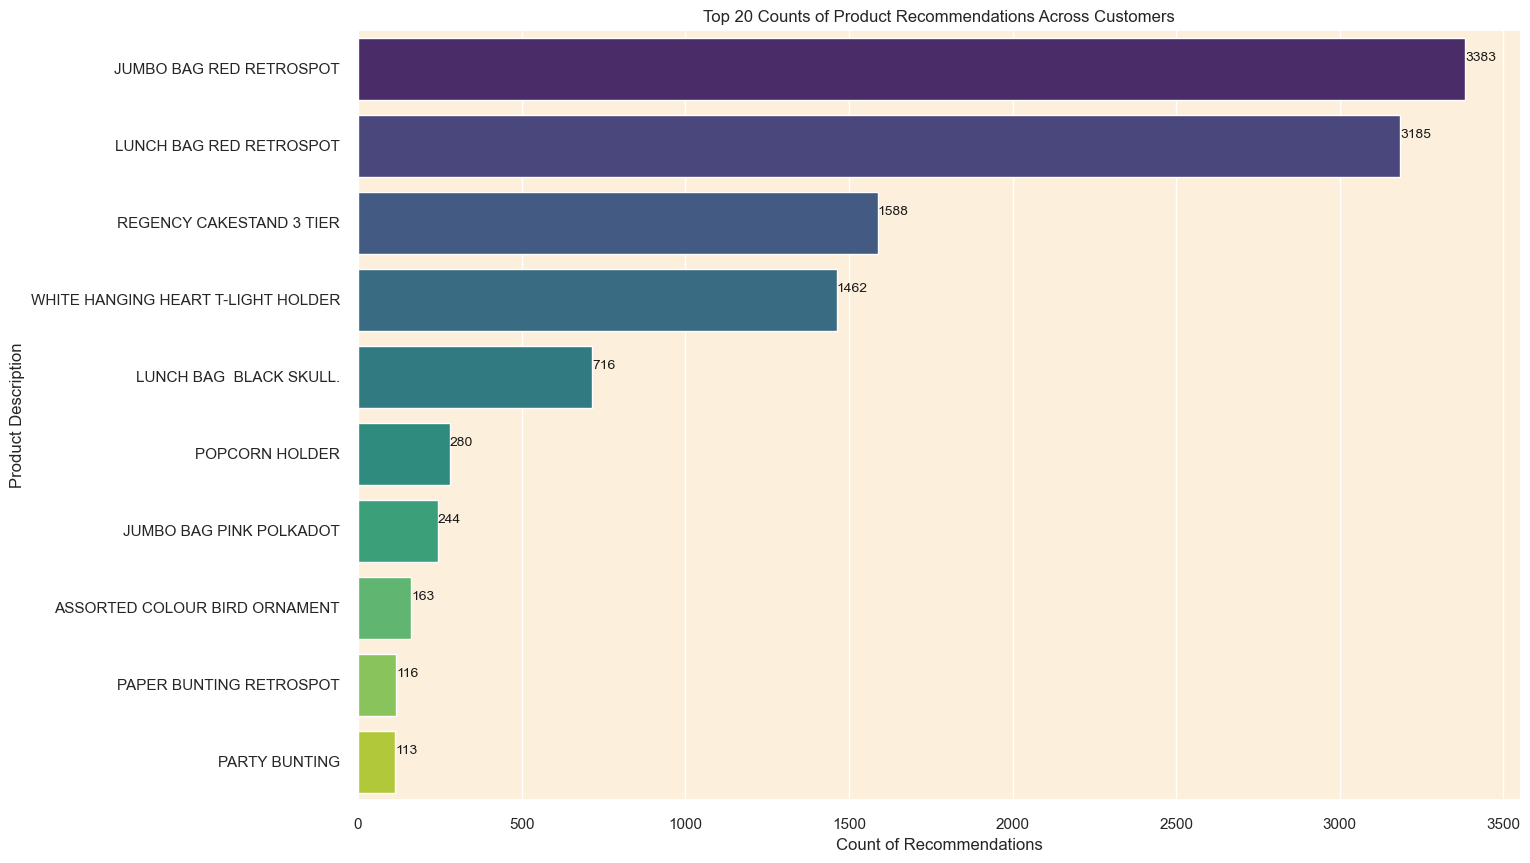

In [234]:
top20_product_counts = product_counts.head(10) 

plt.figure(figsize=(15, 10)) 
ax = sns.barplot(x=top20_product_counts.values, y=top20_product_counts.index, palette='viridis')  
ax.set_title("Top 20 Counts of Product Recommendations Across Customers")
ax.set_ylabel("Product Description")
ax.set_xlabel("Count of Recommendations")

# Add annotations
for i in ax.patches:
    ax.text(i.get_width() + 0.3, i.get_y() + 0.3, str(round(i.get_width())), fontsize=10, color='k')

plt.show()


## Visualization of Trends Across Different Clusters

In [198]:
customer_data_cleaned

CustomerID  Days_Since_Last_Purchase  Total_Transactions  \
0       12346.0                       325                   2   
1       12347.0                         2                   7   
2       12349.0                        18                   1   
3       12350.0                       310                   1   
4       12352.0                        36                   8   
...         ...                       ...                 ...   
4158    18280.0                       277                   1   
4159    18281.0                       180                   1   
4160    18282.0                         7                   3   
4161    18283.0                         3                  16   
4162    18287.0                        42                   3   

      Total_Products_Purchased  Total_Spend  Average_Transaction_Value  \
0                            0          0.0                        0.0   
1                         2458       4310.0                 615.714286   
2                          630      1457.55                    1457.55   
3                          196        294.4                      294.4   
4                          463      1265.41                  158.17625   
...                        ...          ...                        ...   
4158                        45        180.6                      180.6   
4159                        54        80.82                      80.82   
4160                        98        176.6                  58.866667   
4161                      1355      2039.58                  127.47375   
4162                      1586      1837.28                 612.426667   

      Unique_Products_Purchased  Average_Days_Between_Purchases  Day_Of_Week  \
0                             1                             0.0            1   
1                           103                        2.016575            1   
2                            72                             0.0            0   
3                            16                             0.0            2   
4                            57                         3.13253            1   
...                         ...                             ...          ...   
4158                         10                             0.0            0   
4159                          7                             0.0            6   
4160                         12                        9.916667            4   
4161                        262                        0.465181            3   
4162                         59                        2.304348            2   

      Hour  Is_UK  Cancellation_Frequency Cancellation Rate  \
0       10      1                       1          0.500000   
1       14      0                       0          0.000000   
2        9      0                       0          0.000000   
3       16      0                       0          0.000000   
4       14      0                       1          0.125000   
...    ...    ...                     ...               ...   
4158     9      1                       0          0.000000   
4159    10      1                       0          0.000000   
4160    13      1                       1          0.142857   
4161    14      1                       0          0.000000   
4162    10      1                       0          0.000000   

      Monthly_Spending_Mean  Monthly_Spending_Std  Spending_Trend  cluster  
0                       0.0                   0.0             0.0        2  
1                615.714286            341.070789      613.042227        0  
2                   1457.55                   0.0             0.0        0  
3                     294.4                   0.0             0.0        2  
4                  316.3525            134.700629        332.9014        0  
...                     ...                   ...             ...      ...  
4158                  180.6                   0.0             0.0        0  
4

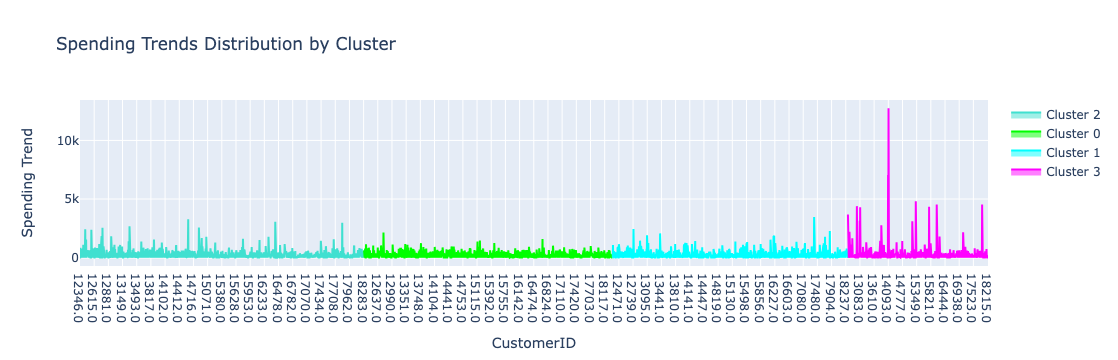

In [211]:
import plotly.graph_objs as go

# Define a color palette
color_palette = ['turquoise', 'lime', 'cyan', 'magenta']



# Create traces for each cluster
traces = []
for i, cluster in enumerate(customer_data_cleaned['cluster'].unique()):
    cluster_data = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster]
    trace = go.Scatter(
        x=cluster_data['CustomerID'],  
        y=cluster_data['Spending_Trend'],
        mode='lines',
        fill='tozeroy',  
        name=f'Cluster {cluster}',
        line=dict(color=color_palette[i % len(color_palette)]) 
    )
    traces.append(trace)

# Create layout
layout = go.Layout(
    title='Spending Trends Distribution by Cluster',
    xaxis=dict(title='CustomerID'),
    yaxis=dict(title='Spending Trend')
)

# Create figure
fig = go.Figure(data=traces, layout=layout)

# Show the plot
fig.show()


In [214]:
# Filter the DataFrame to include only the required columns
filtered_data = customer_data_cleaned[['cluster', 'CustomerID', 'Spending_Trend']]

# Print the filtered DataFrame
print(filtered_data)


      cluster CustomerID  Spending_Trend
0           2    12346.0             0.0
1           0    12347.0      613.042227
2           0    12349.0             0.0
3           2    12350.0             0.0
4           0    12352.0        332.9014
...       ...        ...             ...
4158        0    18280.0             0.0
4159        3    18281.0             0.0
4160        1    18282.0       58.866667
4161        2    18283.0      181.894612
4162        2    18287.0      612.426667

[4163 rows x 3 columns]


In [215]:
filtered_data.sample(60)

cluster CustomerID  Spending_Trend
3147        1    16795.0             0.0
4005        1    18055.0       887.11458
3847        1    17820.0       -8.016667
3811        1    17764.0      257.516667
1154        2    13976.0             0.0
2862        2    16393.0      282.055529
3427        0    17206.0             0.0
706         1    13330.0          380.31
3438        0    17223.0      127.296667
2710        2    16177.0             0.0
1458        1    14416.0      163.406667
3168        0    16824.0      153.546667
2931        1    16485.0             0.0
3515        2    17345.0          173.23
86          2    12457.0      428.244667
3406        3    17173.0      837.385844
2966        2    16539.0      462.936667
1980        0    15146.0      437.886667
1532        0    14515.0      494.255233
2439        0    15783.0             0.0
772         2    13430.0      217.356667
2067        2    15261.0             0.0
1460        0    14419.0        199.5727
2965        3    16536.0             0.0
1902        2    15046.0      528.376338
133         1    12520.0      510.830333
1178        2    14009.0             0.0
1936        2    15092.0      152.603333
2262        2    15537.0             0.0
35          1    12394.0          360.16
662         3    13269.0      480.678333
1472        1    14437.0             0.0
3805        2    17754.0      361.953522
3125        3    16768.0          152.68
1753        3    14828.0      713.253333
3640        0    17524.0             0.0
1502        0    14480.0             0.0
1820        1    14923.0             0.0
1293        3    14174.0             0.0
2594        2    16011.0      290.961933
367         0    12836.0        647.1962
2597        1    16015.0      229.803333
3581        2    17434.0      642.148333
2130        1    15350.0             0.0
2952        0    16517.0             0.0
1725        1    14789.0             0.0
4132        0    18240.0             0.0
1806        0    14902.0             0.0
301         0    12728.0        173.2092
1691        1    14740.0      396.270833
180         1    12582.0          117.12
546         2    13101.0             0.0
2608        1    16027.0      158.034867
2215        2    15469.0      168.166667
212         1    12619.0      476.342117
3053        3    16667.0          189.06
77          2    12448.0             0.0
757         1    13408.0     2066.422173
2894        3    16434.0        209.8363
3299        1    17017.0      642.585993